# FORECAST SALE MODEL


## All Functions defined for this Project

In [39]:
#Module with all functions needed
from functions import *

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Constant Section

In [41]:
#File names

#Data set to train
my_train_file = "./data_v1.xlsx"

#Data set to validate
my_validate_file = "./data_validate_v1.xlsx"

#Pickle file name
pickle_file = 'object.pkl'

In [42]:
#Set all Visualization Parameters

#Parameters
visual_parameters = dict(
    {'figure.figsize': [20, 10], #Size of the plot
     'font.size': 15, #Font size
     'xtick.labelsize': 15, #Font size in X
     'ytick.labelsize': 15, #Font size in Y
     'xtick.direction': 'inout',
     'ytick.direction': 'inout',
})

#Apply all parameters
for parameter in visual_parameters:
    plt.rcParams[parameter] = visual_parameters[parameter]

#Apply Theme style
style = 'seaborn-darkgrid' #Theme style
plt.style.use(style)

In [43]:
#A list all Continuous Distributions available in Scipy

stats = [
    'alpha', 'anglit', 'arcsine', 'argus', 'beta',
    'betaprime', 'bradford', 'burr', 'burr12', 'cauchy',
    'chi', 'chi2', 'cosine', 'crystalball', 'dgamma',
    'dweibull', 'erlang', 'expon', 'exponnorm', 'exponweib',
    'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy',
    'foldnorm', 'genlogistic', 'gennorm', 'genpareto',
    'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 
    'genhalflogistic', 'geninvgauss', 'gilbrat', 'gompertz', 'gumbel_r',
    'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm',
    'halfgennorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull',
    'johnsonsb', 'johnsonsu', 'kappa4', 'kappa3', 'ksone',
    'kstwo', 'kstwobign', 'laplace', 'laplace_asymmetric', 'levy',
    'levy_l', 'levy_stable', 'logistic', 'loggamma', 'loglaplace',
    'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke',
    'moyal', 'nakagami', 'ncx2', 'ncf', 'nct',
    'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw',
    'powerlognorm', 'powernorm', 'rdist', 'rayleigh', 'rice',
    'recipinvgauss', 'semicircular', 'kewnorm', 't', 'trapezoid',
    'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform',
    'vonmises', 'vonmises_line', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'
]

In [44]:
#Pandas Parameters

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Exploratory Data Analysis

Let's analyze what is the size of our observations and columns. Is there any Nan or check the type of the data. This should be the starting point of any Data Science Project.

In [45]:
#Load the main data
data = pd.read_excel(my_train_file)
data

Date          Program  Visits  Revenue  Unnamed: 4  \
0      2015-01-01 23:59:59              SEO       0  2317.14         NaN   
1      2015-01-01 23:59:59              SEO       0   903.10         NaN   
2      2015-01-01 23:59:59              SEO    2844     0.00         NaN   
3      2015-01-01 23:59:59           Direct       0    24.31         NaN   
4      2015-01-01 23:59:59           Direct     937     0.00         NaN   
...                    ...              ...     ...      ...         ...   
106691 2021-05-09 23:59:59  ::unspecified::      21     0.00         NaN   
106692 2021-05-09 23:59:59      Paid Social    1050     0.00         NaN   
106693 2021-05-09 23:59:59   Organic Social      19     0.00         NaN   
106694 2021-05-09 23:59:59            Other       4     0.00         NaN   
106695 2021-05-09 23:59:59           Social       0     0.00         NaN   

        Unnamed: 5  Unnamed: 6  Unnamed: 7  
0              NaN         NaN         NaN  
1              NaN         NaN         NaN  
2              NaN         NaN         NaN  
3              NaN         NaN         NaN  
4              NaN         NaN         NaN  
...            ...         ...         ...  
106691         NaN         NaN         NaN  
106692         NaN         NaN         NaN  
106693         NaN         NaN         NaN  
106694         NaN         NaN         NaN  
106695         NaN         NaN         NaN  

[106696 rows x 8 columns]

In [46]:
#Dimension of the Dataset
data.shape
#More than 106K records and 4 columns

(106696, 8)

In [47]:
#Let's check if there is any NaN
data.isna().sum()

Date               0
Program            0
Visits             0
Revenue            0
Unnamed: 4    106696
Unnamed: 5    106696
Unnamed: 6    106696
Unnamed: 7    106696
dtype: int64

In [48]:
data.dtypes

Date          datetime64[ns]
Program               object
Visits                 int64
Revenue              float64
Unnamed: 4           float64
Unnamed: 5           float64
Unnamed: 6           float64
Unnamed: 7           float64
dtype: object

In [49]:
#Let's check if there is a zero value in Revenue
check = data.groupby(['Date'])['Revenue'].sum().reset_index()
check_zeros = check[check['Revenue'] == 0]
check_zeros

Date  Revenue
66   2015-03-08 23:59:59      0.0
163  2015-06-13 23:59:59      0.0
387  2016-01-23 23:59:59      0.0
450  2016-03-26 23:59:59      0.0
924  2017-07-13 23:59:59      0.0
1930 2020-04-14 23:59:59      0.0

In [50]:
#There are some and we are going to estimate the Revenue, we are going to use the 
#Mean between Revenue day before and day after and we are going to apply that one to Direct Traffic
data = fill_zero_revenue(data)

In [51]:
#No Zero in Revenue
check = data.groupby(['Date'])['Revenue'].sum().reset_index()
check_zeros = check[check['Revenue'] == 0]
check_zeros

Empty DataFrame
Columns: [Date, Revenue]
Index: []

In [52]:
#Validate Set
data_validate = pd.read_excel(my_validate_file)
data_validate

Date          Program  Visits  Revenue
0    2021-05-10 23:59:59           Direct       1  4212.66
1    2021-05-10 23:59:59           Direct       1  3488.05
2    2021-05-10 23:59:59           Direct       1  2926.59
3    2021-05-10 23:59:59           Direct       1  2584.90
4    2021-05-10 23:59:59           Direct       1  1374.33
...                  ...              ...     ...      ...
2740 2021-06-13 23:59:59      Paid Social    1247     0.00
2741 2021-06-13 23:59:59   Organic Social      17     0.00
2742 2021-06-13 23:59:59  ::unspecified::       5     0.00
2743 2021-06-13 23:59:59            Other       0     0.00
2744 2021-06-13 23:59:59           Social       0     0.00

[2745 rows x 4 columns]

## Distribution and briefly Statistical Analysis

It is important analyze the Revenue behave. We are going to exclude the Program Variable and just keep Year, Month, Day, Visits and Revenue.

In [53]:
data

Date          Program  Visits  Revenue  Unnamed: 4  \
0      2015-01-01 23:59:59              SEO       0  2317.14         NaN   
1      2015-01-01 23:59:59              SEO       0   903.10         NaN   
2      2015-01-01 23:59:59              SEO    2844     0.00         NaN   
3      2015-01-01 23:59:59           Direct       0    24.31         NaN   
4      2015-01-01 23:59:59           Direct     937     0.00         NaN   
...                    ...              ...     ...      ...         ...   
106691 2021-05-09 23:59:59  ::unspecified::      21     0.00         NaN   
106692 2021-05-09 23:59:59      Paid Social    1050     0.00         NaN   
106693 2021-05-09 23:59:59   Organic Social      19     0.00         NaN   
106694 2021-05-09 23:59:59            Other       4     0.00         NaN   
106695 2021-05-09 23:59:59           Social       0     0.00         NaN   

        Unnamed: 5  Unnamed: 6  Unnamed: 7  
0              NaN         NaN         NaN  
1              NaN         NaN         NaN  
2              NaN         NaN         NaN  
3              NaN         NaN         NaN  
4              NaN         NaN         NaN  
...            ...         ...         ...  
106691         NaN         NaN         NaN  
106692         NaN         NaN         NaN  
106693         NaN         NaN         NaN  
106694         NaN         NaN         NaN  
106695         NaN         NaN         NaN  

[106696 rows x 8 columns]

In [54]:
#Manipulate the DataFrame a little bit. Modifying the Dates
data_small = split_dates_by_columns(data, 'Date')
#For this early stage I discard type of Traffic and just sum all of them and group by Index, Year, Month and Day
data_small = data_small.groupby(['Date', 'Year','Month','Day'])[['Visits','Revenue']].sum()
#Reset Index after having made a groupby
data_small = data_small.reset_index(['Year', 'Month', 'Day'])
#Resample to D and 00h00min00sec
data_small = data_small.resample('D', offset='00h00min00sec').sum()
data_small.tail(5)

Year  Month  Day  Visits   Revenue
Date                                          
2021-05-05  2021      5    5   14373  37283.53
2021-05-06  2021      5    6   14025  39991.11
2021-05-07  2021      5    7   12399  24901.84
2021-05-08  2021      5    8   11018  15744.14
2021-05-09  2021      5    9   13924  19703.32

In [55]:
#Do the same for the Validation set
data_validation = split_dates_by_columns(data_validate, 'Date')
#For this early stage I discard type of Traffic and just sum all of them and group by Index, Year, Month and Day
data_validation = data_validation.groupby(['Date', 'Year','Month','Day'])[['Visits','Revenue']].sum()
#Reset Index after having made a groupby
data_validation = data_validation.reset_index(['Year', 'Month', 'Day'])
#Resample to D and 00h00min00sec
data_validation = data_validation.resample('D', offset='00h00min00sec').sum()
data_validation.head(5)

Year  Month  Day  Visits    Revenue
Date                                           
2021-05-10  2021      5   10   14985   38859.97
2021-05-11  2021      5   11   15054   62814.95
2021-05-12  2021      5   12   15321   34882.23
2021-05-13  2021      5   13   14933   47518.14
2021-05-14  2021      5   14   15955  100651.00

In [56]:
#Lets check it out how this looks like and we can see that we have 2293 rows of data. Original one was 104793 rows
data_small.shape

(2321, 5)

In [19]:
#Let's see the main descriptive statistics
data_small.describe()

Year        Month          Day         Visits        Revenue
count  2321.000000  2321.000000  2321.000000    2321.000000    2321.000000
mean   2017.694959     6.308057    15.680310   13433.658337   25825.089417
std       1.843913     3.479171     8.807686    8616.702674   38526.622896
min    2015.000000     1.000000     1.000000     245.000000      46.420000
25%    2016.000000     3.000000     8.000000    7858.000000    9739.620000
50%    2018.000000     6.000000    16.000000   10223.000000   18558.480000
75%    2019.000000     9.000000    23.000000   16581.000000   32819.390000
max    2021.000000    12.000000    31.000000  109148.000000  858333.560000

What we can see here, Revenue is much more scattered than Visits

In [23]:
#Outliners Analysis
#Let's check those results which are more than 3 times further standard deviation
outliers= []
threshold= 3

Revenue_mean = np.mean(data_small['Revenue'])
Revenue_std =np.std(data_small['Revenue'])

for i in data_small['Revenue']:
    z= (i - Revenue_mean)/Revenue_std 
    if np.abs(z) > threshold:
        outliers.append(i)

print(f'Number of outliners in Revenue are {len(outliers)}')
sorted(outliers, reverse=True)

Number of outliners in Revenue are 17


[858333.5600000034,
 784321.290000003,
 590327.1899999998,
 563812.3999999989,
 529061.6699999995,
 334605.57000000076,
 311593.59999999957,
 304644.9999999996,
 206742.70999999996,
 192917.33000000007,
 191231.44000000012,
 187432.28999999983,
 186791.86000000004,
 171407.57999999987,
 169560.74000000005,
 167811.78999999986,
 153453.7500000001]

In [21]:
#High Variability in Revenue
pearson_revenue = data_small['Revenue'].std() / data_small['Revenue'].mean()
#Visit Variability is less than Revenue but it is above 0.5
pearson_traffic = data_small['Visits'].std() / data_small['Visits'].mean()
print(f'Pearson\'s coefficient of variation - Revenue: {pearson_revenue:.2%}')
print(f'Pearson\'s coefficient of variation - Visits: {pearson_traffic:.2%}')

Pearson's coefficient of variation - Revenue: 149.18%
Pearson's coefficient of variation - Visits: 64.14%


We can see how the Revenue evolution across time. There are some big outliners due to the BlackFriday and Cyber Monday. Those exceptional days could affect in our model but we cannot remove them. However, maybe we can create a specific model for those ones and remove them for this model. Let's see

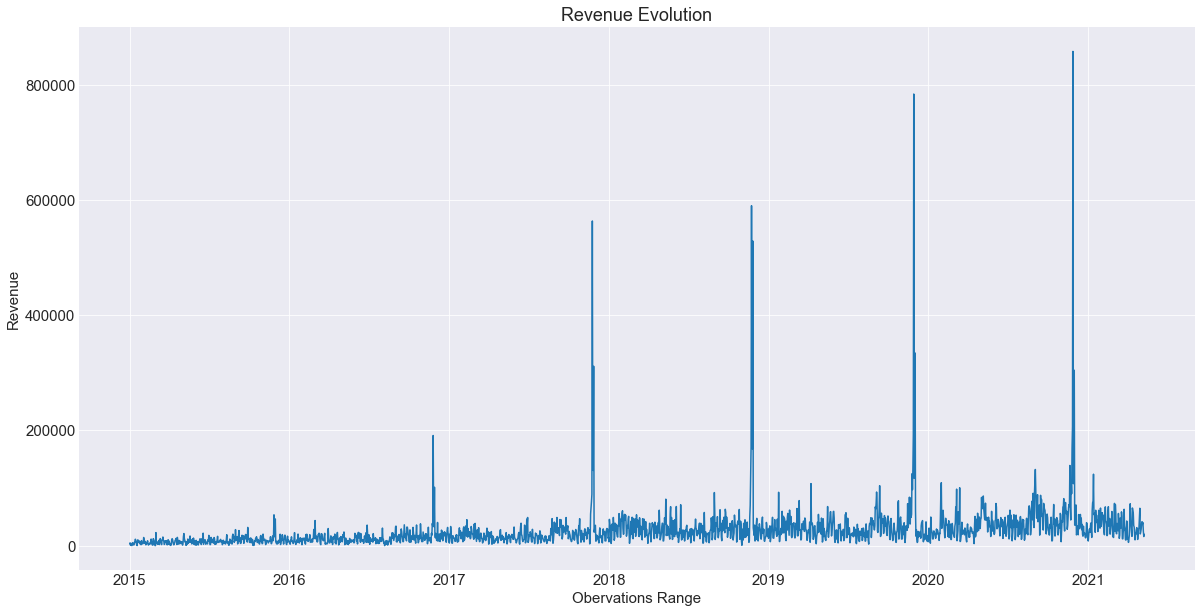

In [23]:
draw_plot(data_small, 'Revenue')

Let's see the behaviour of the Revenue and Visits and how good or bad they adjust with one polynomial.

Revenue: This daily granularity does not help to find a simple polynomial to adjust
Visits: Shows almost same issues as Revenue if we take data at daily basis

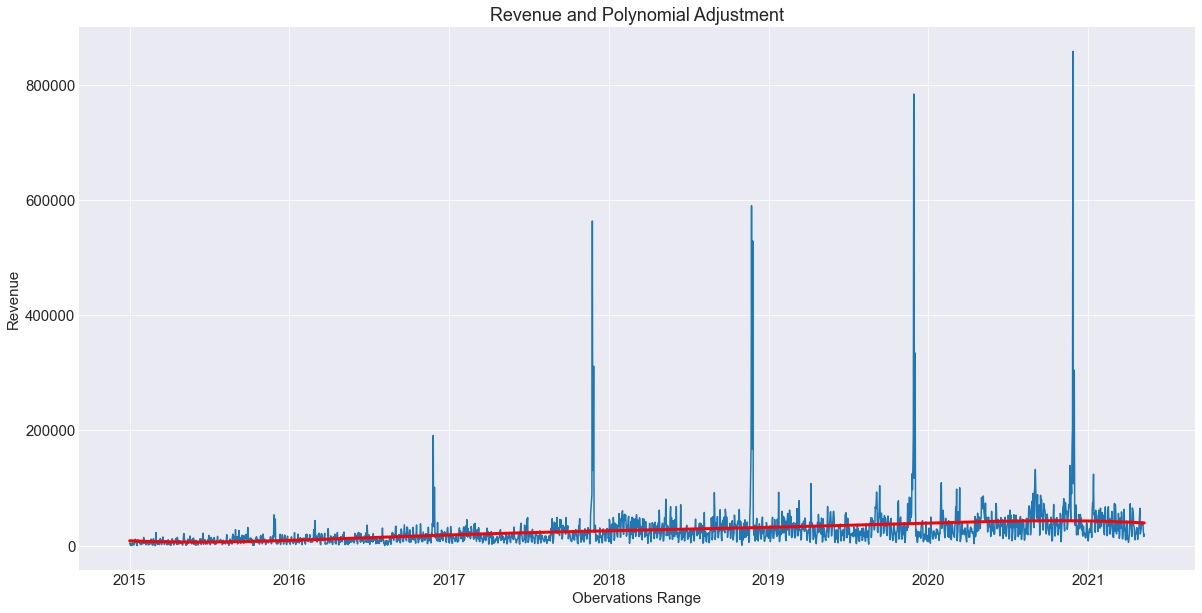

In [24]:
draw_least_squares_polynomial(data_small, data_small.columns[-1], 5)

Besides the target variable which is Revenue, Visits is another important variable which affects importantly the Revenue metric. Let's see how this looks like

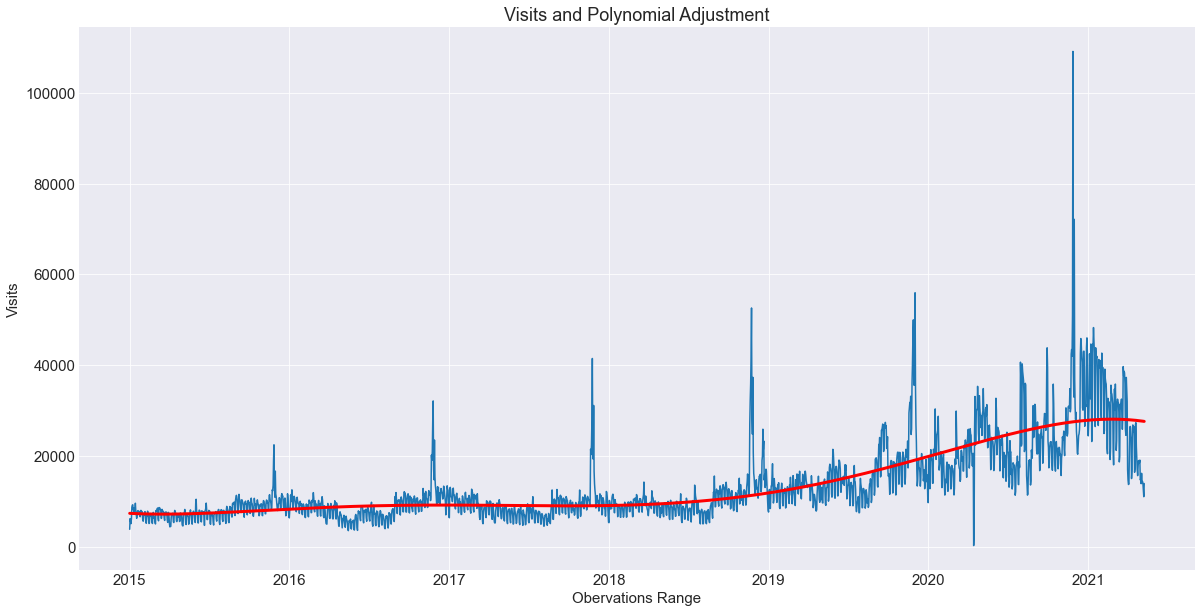

In [25]:
draw_least_squares_polynomial(data_small, data_small.columns[-2], 5)

We can see three different Distribution of our target variable, Revenue:
* Regular Distribution
* Logarithmic Distribution
* Square Transformation

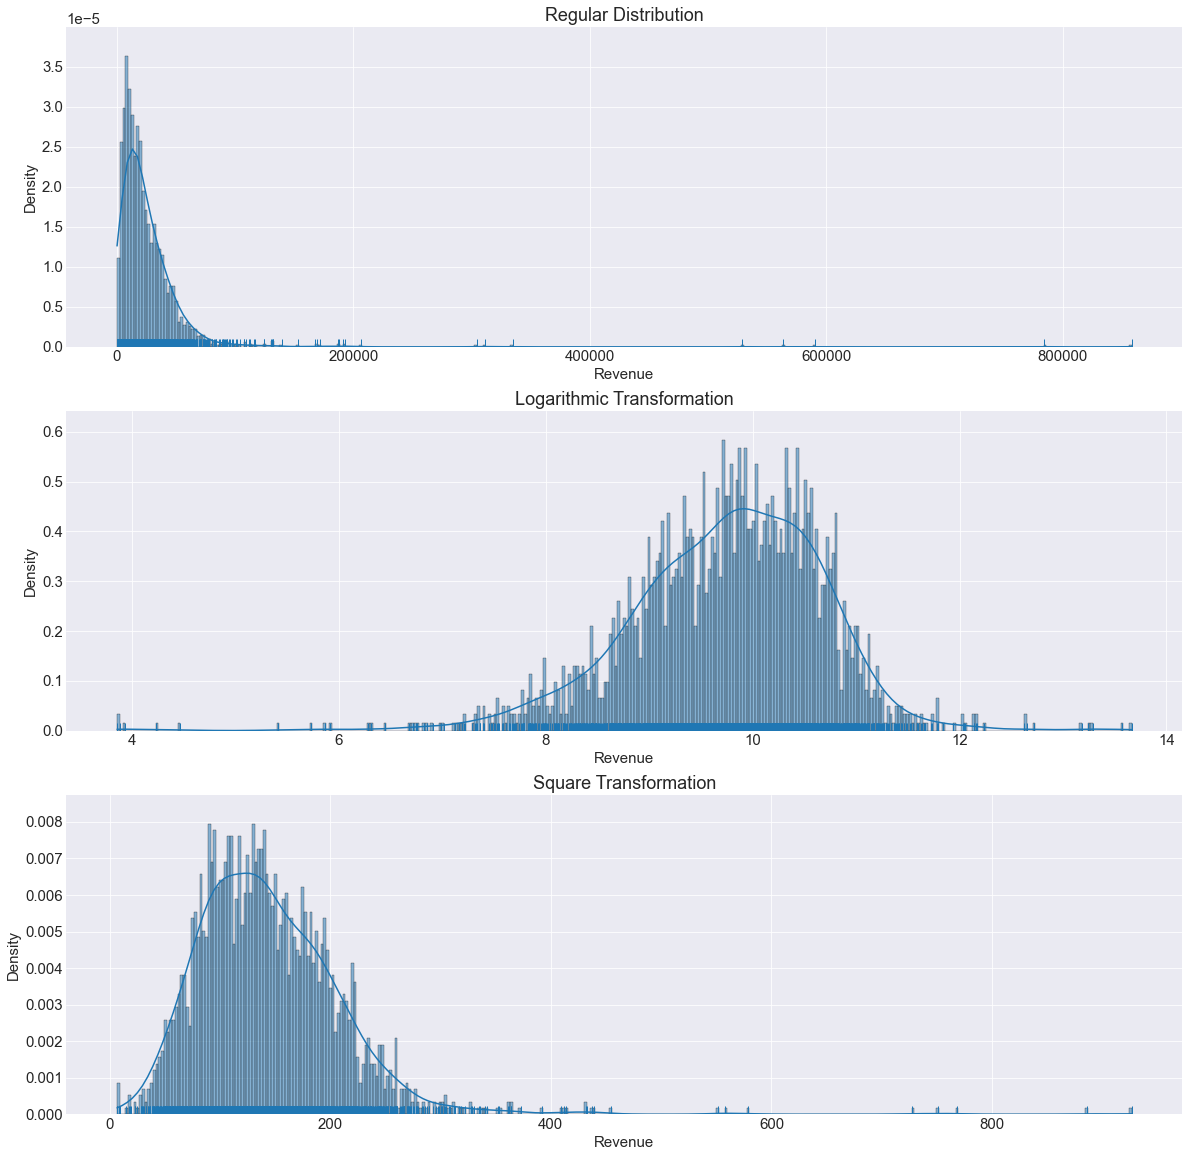

In [26]:
draw_set_of_distributions(data_small, 'Revenue');

Thanks to the Fitter library, we can test multiple Distributions with our target one and check what fits more. Here the results:
* Regular Distribution best fit with **Burr 12** is a subset of the log-logistic and quite similar like Log-Normal but heavier tails
* Logarithmic Distribution best fit with **Burr 12** is a subset of the log-logistic and quite similar like Log-Normal but heavier tails
* Square Transformation best fit with **Generalized Inverse Gaussian**

Next three cells are quite intense in terms of CPU, so it is better to avoid updating them

{'burr12': (1.6564489282351045,
  1.9556678515026467,
  -126.81077569070357,
  31089.229457822035)}

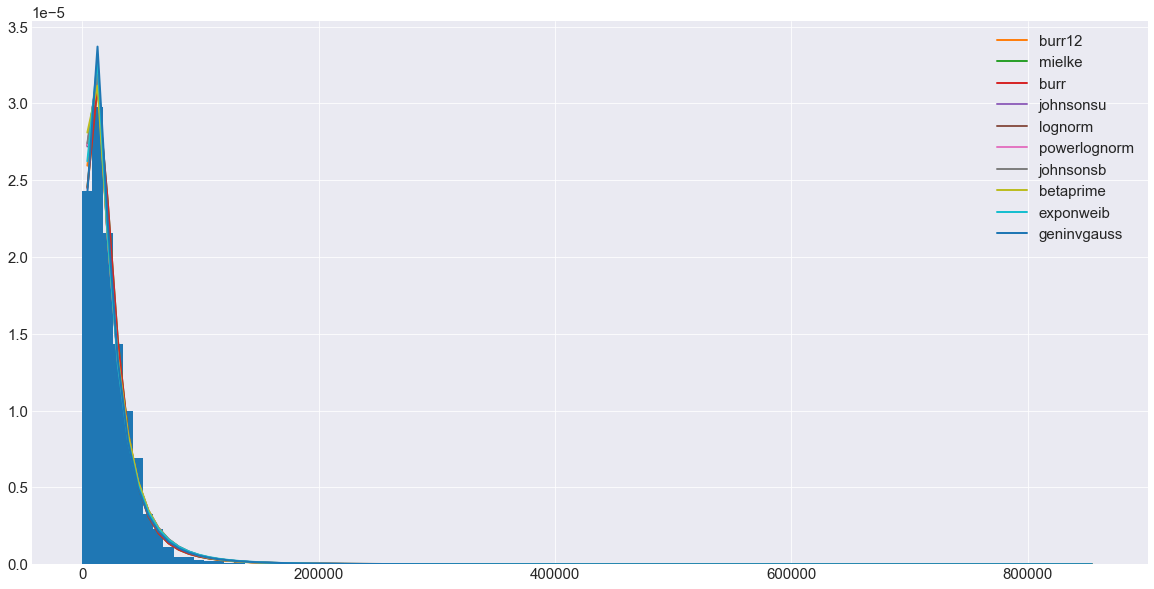

In [36]:
#Let's analyze what Distribution fits better with Revenue
fitter_norm = Fitter(data_small['Revenue'], distributions=stats)
fitter_norm.fit()
fitter_norm.summary(Nbest=10, plot=True)
fitter_norm.get_best(method='sumsquare_error')

{'burr12': (384702.2924953385,
  2.067211781495275,
  -238144.44500115028,
  238154.83555891953)}

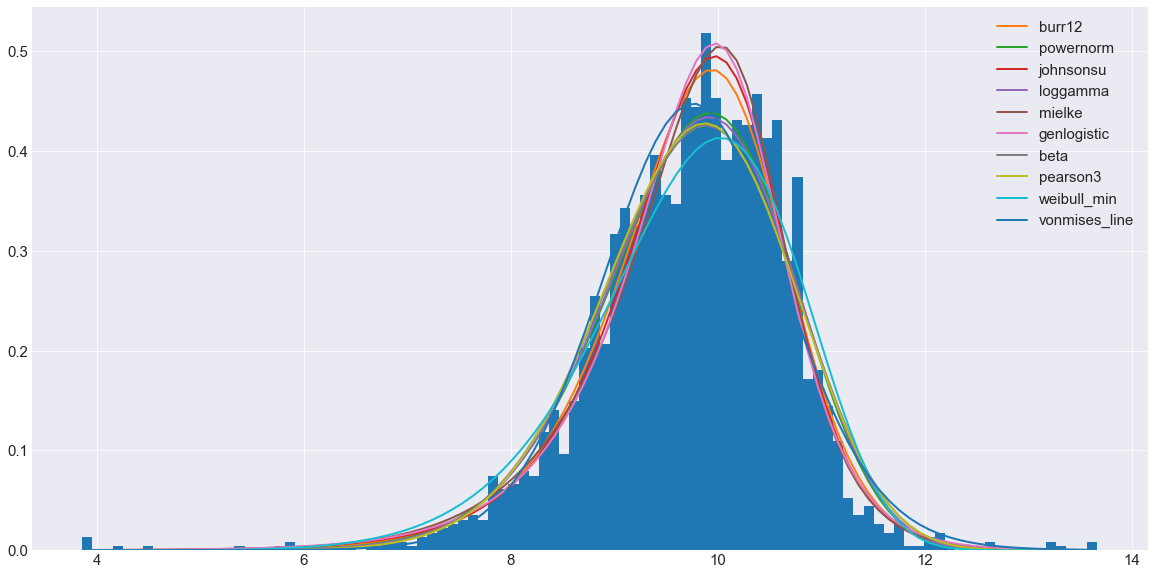

In [37]:
#Let's analyze what Distribution fits better with Revenue after a logarithmic transformation
fitter_log = Fitter(np.log1p(data_small['Revenue']), distributions=stats)
fitter_log.fit()
fitter_log.summary(Nbest=10, plot=True)
fitter_log.get_best(method='sumsquare_error')

{'geninvgauss': (2.9312250826410056,
  10.432029442219328,
  -63.31604351864814,
  152.06904745770987)}

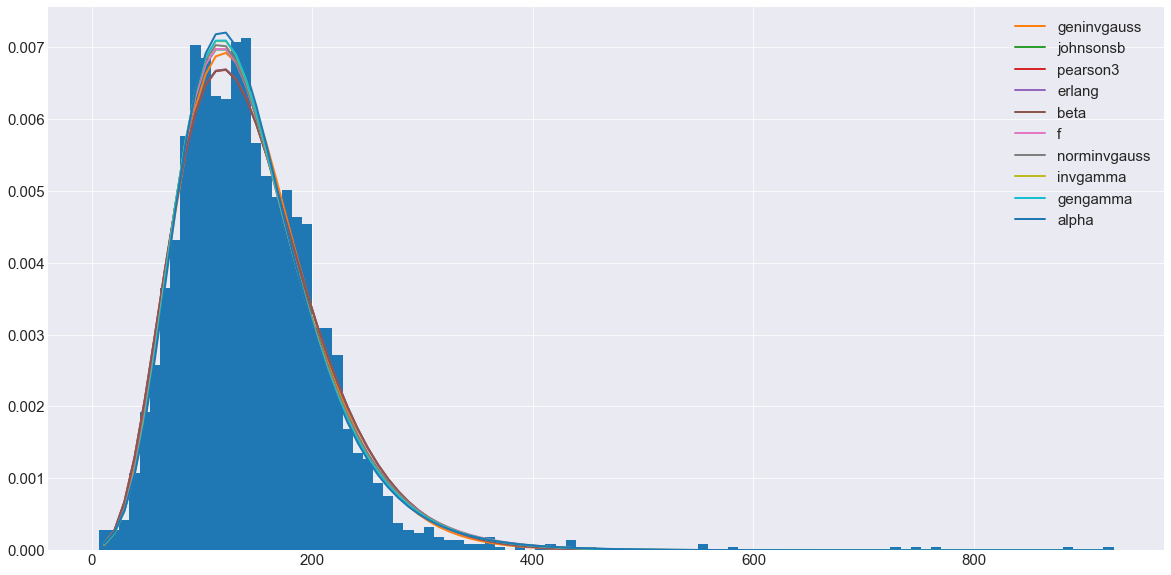

In [38]:
#Let's analyze what Distribution fits better with Revenue after a logarithmic transformation
fitter_sqr = Fitter(np.sqrt(data_small['Revenue']), distributions=stats)
fitter_sqr.fit()
fitter_sqr.summary(Nbest=10, plot=True)
fitter_sqr.get_best(method='sumsquare_error')

Let's see how the target variable evolute across a period of time. For example, it could be a Year, Month or even a Day. We can see as long as the time goes by, it is being more and more right asymetric.

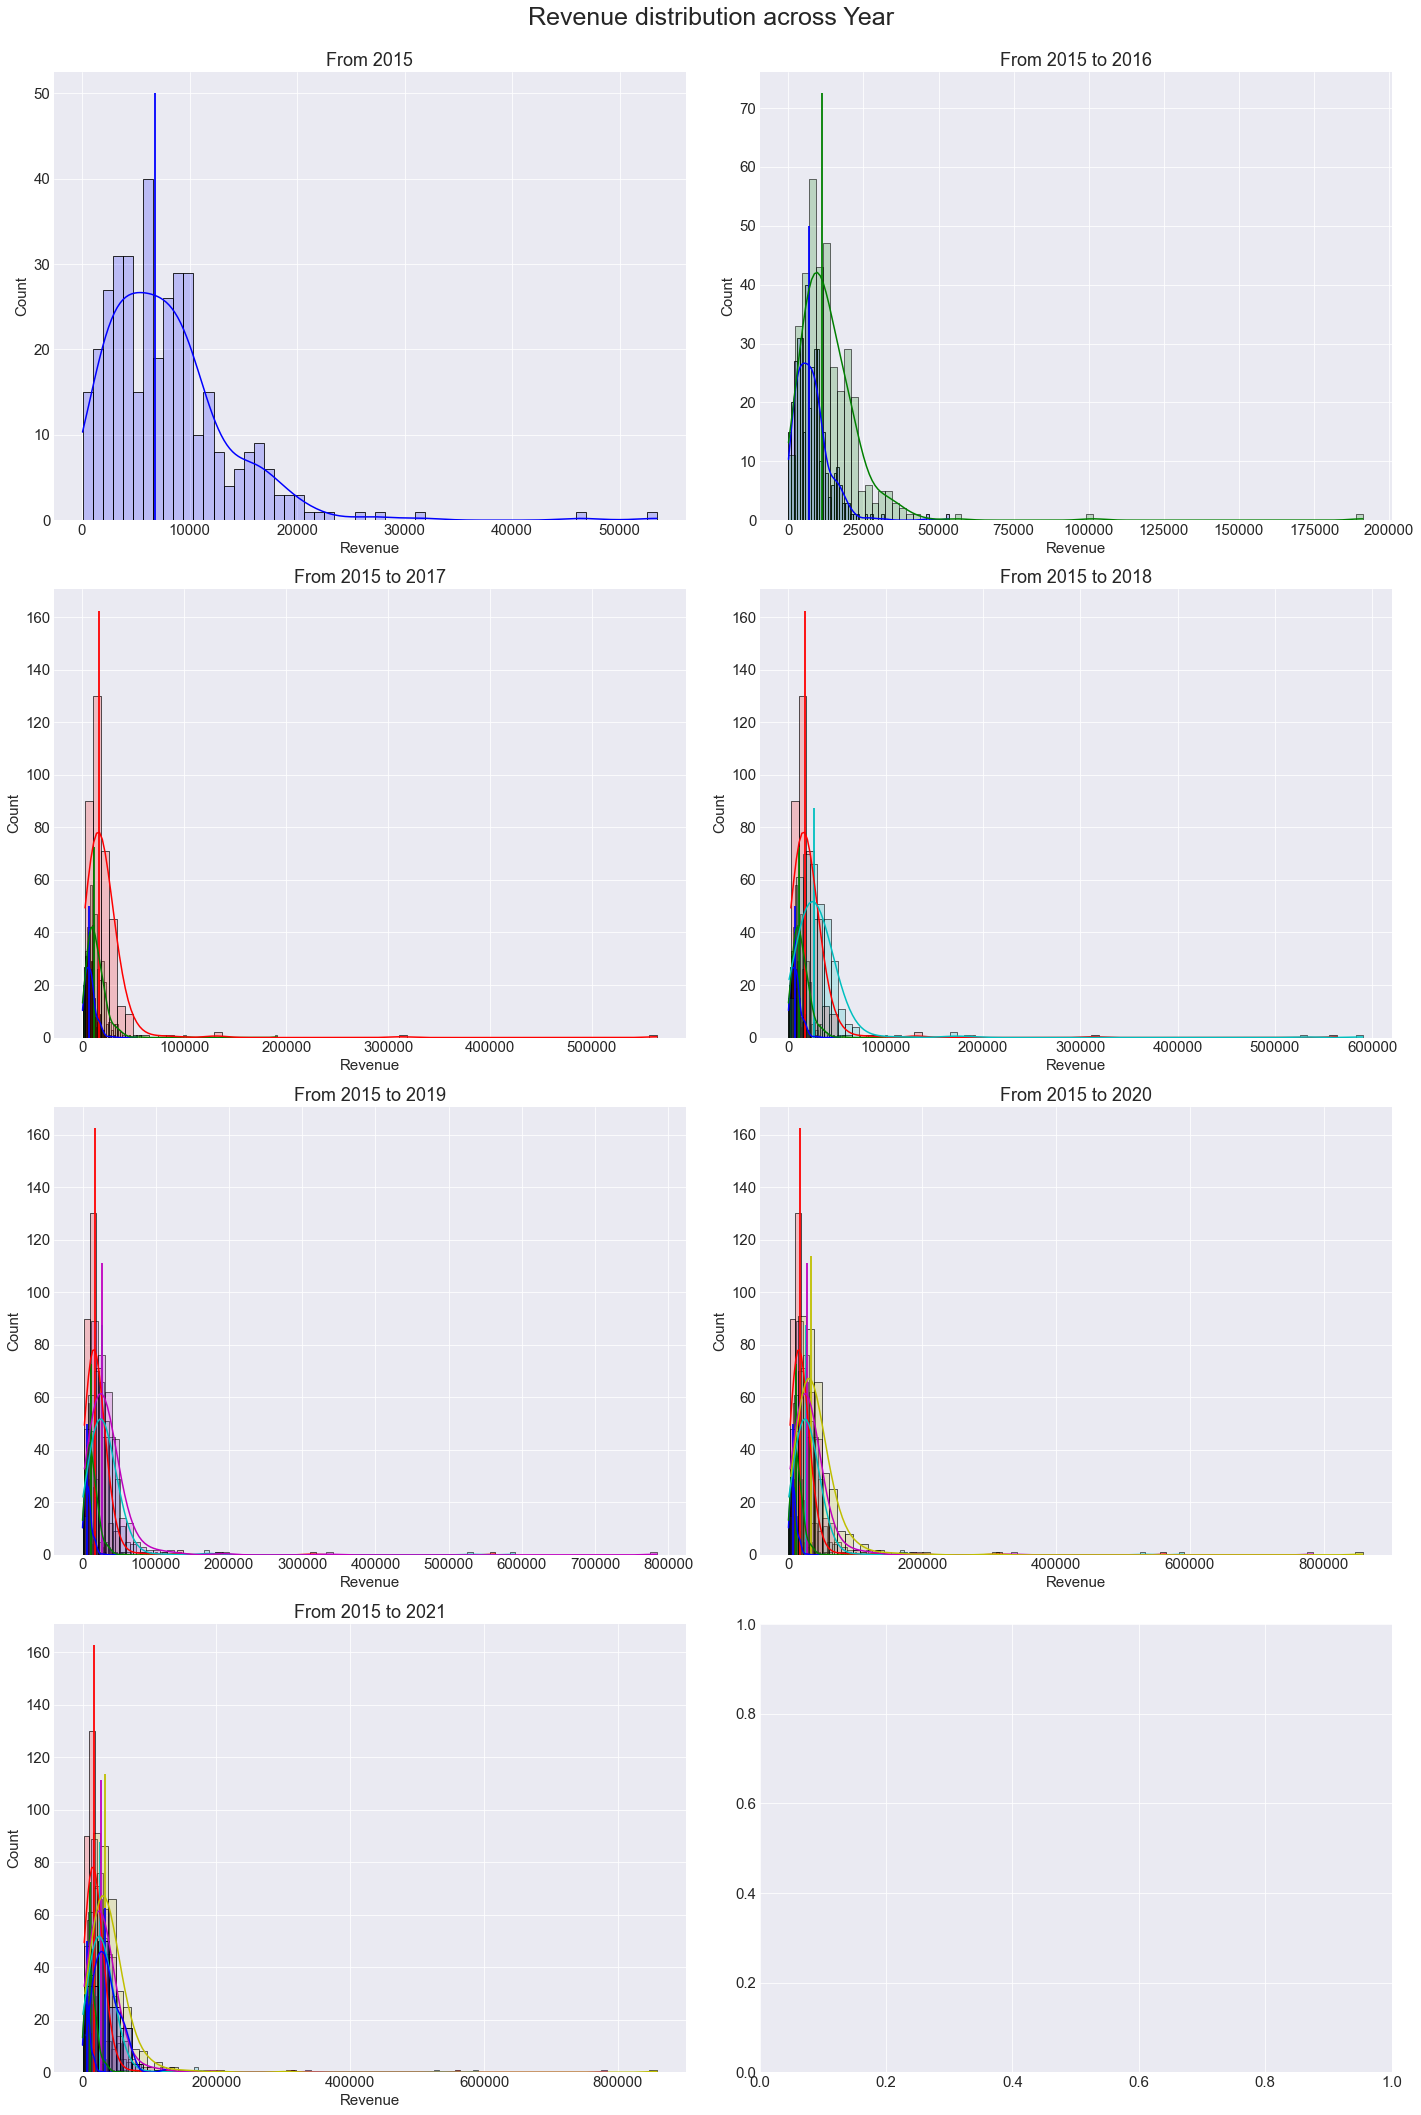

In [22]:
draw_distribution_evolution(data_small, 'Revenue', 'Year')

Now it is time for analyzing what is the distribution of the independent variables

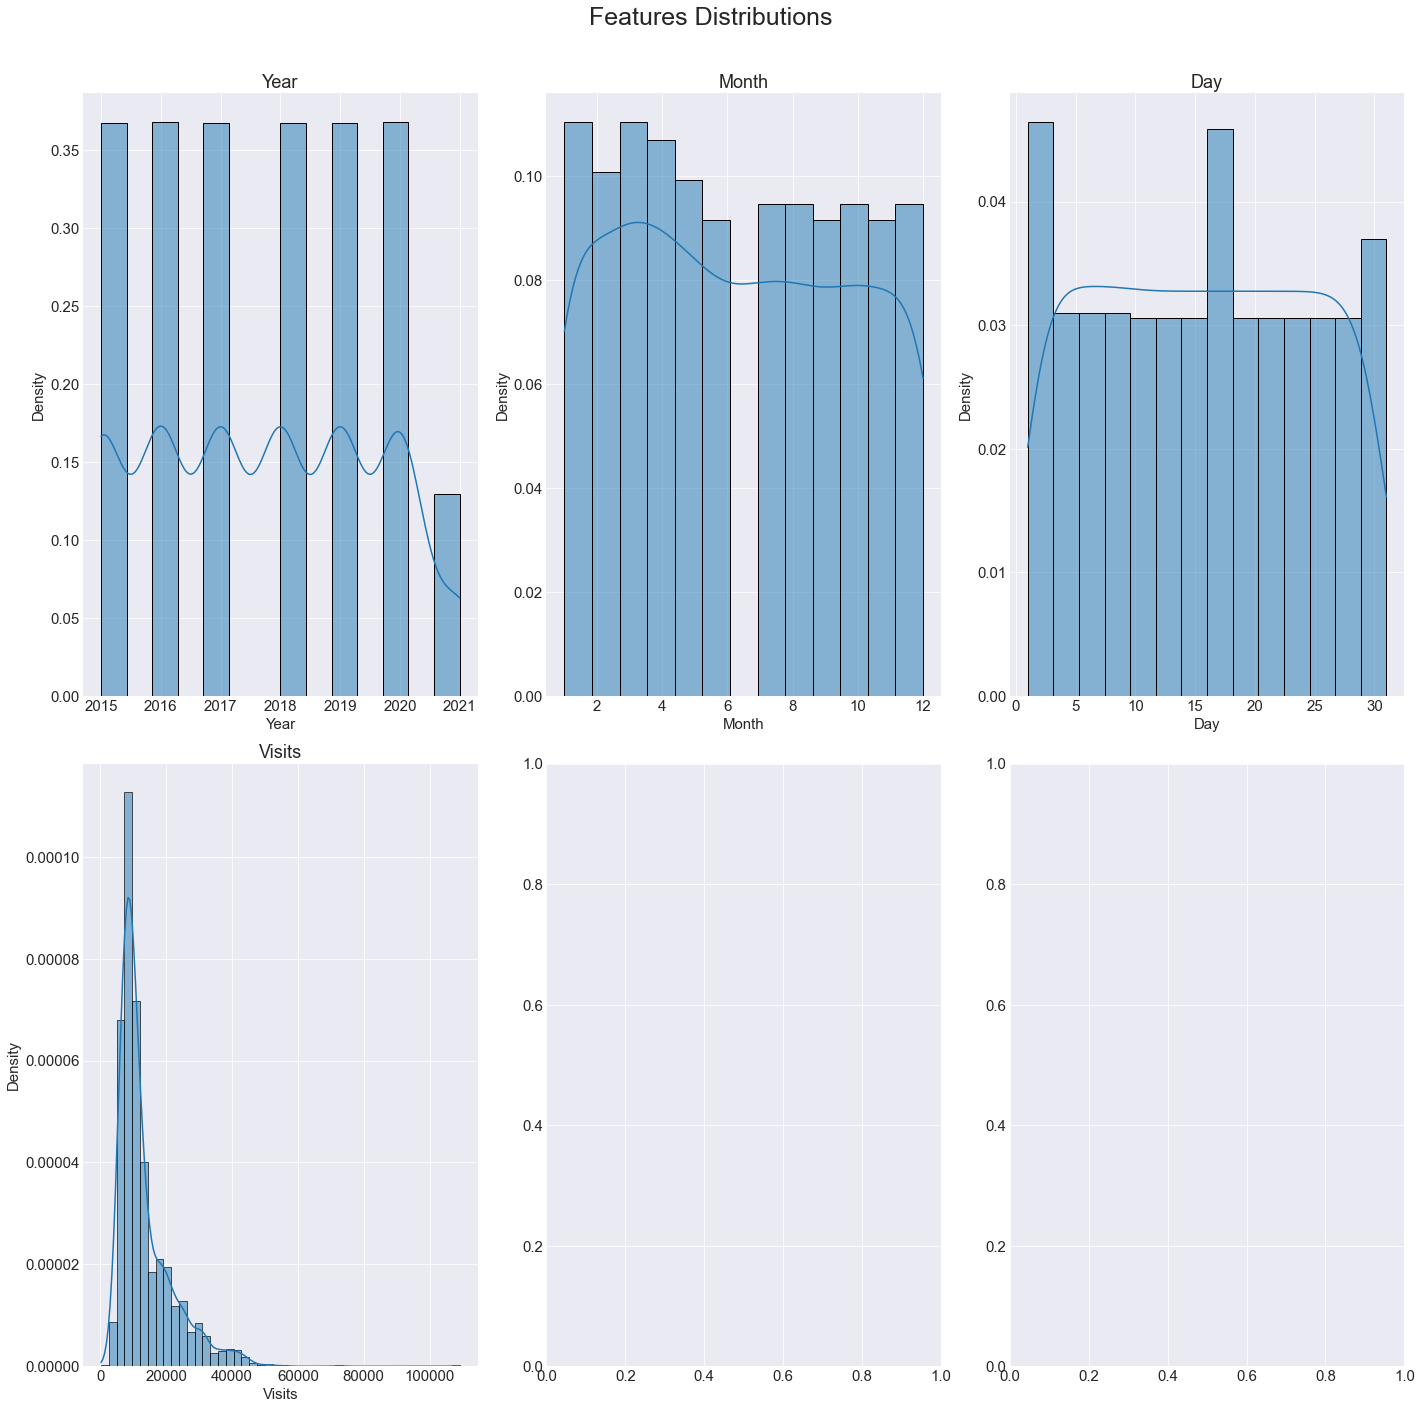

In [23]:
draw_distribution(data_small, data_small.columns[0:-1])

Let's see how the independent variables correlate with the dependant variable. As far as we can see, we cannot see a strong relationship between Year, Month and Day but we can see some correlation with Visits 

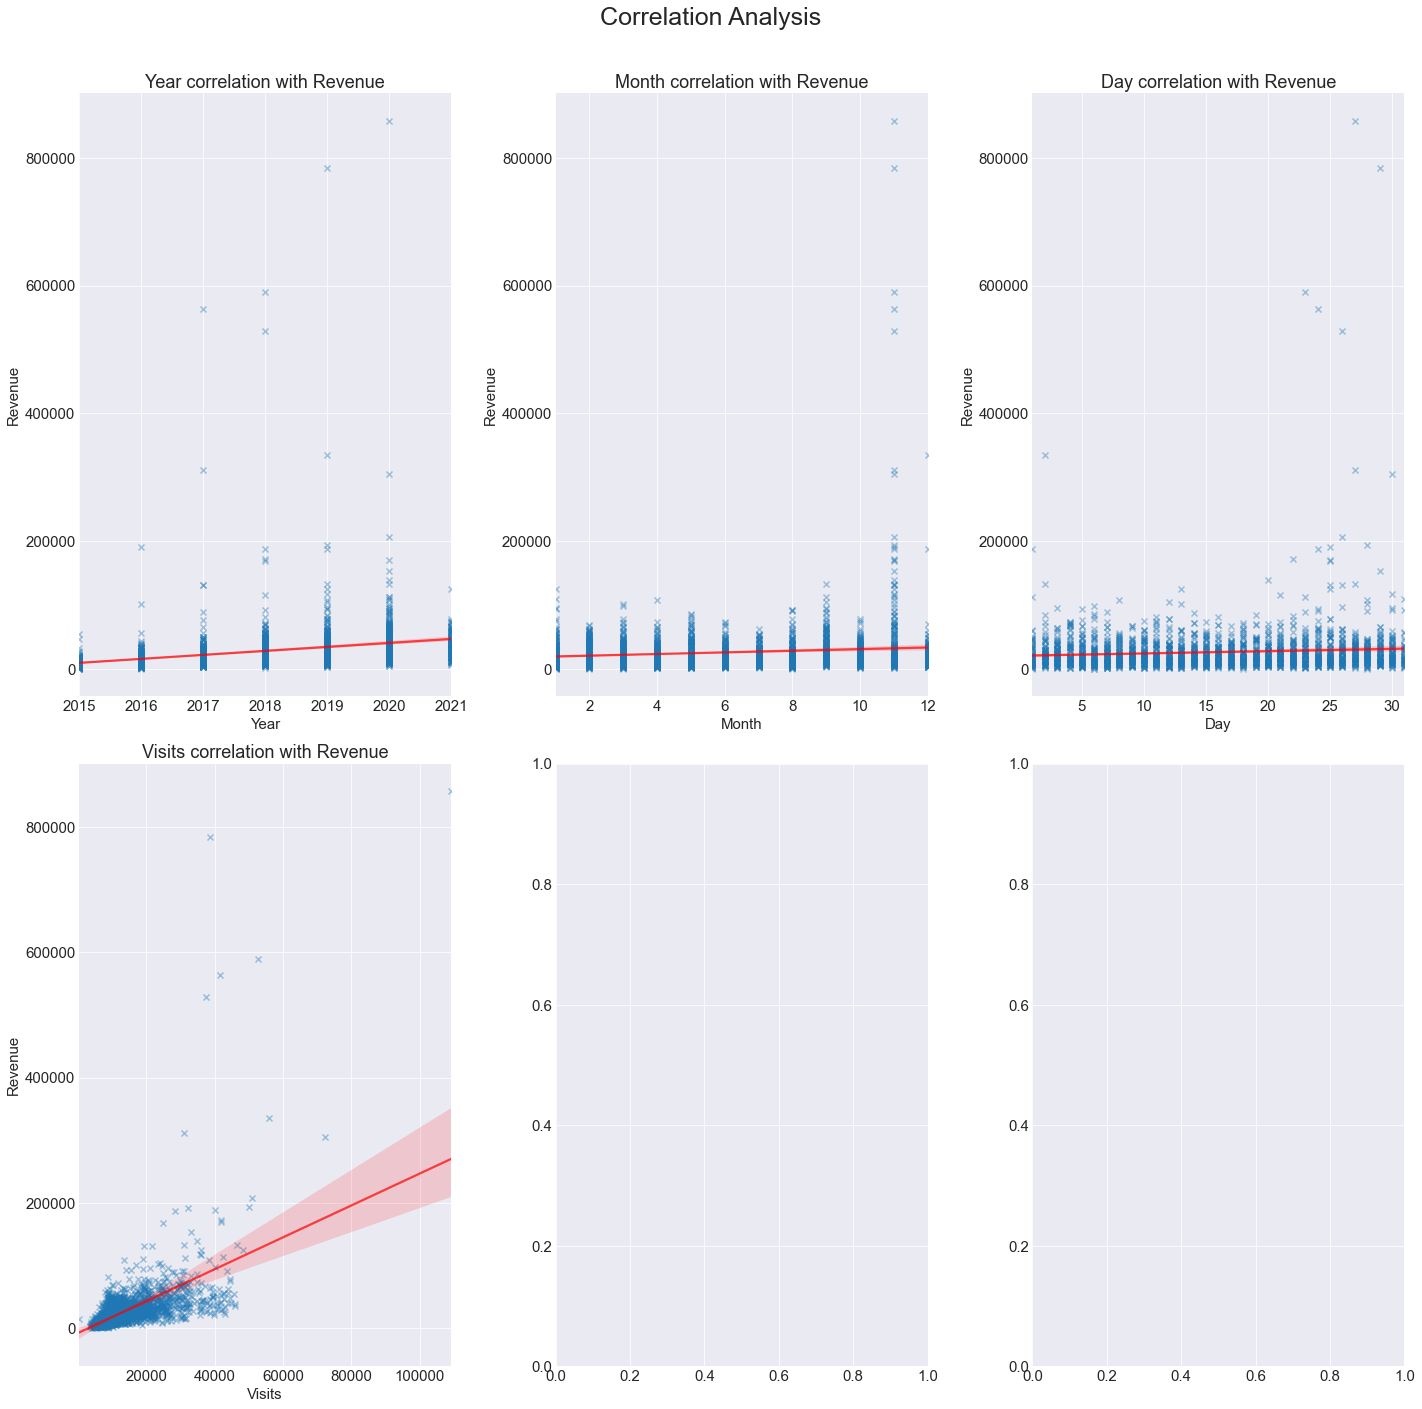

In [24]:
draw_correlation(data_small, data_small.columns[0:-1], data_small.columns[-1:])

Actually here, we can see that the correlation is quite remakable between Visits and Revenue but we can see also even stronger correlation between Year and Visits, so maybe there is collinearity between these two variable and in case we want to add them to a regression model, we should pick just one.

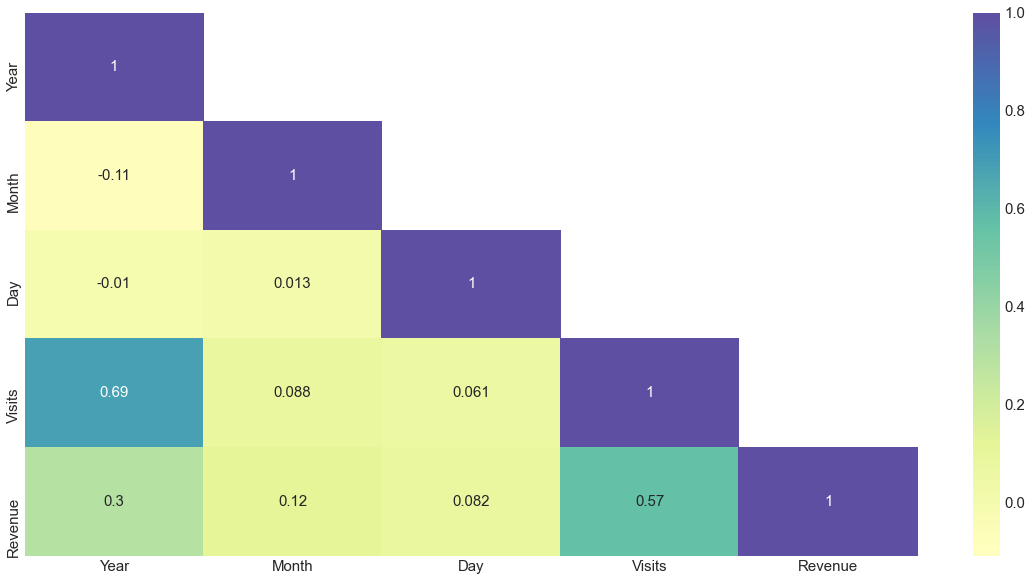

In [25]:
corr_matrix(data_small)

## Time Series

### Main Charasteristics

A Time Series could break down in four different features:
* Trend: It could go up or down acros the time
* Cyclic: Goes up or down without any specific reason
* Seasonality: Specific known pattern of one season
* Random or irregular movements: Noise size

We have two type of break down:
* Additive: yt = Tt + St + Ct + R
* Multiplicative = yt = Tt × St × Ct × R

### Aditive or Multiplative Analysis

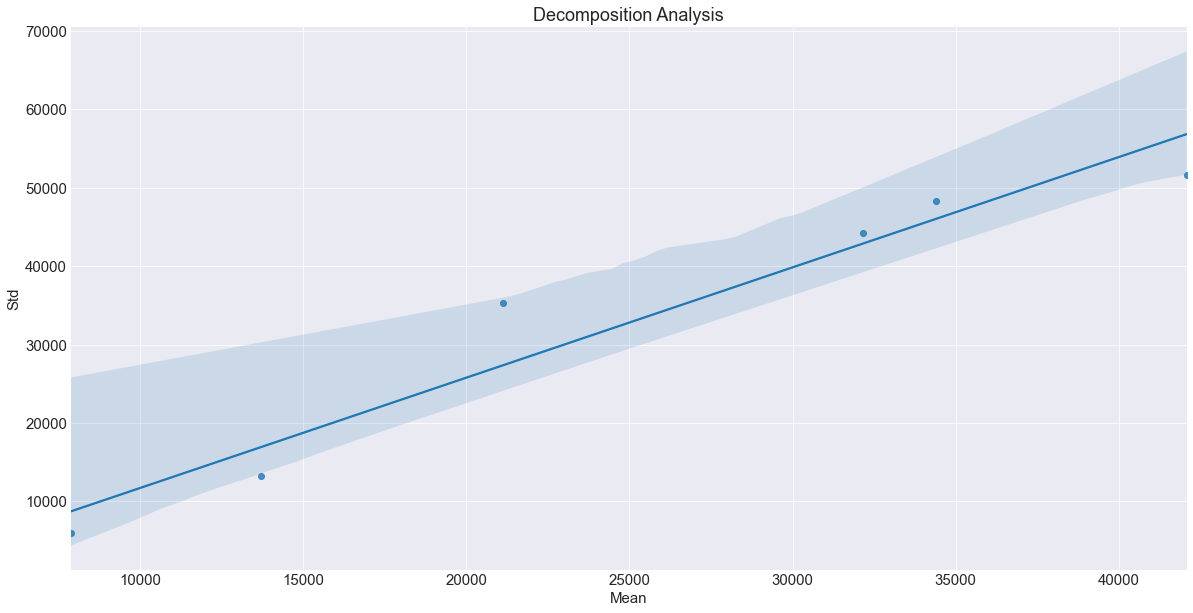

In [26]:
draw_decomposition(data_small);

It seems Multiplicative because the slope is not plain an around 45º

### Time Series Decomposition 

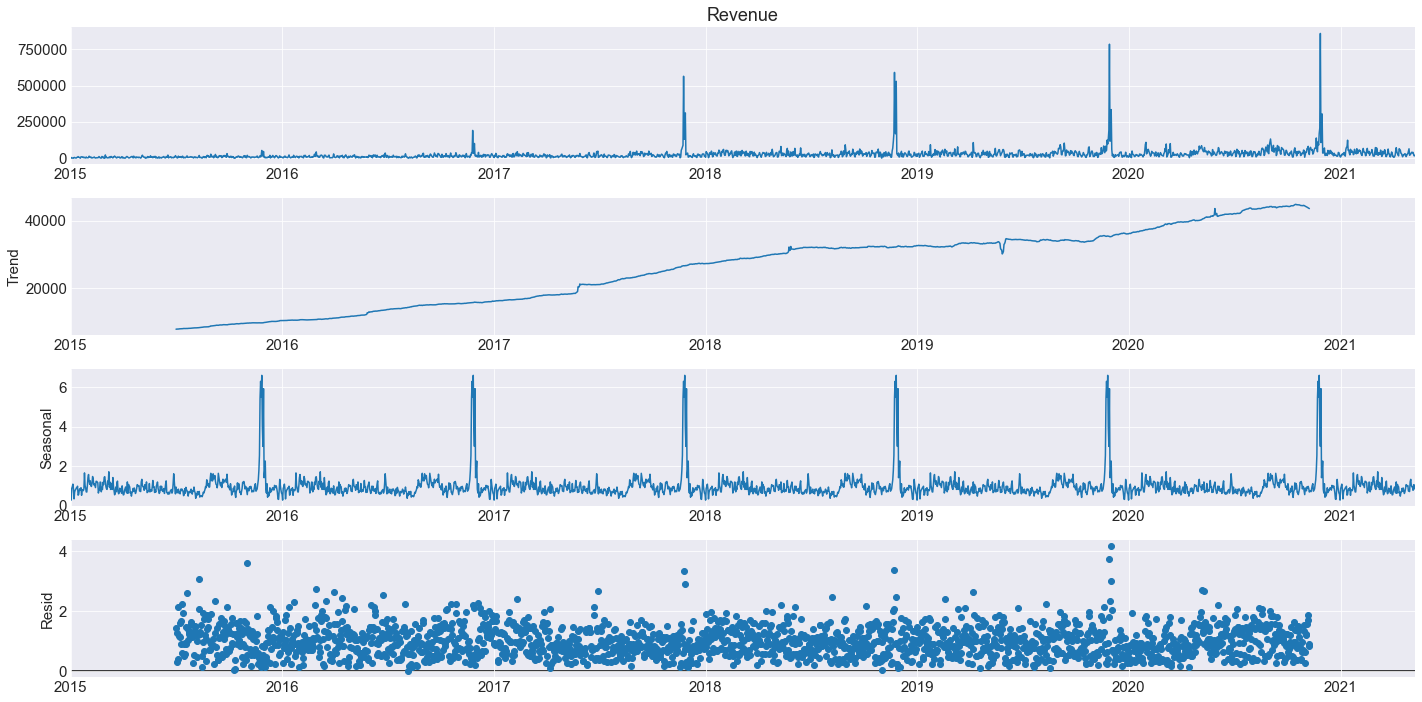

In [27]:
s_d_small = seasonal_decompose(data_small['Revenue'], period= 365, model= 'multiplicative')
s_d_small.plot();

### Stationary Analysis - Augmented Dickey-Fuller test 

In [28]:
test_adf(data_small, 'Revenue')

** Augmented Dickey-Fuller Test **

T-test: -7.039862496454264 < Confidence Interval[1%]: -3.4332013179632686 - Result: Stationary
T-test: -7.039862496454264 < Confidence Interval[5%]: -2.862799647940788 - Result: Stationary
T-test: -7.039862496454264 < Confidence Interval[10%]: -2.5674405676968886 - Result: Stationary

P-Value: 5.884812935635475e-10 < 0.05 - Result: Stationary


As far as we can see here, it seems this Time Series is Stationary. If we check same Time Series by Week, everything changes because it seems Non Stationary.

## White Noise

Random Walk - Dickey-Fuller test

H0: β = 0 (This is a random walk)

H1: β < 0 (This is not a random walk)

In [29]:
test_adf(data_small, 'Revenue')

** Augmented Dickey-Fuller Test **

T-test: -7.039862496454264 < Confidence Interval[1%]: -3.4332013179632686 - Result: Stationary
T-test: -7.039862496454264 < Confidence Interval[5%]: -2.862799647940788 - Result: Stationary
T-test: -7.039862496454264 < Confidence Interval[10%]: -2.5674405676968886 - Result: Stationary

P-Value: 5.884812935635475e-10 < 0.05 - Result: Stationary


### Residual Analysis 

Residuals are White Noise, it has passed the ADF Test and therefore it is not a Random Walk and we can also see visually that the mean is 'plain'

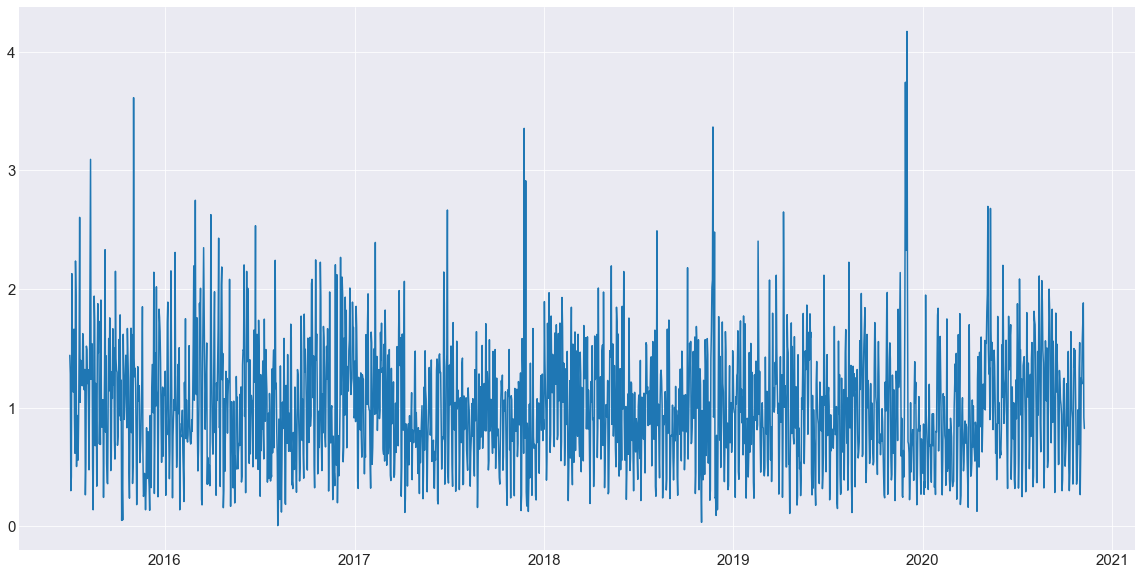

In [31]:
plt.plot(s_d_small.resid.index, s_d_small.resid)

In [32]:
#Augmented Dickey-Fuller test
residual = pd.DataFrame(s_d_small.resid)
residual.dropna(inplace= True)
test_adf(residual, residual.columns[0])

** Augmented Dickey-Fuller Test **

T-test: -8.225290896067236 < Confidence Interval[1%]: -3.433742755820826 - Result: Stationary
T-test: -8.225290896067236 < Confidence Interval[5%]: -2.8630387070112255 - Result: Stationary
T-test: -8.225290896067236 < Confidence Interval[10%]: -2.5675678525598005 - Result: Stationary

P-Value: 6.270228215150377e-13 < 0.05 - Result: Stationary


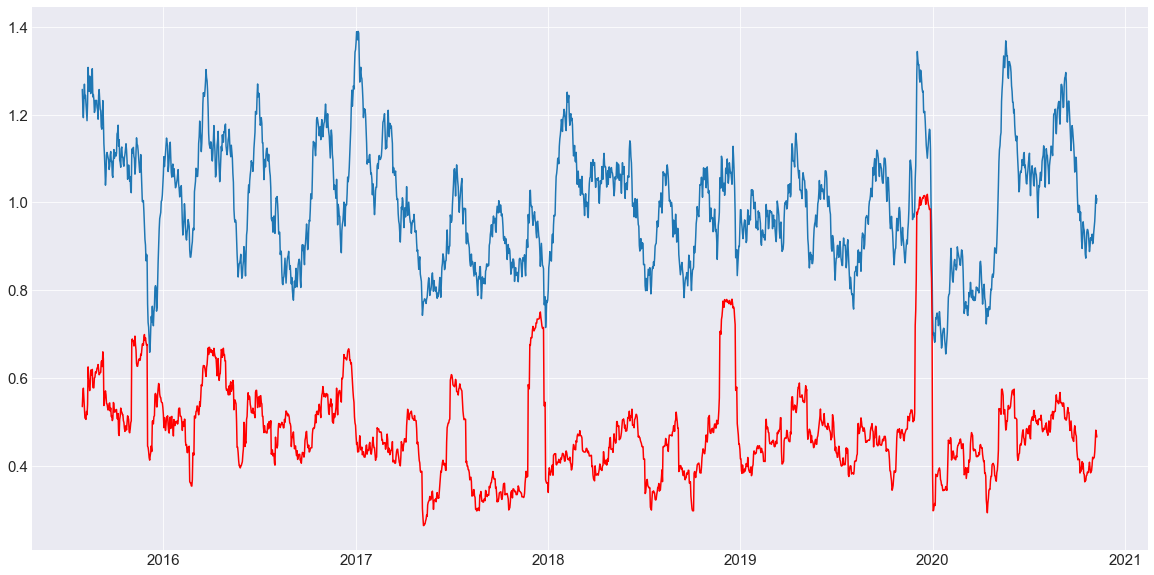

In [33]:
#Visual Analysis
#Let's calculate the rolling mean
rolling_mean = residual.rolling(window=30).mean()
rolling_mean.dropna(inplace= True)
#And the rolling std
rolling_std = residual.rolling(window=30).std()
rolling_std.dropna(inplace= True)

plt.plot(rolling_mean.index, rolling_mean)
plt.plot(rolling_std.index, rolling_std, c= 'r')

### Autocorrelation and Partial Autocorrelation

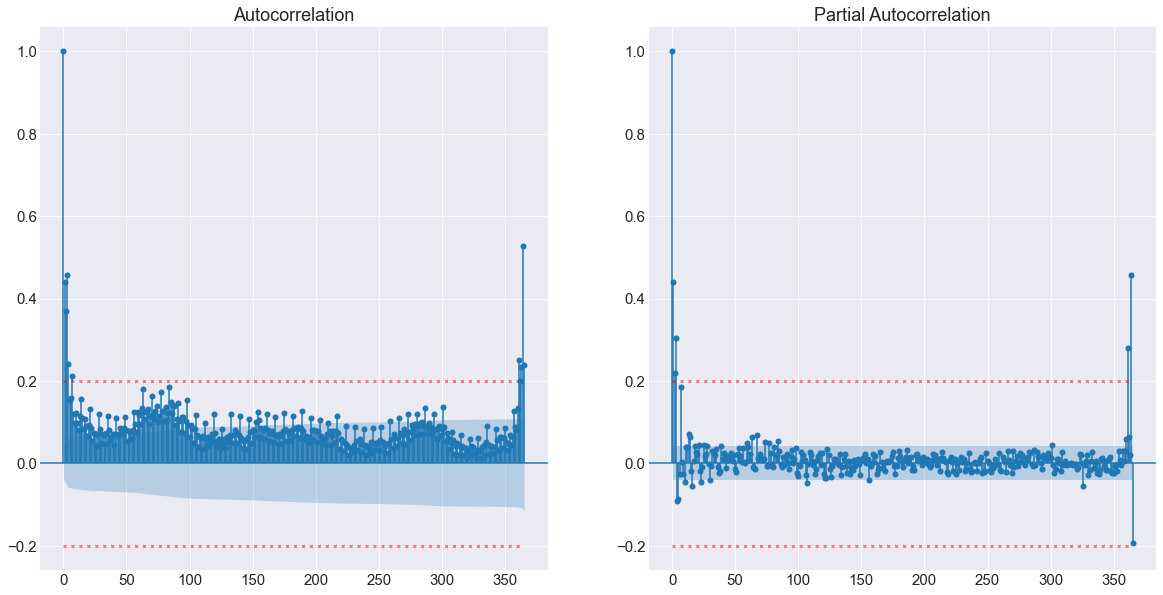

In [34]:
draw_autocorrelation(data_small, 365)

### Naïve Model 

We are going to use as baseline model, this one 'Last Naïve Value' Y(t+ 1) =Y(t)

In [35]:
column = 'Revenue'
data_s = data_small[[column]].copy()
data_s[f'{column}_predicted'] = data_s[column].shift(1)
data_s.dropna(inplace= True)

<AxesSubplot:xlabel='Date'>

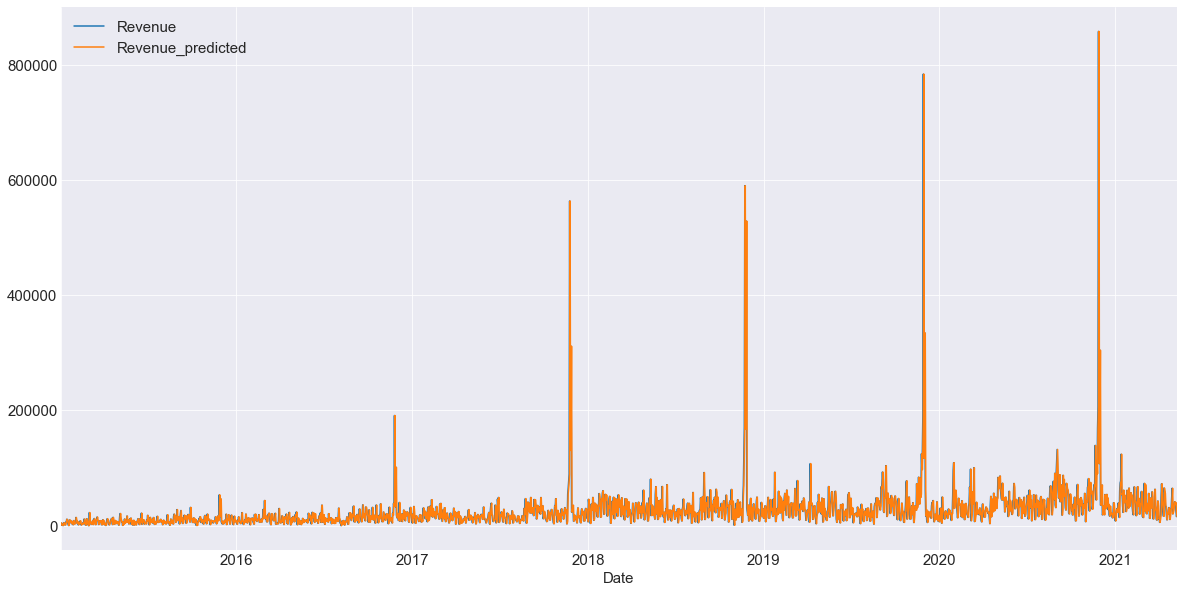

In [36]:
data_s.plot()

In [37]:
#Model RMSE
metric_rmse(data_s, 'Revenue')

40772.74855191387

In [38]:
data_full = pd.concat([data_small[[column]], data_validation[[column]]])
data_full[f'{column}_predicted'] = data_full[column].shift(1)
data_full.dropna(inplace= True)

<AxesSubplot:xlabel='Date'>

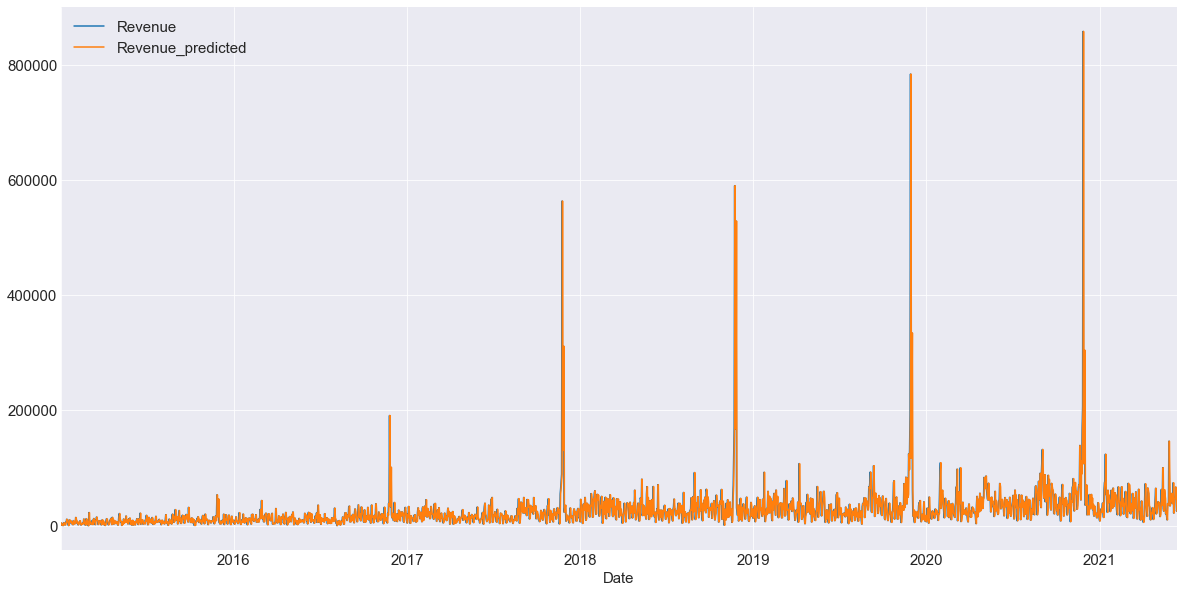

In [39]:
data_full.plot()

In [40]:
#Model Validation
#Model RMSE
metric_rmse(data_full, 'Revenue')

40663.83491157377

<AxesSubplot:xlabel='Date'>

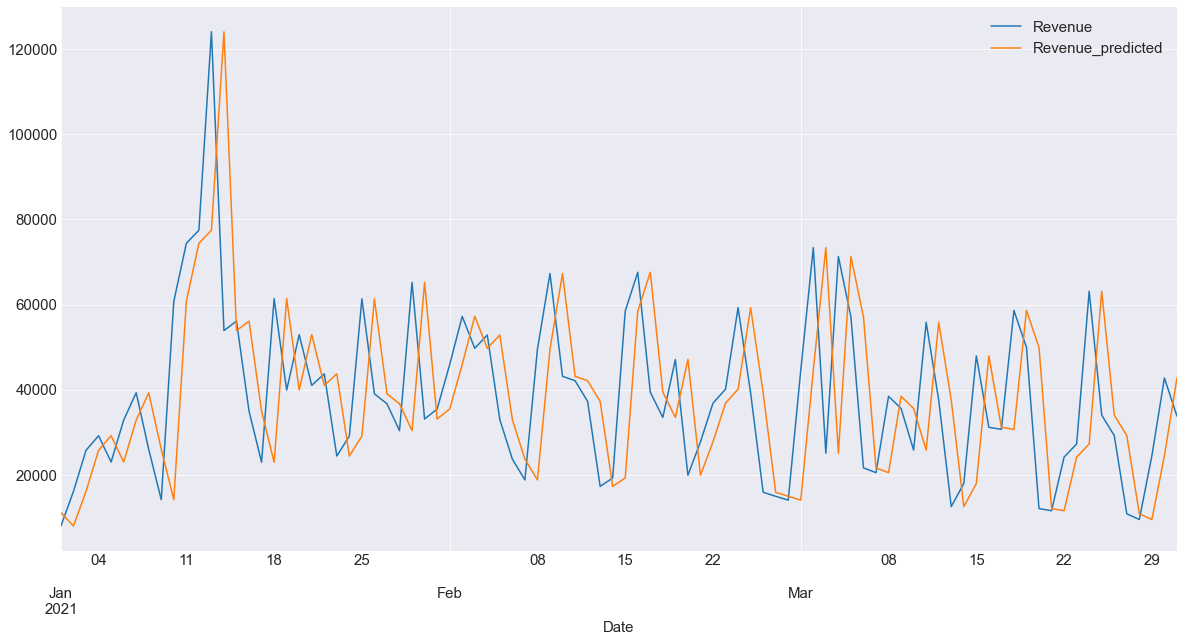

In [41]:
#Let's see it more in detail
data_full.loc['2021-01-01':'2021-03-31'].plot()

As we can see, this would be our starting point for comparing the error across the rest of the models

### SARIMAX 

We are going to apply a SARIMAX model for our Time Series. We are going to create three exogenous variables.
* Black Friday: This will consider from Black Friday to Cyber Monday. Four days in total
* Easter: This is another important period, from Monday to next Monday. Some Communities have slightly different Easter Weeks
* Covid: A new exceptional period. We are going to start with the full lockdown

In [42]:
#Let's create the new exogenous variables
data_exogenous = get_exogenous_features(data_small)

In [43]:
#We have create a GridSearch in order to chose the better hyperparameters
#IMPORTANT, this task is quite intensive so we are saving a pickle for multiple iterations.
#ASSUMPTIONS, we would like to test with 365 season but we do not have enough memory
arima_params = {'p': [5, 7],
                'd': [0, 2], #Up to 1
                'q': [5, 7]}

sarima_params = {'P': [5, 7],
                 'D': [0, 2], #Up to 1
                 'Q': [5, 7],
                 'S': [7]}

trend_params = ['t'] #We has test before and this is the best option always

In [34]:
#We have create a GridSearch in order to chose the better hyperparameters
#IMPORTANT, this task is quite intensive so we are saving a pickle for multiple iterations.
#ASSUMPTIONS, we would like to test with 365 season but we do not have enough memory
arima_params = {'p': [0, 2],
                'd': [0, 2], #Up to 1
                'q': [0, 1]}

sarima_params = {'P': [0, 1],
                 'D': [0, 2], #Up to 1
                 'Q': [0, 1],
                 'S': [2]}

trend_params = ['t'] #We has test before and this is the best option always

In [44]:
X_train, y_train, X_test, y_test = sarimax_preparation_split(data_exogenous)

In [35]:
#This is SARIMAX Grid Search - This is SUPER time consuming
test_aic = gridsearch_sarimax(y_train, X_train[['Black_Friday', 'Easter', 'Covid']], arima_params, 
                             sarima_params, trend_params)

I have executed three times Grid Search splitting search with different options. Below, we can see best hyperparameters.

In [20]:
sorted(test_aic.items(), key=lambda x: x[1])

[((3, 0, 0, '-', 1, 0, 1, 7, '-', 't'), 47898.60855109147),
 ((3, 0, 0, '-', 2, 0, 1, 7, '-', 't'), 47899.75870881471),
 ((3, 0, 0, '-', 1, 0, 2, 7, '-', 't'), 47900.13801876921),
 ((3, 0, 0, '-', 1, 0, 3, 7, '-', 't'), 47902.40845644389),
 ((3, 0, 0, '-', 2, 0, 2, 7, '-', 't'), 47902.85803318481),
 ((3, 0, 1, '-', 1, 0, 1, 7, '-', 't'), 47903.52229778633),
 ((3, 0, 0, '-', 3, 0, 2, 7, '-', 't'), 47903.723548246824),
 ((3, 0, 0, '-', 2, 0, 3, 7, '-', 't'), 47904.485667301924),
 ((2, 0, 3, '-', 1, 0, 1, 7, '-', 't'), 47904.873850624266),
 ((3, 0, 0, '-', 3, 0, 1, 7, '-', 't'), 47907.800261122626),
 ((3, 0, 0, '-', 3, 0, 3, 7, '-', 't'), 47907.87278512935),
 ((3, 0, 1, '-', 1, 0, 2, 7, '-', 't'), 47907.95030234906),
 ((1, 0, 3, '-', 1, 0, 1, 7, '-', 't'), 47908.593753361754),
 ((1, 0, 3, '-', 2, 0, 1, 7, '-', 't'), 47911.22732210987),
 ((1, 0, 3, '-', 1, 0, 2, 7, '-', 't'), 47912.146571199184),
 ((3, 0, 1, '-', 1, 0, 3, 7, '-', 't'), 47913.88543416833),
 ((3, 0, 3, '-', 0, 1, 1, 7, '-', 

In [129]:
sorted(test_aic.items(), key=lambda x: x[1])

[((4, 0, 4, '-', 4, 0, 4, 7, '-', 't'), 47982.72285554057),
 ((4, 0, 4, '-', 4, 1, 4, 7, '-', 't'), 48015.33809054071),
 ((4, 1, 4, '-', 4, 0, 4, 7, '-', 't'), 48034.47456622115),
 ((4, 1, 4, '-', 4, 1, 4, 7, '-', 't'), 48306.6430314474)]

In [132]:
sorted(test_aic.items(), key=lambda x: x[1])

[((6, 0, 5, '-', 5, 0, 5, 7, '-', 't'), 47932.131057390296),
 ((5, 0, 6, '-', 5, 0, 6, 7, '-', 't'), 47934.27837766443),
 ((6, 0, 5, '-', 6, 0, 5, 7, '-', 't'), 47936.178517190405),
 ((5, 0, 6, '-', 6, 0, 5, 7, '-', 't'), 47936.5629532279),
 ((6, 0, 5, '-', 5, 0, 6, 7, '-', 't'), 47938.67609038649),
 ((6, 0, 6, '-', 5, 0, 6, 7, '-', 't'), 47939.576789980885),
 ((6, 0, 6, '-', 6, 0, 6, 7, '-', 't'), 47940.09103830449),
 ((6, 0, 6, '-', 5, 0, 5, 7, '-', 't'), 47941.731750452425),
 ((6, 0, 6, '-', 6, 0, 5, 7, '-', 't'), 47941.94278978875),
 ((5, 0, 5, '-', 5, 0, 6, 7, '-', 't'), 47945.21216202574),
 ((5, 0, 6, '-', 5, 0, 5, 7, '-', 't'), 47945.30127016295),
 ((5, 0, 6, '-', 6, 0, 6, 7, '-', 't'), 47950.71264493723),
 ((6, 0, 5, '-', 6, 0, 6, 7, '-', 't'), 47954.29555960231),
 ((5, 0, 5, '-', 6, 0, 5, 7, '-', 't'), 47956.336323259784),
 ((6, 0, 6, '-', 5, 1, 5, 7, '-', 't'), 47959.46935074453),
 ((6, 0, 6, '-', 5, 1, 6, 7, '-', 't'), 47960.85814227002),
 ((6, 0, 6, '-', 6, 1, 5, 7, '-', 't

In [45]:
#Fit considering best hyperparameters
model = SARIMAX(endog= y_train, exog= X_train[['Black_Friday', 'Easter', 'Covid']],
                order= (3, 0, 0), seasonal_order= (1, 0, 1, 7), trend= 't')
result = model.fit()

In [46]:
#Predict taking full Train
forecast = result.get_prediction(start= '2015-01-01', end= '2020-09-18', 
                                 exog= X_train.loc['2015-01-01':'2020-09-18'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

Date
2015-01-01       48.261495
2015-01-02     1329.829374
2015-01-03     2070.849849
2015-01-04     1012.778703
2015-01-05     1511.628873
                  ...     
2020-09-14    48638.057794
2020-09-15    52858.167422
2020-09-16    45358.117886
2020-09-17    65179.810754
2020-09-18    50782.665643
Freq: D, Name: Revenue_predicted, Length: 2088, dtype: float64

<AxesSubplot:xlabel='Date'>

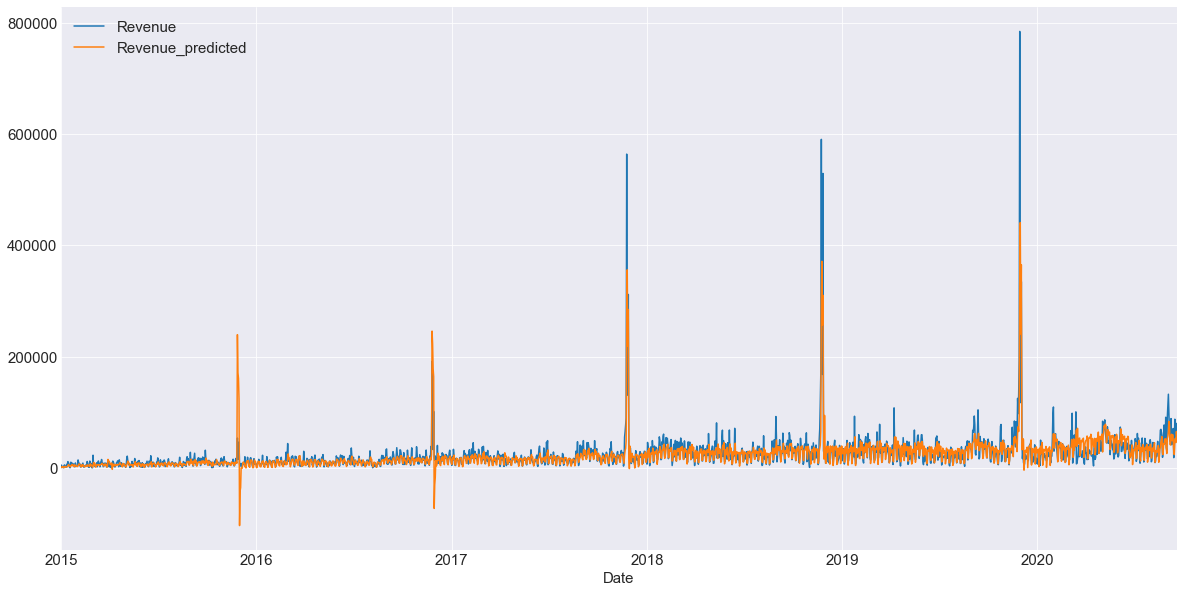

In [47]:
data_train_predict = pd.concat([y_train, mean_forecast], axis= 1)
data_train_predict.plot()

<AxesSubplot:xlabel='Date'>

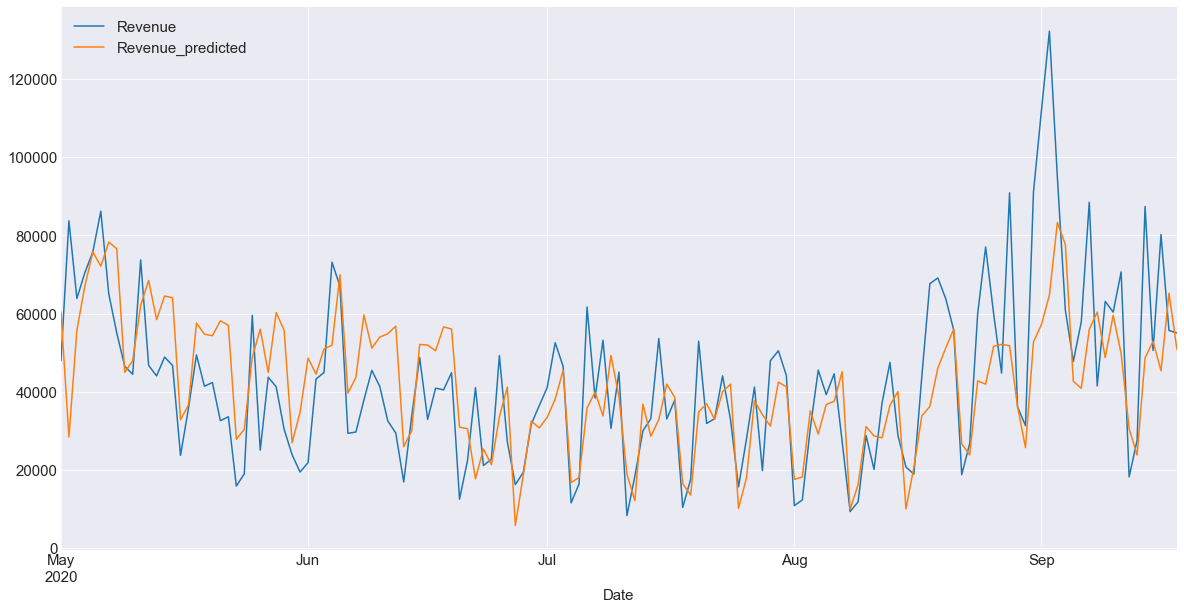

In [48]:
#Let's see a subset of the Time Series
data_train_predict.loc['2020-05-01':'2020-09-18'].plot()

In [49]:
metric_rmse(data_train_predict, 'Revenue')

22941.71458906555

Residuals
count    2088.000000
mean      566.758076
std     22940.206854
min   -323607.483618
25%     -4589.321919
50%       247.344918
75%      5221.876433
max    453291.279032

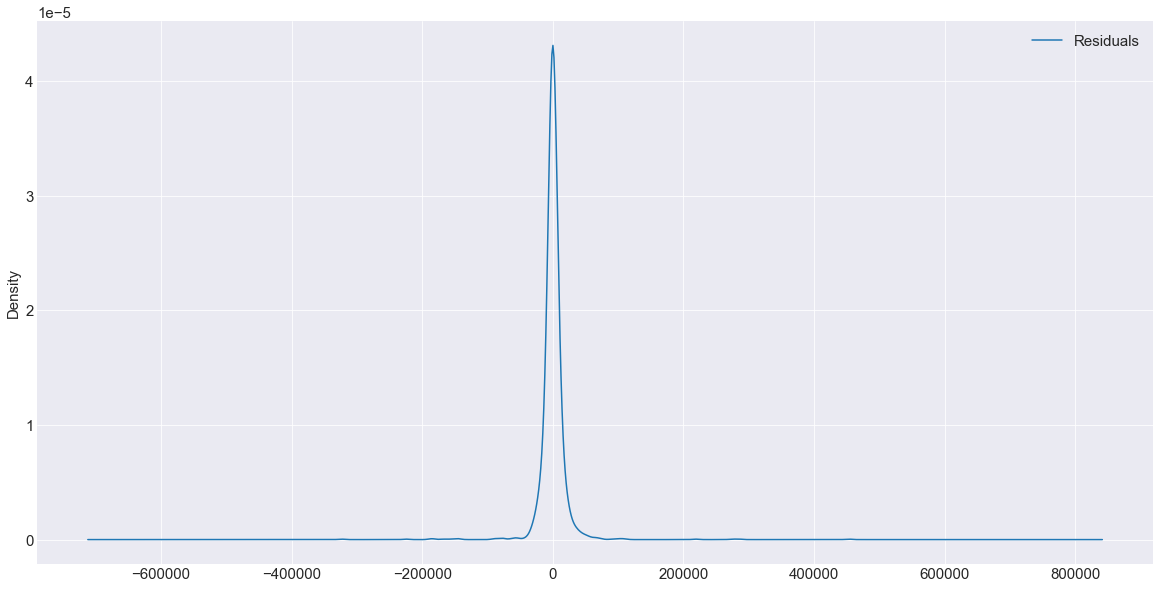

In [50]:
#Residual Analysis
data_residual = pd.DataFrame()
#Real - Predict
data_residual['Residuals'] = \
    data_train_predict[data_train_predict.columns[0]] - data_train_predict[data_train_predict.columns[1]]
data_residual.plot(kind='kde')

#Let's see the mean if it is in the center or show kind of skew
data_residual.describe()

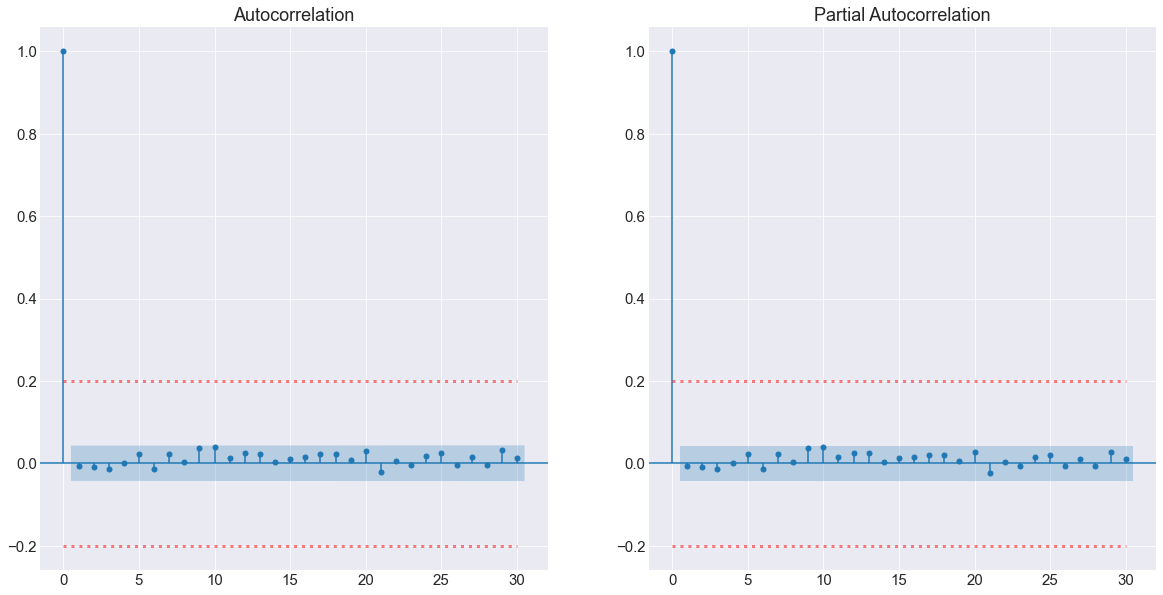

In [51]:
draw_autocorrelation(pd.DataFrame(result.resid), 30)

In [52]:
#Forecast vs. Test

#Predict taking full Test
forecast = result.get_prediction(start= '2020-09-19', end= '2021-05-09', 
                                 exog= X_test.loc['2020-09-19':'2021-05-09'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

2020-09-19    28934.311255
2020-09-20    26444.037858
2020-09-21    45782.924854
2020-09-22    41327.546210
2020-09-23    42715.955671
                  ...     
2021-05-05    43752.538070
2021-05-06    45073.630018
2021-05-07    46842.039874
2021-05-08    21713.326417
2021-05-09    24541.436958
Freq: D, Name: Revenue_predicted, Length: 233, dtype: float64

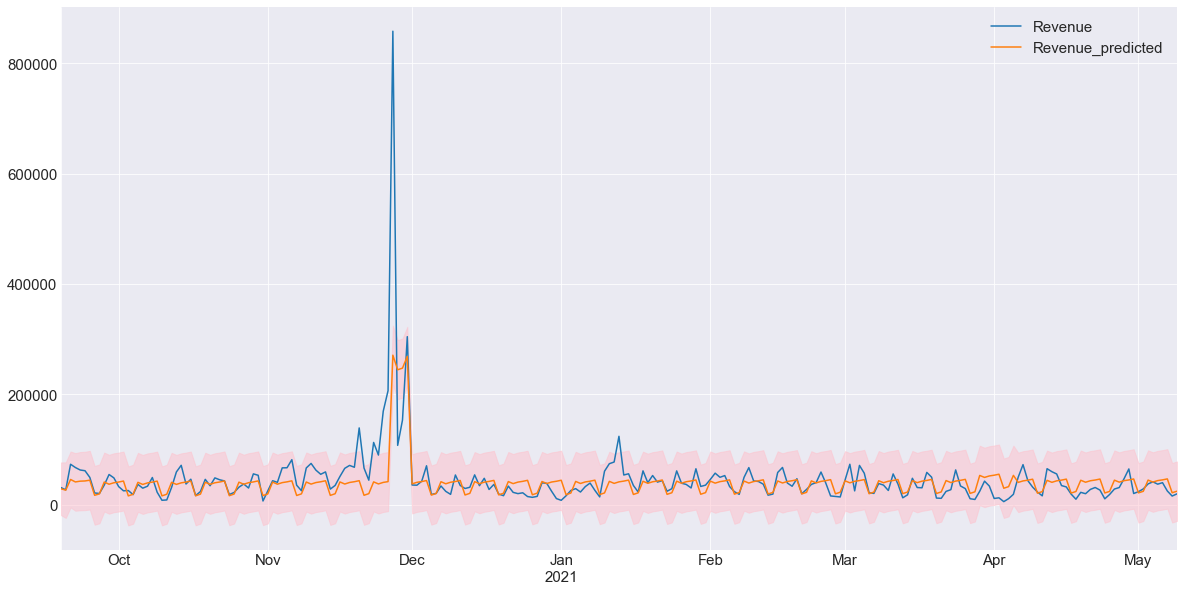

In [53]:
#Let's see how this model predict
data_test_predict = pd.concat([y_test, mean_forecast], axis= 1)
data_test_predict.plot()

confidence_intervals = forecast.conf_int()
plt.fill_between(confidence_intervals.index, confidence_intervals[confidence_intervals.columns[0]],
                 confidence_intervals[confidence_intervals.columns[1]], color='pink', alpha=0.5)

In [54]:
metric_rmse(data_test_predict, 'Revenue')

46211.325117016946

### Log Time Series Analysis

Let's try a SARIMAX applying log values

In [55]:
data_log = data_small.copy()
data_log['Revenue'] = np.log1p(data_log['Revenue'])

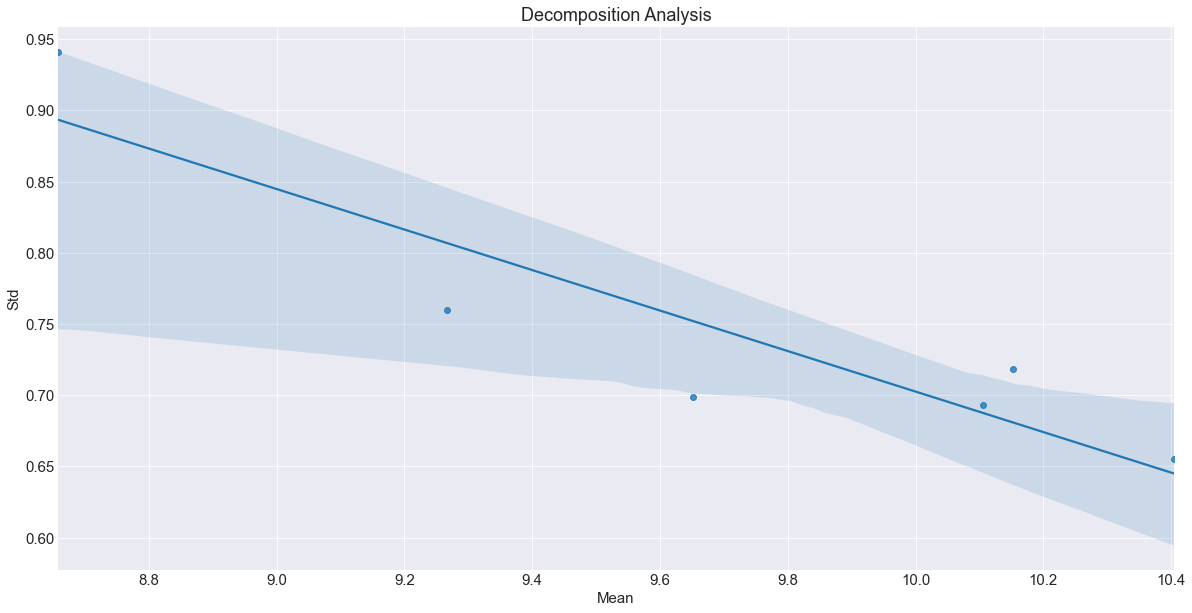

In [56]:
draw_decomposition(data_log);

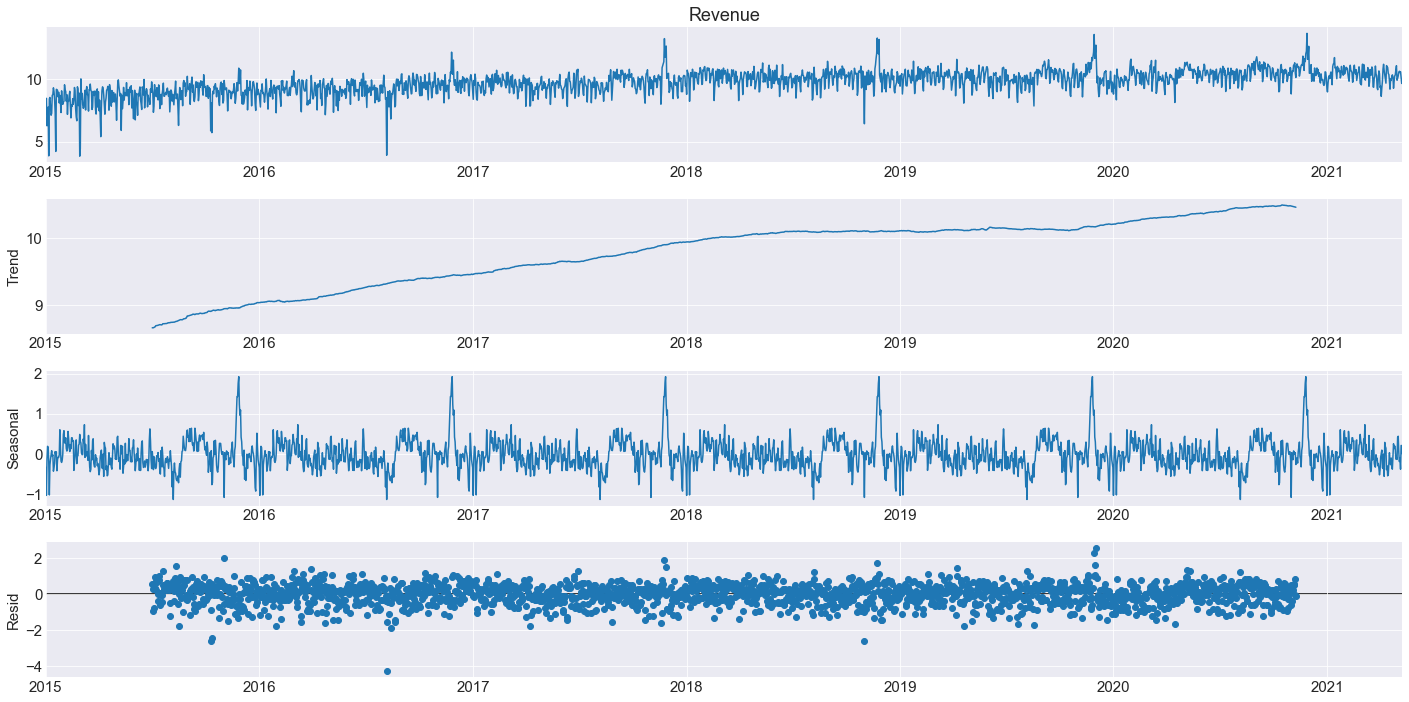

In [57]:
#A transformed data into Log makes Additivie model always
s_d_log = seasonal_decompose(data_log['Revenue'], period= 365, model= 'additive')
s_d_log.plot();

In [58]:
test_adf(data_log, 'Revenue')

** Augmented Dickey-Fuller Test **

T-test: -3.2585295231920943 > Confidence Interval[1%]: -3.4332050526159112 - Result: No Stationary
T-test: -3.2585295231920943 < Confidence Interval[5%]: -2.8628012970364574 - Result: Stationary
T-test: -3.2585295231920943 < Confidence Interval[10%]: -2.5674414457185817 - Result: Stationary

P-Value: 0.016837081011264177 < 0.05 - Result: Stationary


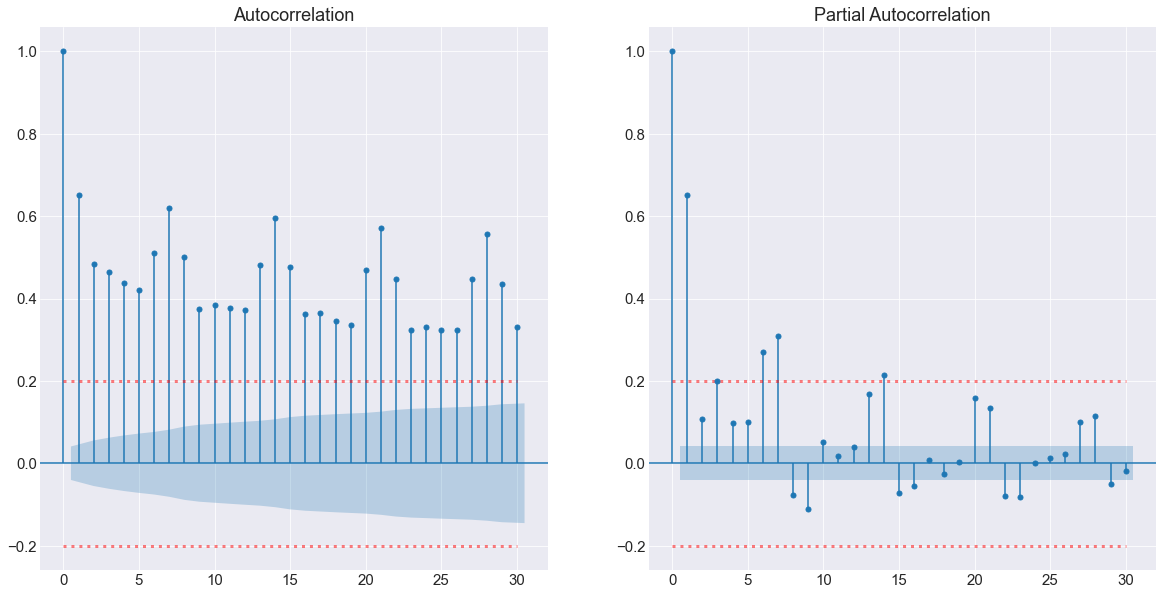

In [59]:
draw_autocorrelation(data_log, 30)

### Log Arima 

In [60]:
#Let's create the new exogenous variables
data_exogenous_log = get_exogenous_features(data_log)

In [61]:
#We have create a GridSearch in order to chose the better hyperparameters
#IMPORTANT, this task is quite intensive so we are saving a pickle for multiple iterations.
#ASSUMPTIONS, we would like to test with 365 season but we do not have enough memory
arima_params = {'p': [0, 4],
                'd': [0, 2], #Up to 1
                'q': [0, 4]}

sarima_params = {'P': [0, 4],
                 'D': [0, 2], #Up to 1
                 'Q': [0, 4],
                 'S': [7]}

#t = ['n','c','t','ct']
trend_params = ['c'] #We has test before and this is the best option always

In [62]:
X_train, y_train, X_test, y_test = sarimax_preparation_split(data_exogenous_log)

In [135]:
#This is SARIMAX Grid Search - This is SUPER time consuming
test_aic = gridsearch_sarimax(y_train, X_train[['Black_Friday', 'Easter', 'Covid']], arima_params, 
                             sarima_params, trend_params)

In [114]:
sorted(test_aic.items(), key=lambda x: x[1])

[((1, 0, 1, '-', 1, 1, 1, 7, '-', 'c'), 3320.406516444623),
 ((1, 0, 1, '-', 0, 1, 1, 7, '-', 'c'), 3323.3109745842253),
 ((1, 1, 1, '-', 1, 1, 1, 7, '-', 'n'), 3332.6859418947224),
 ((1, 1, 1, '-', 0, 1, 1, 7, '-', 'n'), 3332.8885650713582),
 ((1, 1, 1, '-', 1, 0, 1, 7, '-', 'n'), 3340.8814806513988),
 ((1, 0, 1, '-', 1, 1, 1, 7, '-', 'n'), 3342.179794025067),
 ((1, 0, 1, '-', 0, 1, 1, 7, '-', 'n'), 3346.1361716474744),
 ((1, 1, 1, '-', 1, 1, 1, 7, '-', 'c'), 3349.3833108654208),
 ((1, 1, 1, '-', 0, 1, 1, 7, '-', 'c'), 3355.038904194308),
 ((0, 1, 1, '-', 1, 1, 1, 7, '-', 'n'), 3383.677481856423),
 ((1, 0, 0, '-', 0, 1, 1, 7, '-', 'c'), 3390.0343341570524),
 ((1, 0, 0, '-', 1, 1, 1, 7, '-', 'c'), 3391.442454137199),
 ((0, 1, 1, '-', 0, 1, 1, 7, '-', 'n'), 3392.2567977852486),
 ((0, 1, 1, '-', 1, 1, 1, 7, '-', 'c'), 3394.0939876683497),
 ((0, 1, 1, '-', 1, 0, 1, 7, '-', 'n'), 3402.0663770164756),
 ((0, 1, 1, '-', 0, 1, 1, 7, '-', 'c'), 3406.341309546855),
 ((1, 0, 1, '-', 1, 0, 1, 7, '

In [136]:
sorted(test_aic.items(), key=lambda x: x[1])

[((2, 0, 3, '-', 3, 1, 1, 7, '-', 'c'), 3307.013646056871),
 ((2, 0, 3, '-', 2, 1, 1, 7, '-', 'c'), 3307.1207378884264),
 ((2, 0, 3, '-', 1, 1, 1, 7, '-', 'c'), 3309.531712114427),
 ((1, 0, 3, '-', 0, 1, 2, 7, '-', 'c'), 3309.9852863338347),
 ((2, 0, 3, '-', 0, 1, 2, 7, '-', 'c'), 3310.6594794164107),
 ((2, 0, 3, '-', 0, 1, 1, 7, '-', 'c'), 3311.984724136573),
 ((2, 0, 3, '-', 0, 1, 3, 7, '-', 'c'), 3312.7266018399405),
 ((1, 0, 2, '-', 1, 1, 2, 7, '-', 'c'), 3313.170741730653),
 ((2, 0, 2, '-', 1, 1, 1, 7, '-', 'c'), 3315.144119724566),
 ((2, 0, 2, '-', 0, 1, 2, 7, '-', 'c'), 3315.7912641921644),
 ((3, 0, 3, '-', 0, 1, 2, 7, '-', 'c'), 3316.1640697885414),
 ((2, 0, 2, '-', 2, 1, 1, 7, '-', 'c'), 3316.2674482811303),
 ((2, 0, 2, '-', 0, 1, 3, 7, '-', 'c'), 3316.4382111544846),
 ((2, 0, 2, '-', 0, 1, 1, 7, '-', 'c'), 3316.9075504999464),
 ((2, 0, 3, '-', 2, 1, 3, 7, '-', 'c'), 3317.0766373323645),
 ((3, 0, 2, '-', 0, 1, 2, 7, '-', 'c'), 3317.0780412184267),
 ((3, 0, 3, '-', 0, 1, 3, 7, 

In [63]:
#Fit considering best hyperparameters
model = SARIMAX(endog= y_train, exog= X_train[['Black_Friday', 'Easter', 'Covid']],
                order= (3, 0, 0), seasonal_order= (1, 0, 1, 7), trend= 'c')
result = model.fit()

In [64]:
#Predict taking full Train
forecast = result.get_prediction(start= '2015-01-01', end= '2020-09-18', 
                                 exog= X_train.loc['2015-01-01':'2020-09-18'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

Date
2015-01-01    -7.708851
2015-01-02     8.077196
2015-01-03     8.336212
2015-01-04     7.116391
2015-01-05     7.087023
                ...    
2020-09-14    10.856361
2020-09-15    10.987634
2020-09-16    10.996542
2020-09-17    11.258314
2020-09-18    10.936750
Freq: D, Name: Revenue_predicted, Length: 2088, dtype: float64

<AxesSubplot:xlabel='Date'>

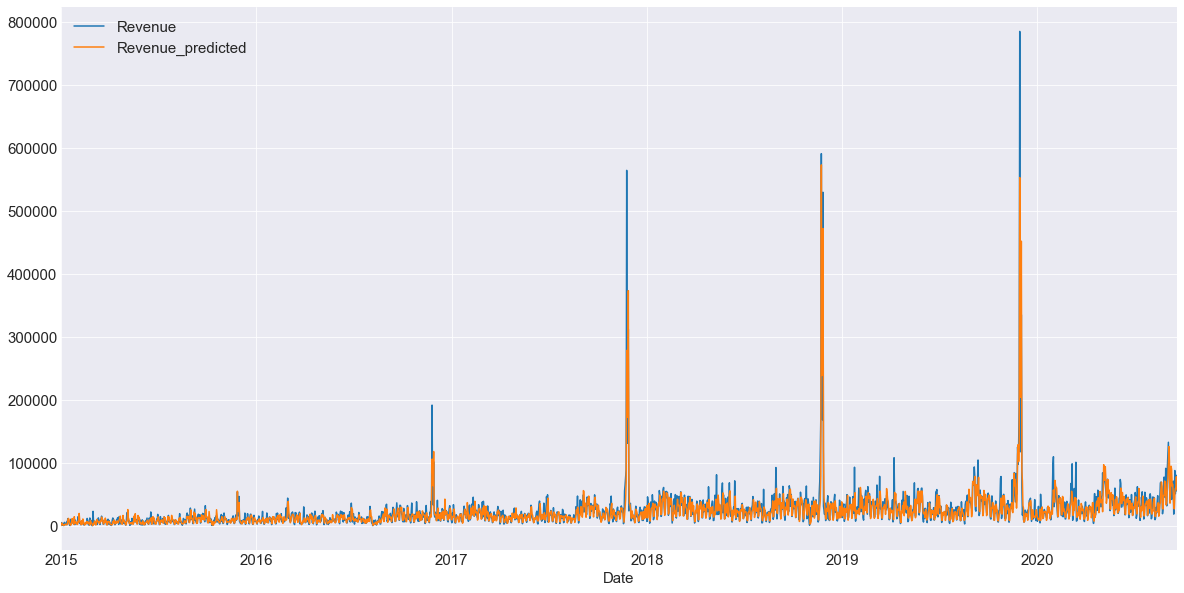

In [65]:
data_train_predict = pd.concat([np.expm1(y_train), np.expm1(mean_forecast)], axis= 1)
data_train_predict.plot()

<AxesSubplot:xlabel='Date'>

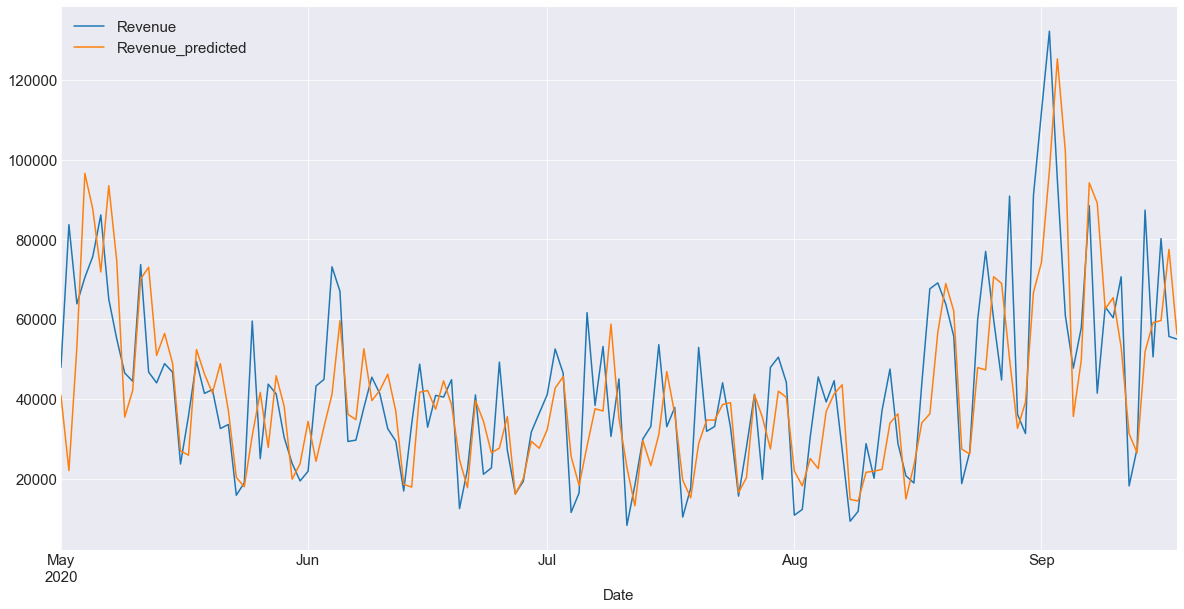

In [66]:
#Let's see a subset of the Time Series
data_train_predict.loc['2020-05-01':'2020-09-18'].plot()

In [67]:
metric_rmse(data_train_predict, 'Revenue')

15415.998910351713

Residuals
count    2088.000000
mean     1182.400351
std     15374.269249
min   -193083.097191
25%     -4091.527013
50%       319.354482
75%      5524.295690
max    285800.839272

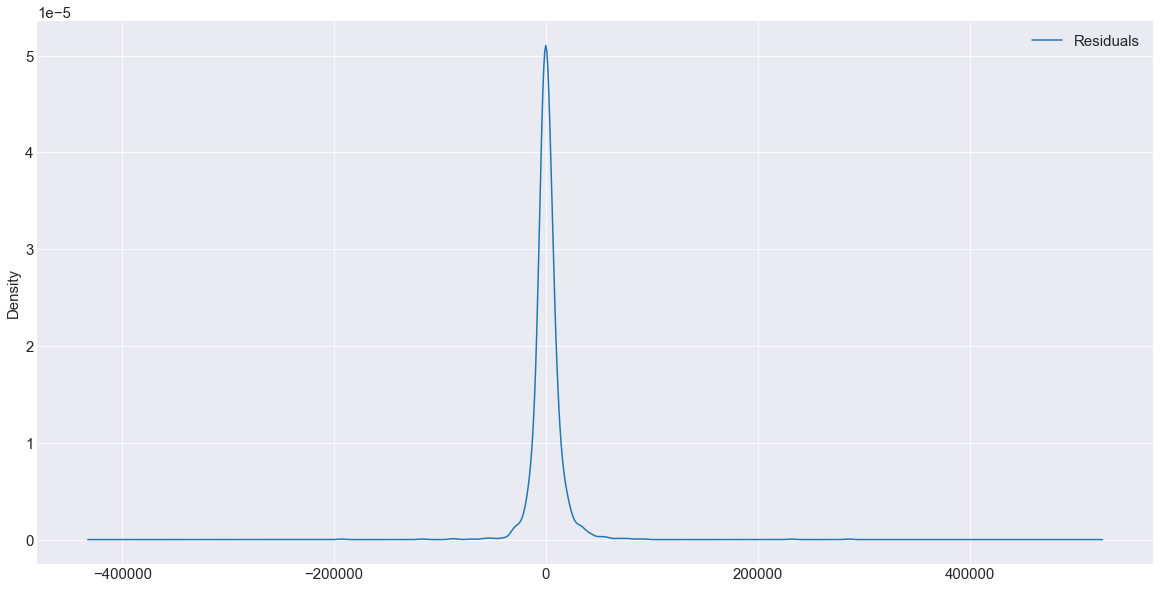

In [68]:
#Residual Analysis
data_residual = pd.DataFrame()
#Real - Predict
data_residual['Residuals'] = \
    data_train_predict[data_train_predict.columns[0]] - data_train_predict[data_train_predict.columns[1]]
data_residual.plot(kind='kde')

#Let's see the mean if it is in the center or show kind of skew
data_residual.describe()

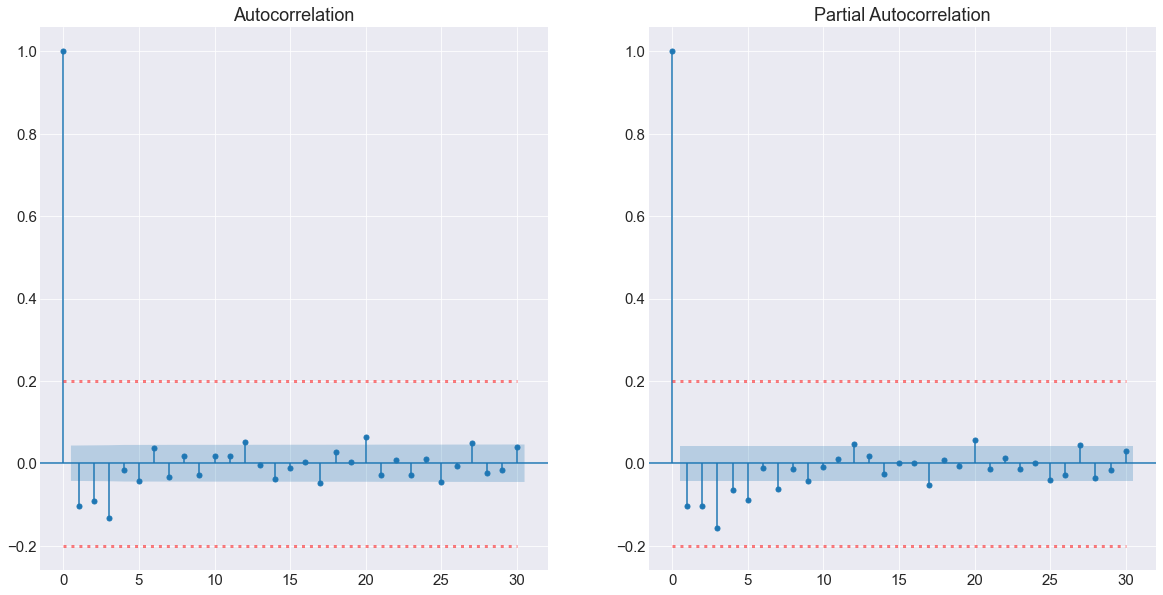

In [69]:
draw_autocorrelation(pd.DataFrame(result.resid), 30)

In [70]:
#Augmented Dickey-Fuller test
residual = pd.DataFrame(result.resid)
residual.dropna(inplace= True)
test_adf(residual, residual.columns[0])

** Augmented Dickey-Fuller Test **

T-test: -13.073413614687489 < Confidence Interval[1%]: -3.433526838083527 - Result: Stationary
T-test: -13.073413614687489 < Confidence Interval[5%]: -2.8629433788300744 - Result: Stationary
T-test: -13.073413614687489 < Confidence Interval[10%]: -2.567517095065801 - Result: Stationary

P-Value: 1.936016479205862e-24 < 0.05 - Result: Stationary


In [71]:
#Forecast vs. Test

#Predict taking full Test
forecast = result.get_prediction(start= '2020-09-19', end= '2021-05-09', 
                                 exog= X_test.loc['2020-09-19':'2021-05-09'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

2020-09-19    10.208612
2020-09-20    10.360401
2020-09-21    10.987600
2020-09-22    10.855781
2020-09-23    10.985454
                ...    
2021-05-05     8.963357
2021-05-06     8.946031
2021-05-07     8.890697
2021-05-08     8.322201
2021-05-09     8.450233
Freq: D, Name: Revenue_predicted, Length: 233, dtype: float64

<AxesSubplot:>

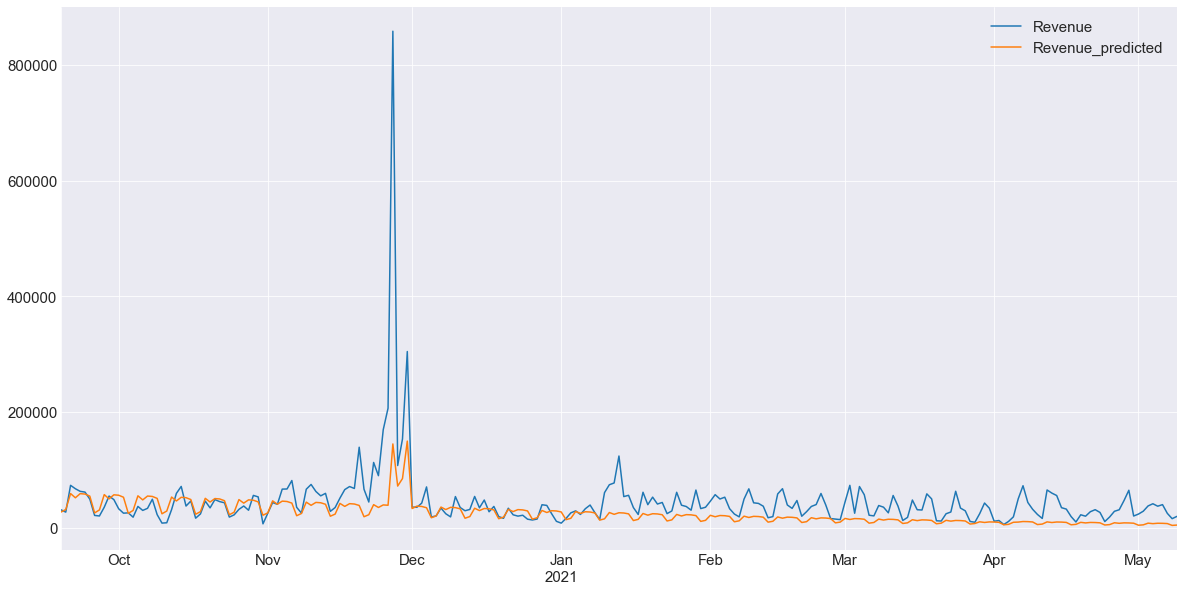

In [76]:
#Let's see how this model predict - We cannot include intervals because forecast got diluted
data_test_predict = pd.concat([np.expm1(y_test), np.expm1(mean_forecast)], axis= 1)
data_test_predict.plot()

#confidence_intervals = forecast.conf_int()
#confidence_intervals = np.expm1(confidence_intervals)
#plt.fill_between(confidence_intervals.index, confidence_intervals[confidence_intervals.columns[0]],
#                 confidence_intervals[confidence_intervals.columns[1]], color='pink', alpha=0.5)

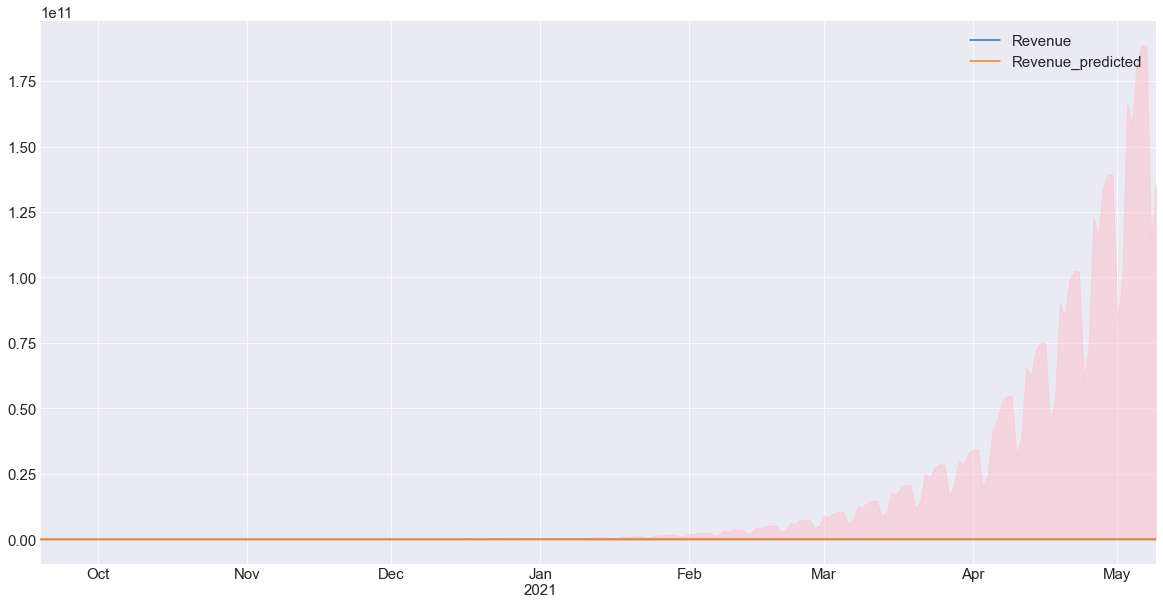

In [77]:
#Let's see how this model predict - Let's see the chart with the confidence intervals
data_test_predict = pd.concat([np.expm1(y_test), np.expm1(mean_forecast)], axis= 1)
data_test_predict.plot()

confidence_intervals = forecast.conf_int()
confidence_intervals = np.expm1(confidence_intervals)
plt.fill_between(confidence_intervals.index, confidence_intervals[confidence_intervals.columns[0]],
                 confidence_intervals[confidence_intervals.columns[1]], color='pink', alpha=0.5)

In [78]:
metric_rmse(data_test_predict, 'Revenue')

55824.90021286797

### Square Time Series Analysis

Let's try a SARIMAX applying sqrt values

In [79]:
data_sqrt = data_small.copy()
data_sqrt['Revenue'] = np.sqrt(data_sqrt['Revenue'])

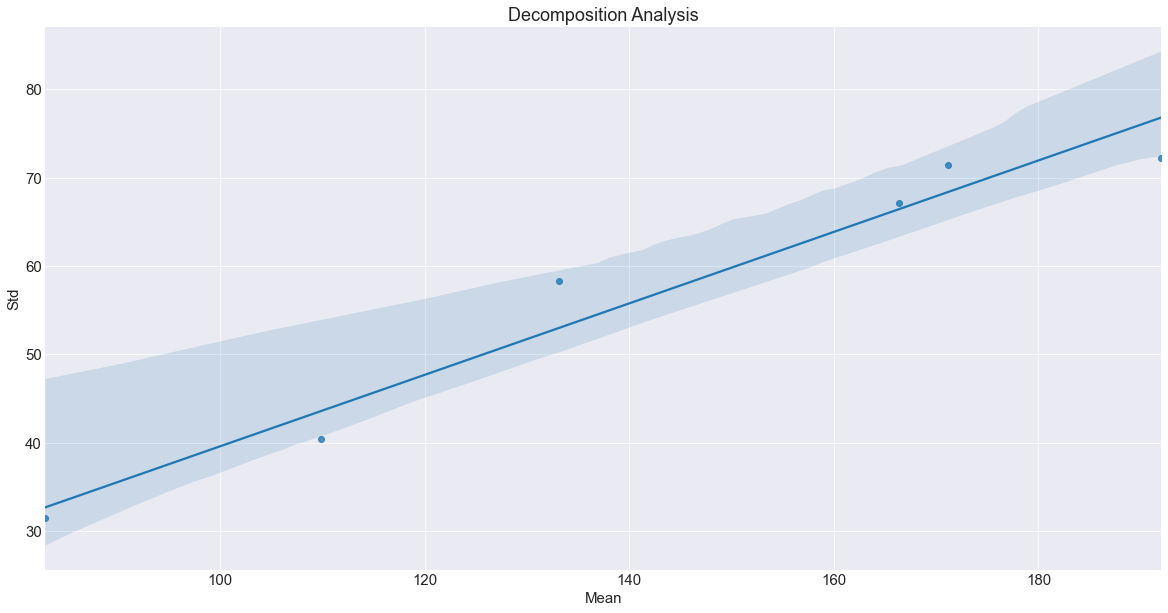

In [80]:
draw_decomposition(data_sqrt);

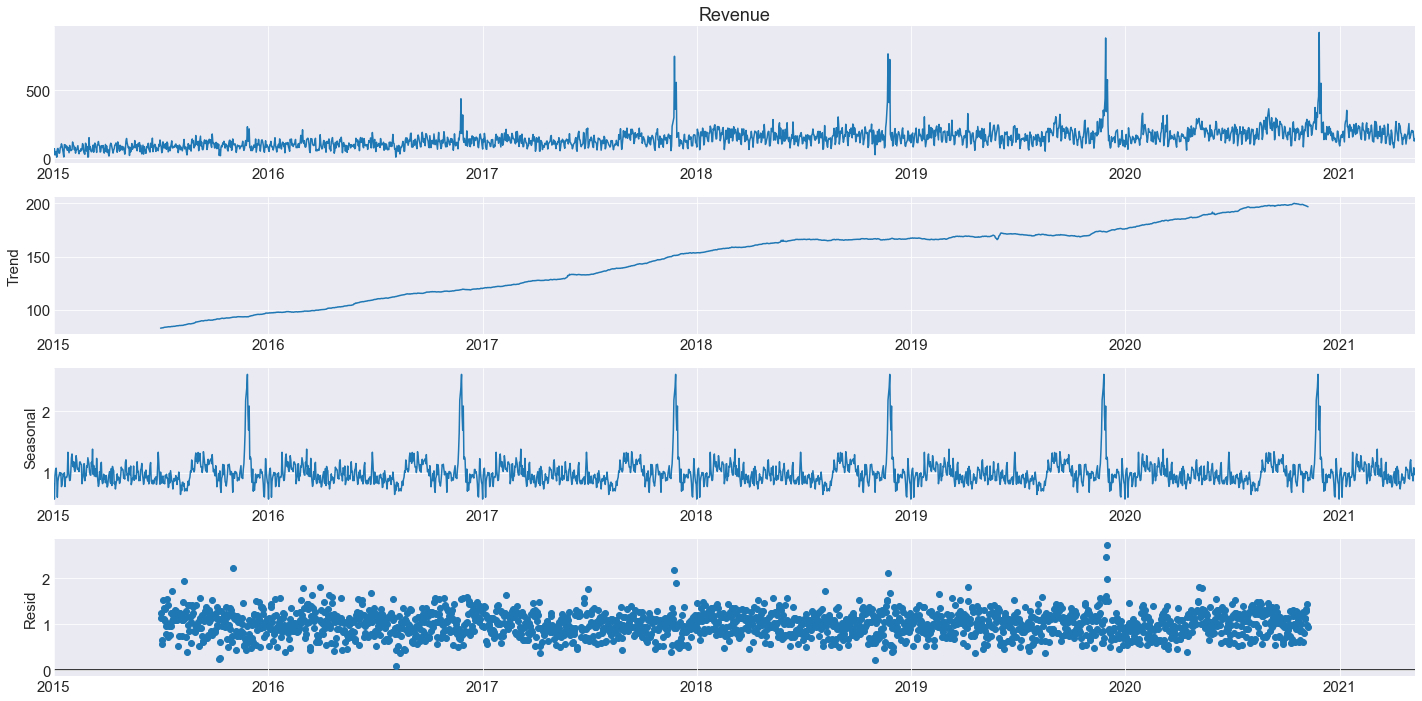

In [81]:
s_d_sqrt = seasonal_decompose(data_sqrt['Revenue'], period= 365, model= 'multiplicative')
s_d_sqrt.plot();

In [82]:
test_adf(data_sqrt, 'Revenue')

** Augmented Dickey-Fuller Test **

T-test: -4.1645727299394535 < Confidence Interval[1%]: -3.4332050526159112 - Result: Stationary
T-test: -4.1645727299394535 < Confidence Interval[5%]: -2.8628012970364574 - Result: Stationary
T-test: -4.1645727299394535 < Confidence Interval[10%]: -2.5674414457185817 - Result: Stationary

P-Value: 0.000756033819549469 < 0.05 - Result: Stationary


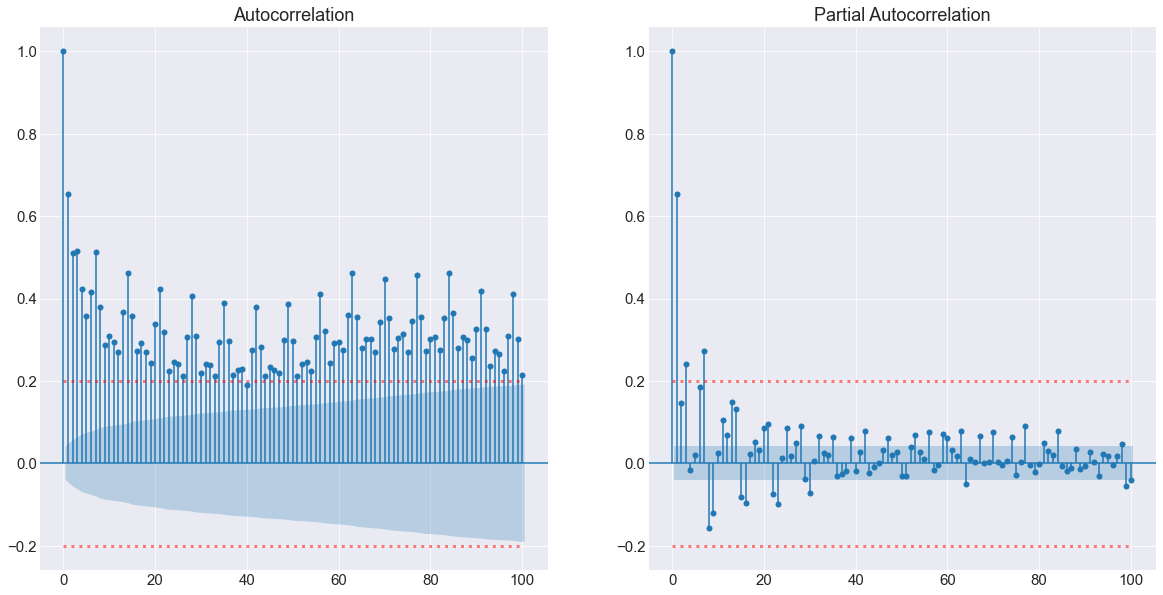

In [83]:
draw_autocorrelation(data_sqrt, 100)

### Sqrt Arima 

In [84]:
#Let's create the new exogenous variables
data_exogenous_sqrt = get_exogenous_features(data_sqrt)

In [85]:
#We have create a GridSearch in order to chose the better hyperparameters
#IMPORTANT, this task is quite intensive so we are saving a pickle for multiple iterations.
#ASSUMPTIONS, we would like to test with 365 season but we do not have enough memory
arima_params = {'p': [0, 4],
                'd': [0, 2], #Up to 1
                'q': [0, 4]}

sarima_params = {'P': [0, 4],
                 'D': [0, 2], #Up to 1
                 'Q': [0, 4],
                 'S': [7]}

#t = ['n','c','t','ct']
trend_params = ['c'] #We has test before and this is the best option always

In [86]:
X_train, y_train, X_test, y_test = sarimax_preparation_split(data_exogenous_sqrt)

In [ ]:
#This is SARIMAX Grid Search - This is SUPER time consuming
test_aic = gridsearch_sarimax(y_train, X_train[['Black_Friday', 'Easter', 'Covid']], arima_params, 
                             sarima_params, trend_params)

In [119]:
sorted(test_aic.items(), key=lambda x: x[1])

[((1, 0, 1, '-', 0, 1, 1, 7, '-', 'c'), 20716.71392250466),
 ((1, 0, 1, '-', 1, 1, 1, 7, '-', 'c'), 20716.92141933),
 ((1, 0, 1, '-', 0, 1, 1, 7, '-', 'n'), 20734.259905031497),
 ((1, 0, 1, '-', 1, 1, 1, 7, '-', 'n'), 20736.423939857275),
 ((1, 1, 1, '-', 0, 1, 1, 7, '-', 'n'), 20756.70747803355),
 ((1, 1, 1, '-', 1, 1, 1, 7, '-', 'n'), 20763.023790883817),
 ((1, 0, 0, '-', 0, 1, 1, 7, '-', 'c'), 20772.97049405372),
 ((1, 0, 0, '-', 1, 1, 1, 7, '-', 'n'), 20804.053614725108),
 ((1, 0, 0, '-', 0, 1, 1, 7, '-', 'n'), 20808.70342985497),
 ((1, 0, 0, '-', 1, 1, 1, 7, '-', 'c'), 20809.66505232566),
 ((0, 1, 1, '-', 1, 1, 1, 7, '-', 'n'), 20834.17159513651),
 ((0, 1, 1, '-', 0, 1, 1, 7, '-', 'n'), 20836.957638968266),
 ((1, 1, 1, '-', 1, 0, 1, 7, '-', 'n'), 20858.498377415446),
 ((1, 1, 1, '-', 1, 1, 1, 7, '-', 'c'), 20865.67815326595),
 ((1, 1, 1, '-', 0, 1, 1, 7, '-', 'c'), 20894.448387451026),
 ((0, 0, 1, '-', 1, 1, 1, 7, '-', 'c'), 20898.56875778031),
 ((0, 1, 1, '-', 1, 1, 1, 7, '-', 'c

In [20]:
test_aic = pickle_to_object(pickle_file)

In [21]:
sorted(test_aic.items(), key=lambda x: x[1])

[((0, 1, 2, '-', 2, 1, 1, 7, '-', 'c'), 129.7265275818368),
 ((1, 0, 2, '-', 1, 1, 2, 7, '-', 'c'), 20706.73600442587),
 ((1, 0, 3, '-', 2, 1, 2, 7, '-', 'c'), 20709.62117492332),
 ((1, 0, 3, '-', 3, 1, 2, 7, '-', 'c'), 20709.996951281373),
 ((1, 0, 3, '-', 1, 1, 3, 7, '-', 'c'), 20710.348807508264),
 ((1, 0, 3, '-', 3, 1, 3, 7, '-', 'c'), 20711.12423214681),
 ((1, 0, 3, '-', 2, 1, 3, 7, '-', 'c'), 20711.196785933415),
 ((1, 0, 3, '-', 1, 1, 2, 7, '-', 'c'), 20711.43590003671),
 ((1, 0, 1, '-', 0, 1, 1, 7, '-', 'c'), 20716.71392250466),
 ((1, 0, 1, '-', 1, 1, 1, 7, '-', 'c'), 20716.92141933),
 ((1, 0, 1, '-', 1, 1, 2, 7, '-', 'c'), 20717.133011600203),
 ((1, 0, 1, '-', 2, 1, 2, 7, '-', 'c'), 20717.54000169415),
 ((1, 0, 1, '-', 2, 1, 3, 7, '-', 'c'), 20718.61215734003),
 ((1, 0, 1, '-', 0, 1, 3, 7, '-', 'c'), 20719.691497262622),
 ((1, 0, 1, '-', 1, 1, 3, 7, '-', 'c'), 20720.11671068731),
 ((1, 0, 1, '-', 3, 1, 2, 7, '-', 'c'), 20720.45145494505),
 ((1, 0, 1, '-', 3, 1, 3, 7, '-', 'c')

In [87]:
#Fit considering best hyperparameters
model = SARIMAX(endog= y_train, exog= X_train[['Black_Friday', 'Easter', 'Covid']],
                order= (1, 0, 2), seasonal_order= (1, 1, 2, 7), trend= 'c')
result = model.fit()

In [88]:
#Predict taking full Train
forecast = result.get_prediction(start= '2015-01-01', end= '2020-09-18', 
                                 exog= X_train.loc['2015-01-01':'2020-09-18'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

Date
2015-01-01      0.383327
2015-01-02      0.439084
2015-01-03      0.479207
2015-01-04      0.459059
2015-01-05      0.456926
                 ...    
2020-09-14    229.957211
2020-09-15    245.924583
2020-09-16    230.615159
2020-09-17    258.166237
2020-09-18    234.922997
Freq: D, Name: Revenue_predicted, Length: 2088, dtype: float64

<AxesSubplot:xlabel='Date'>

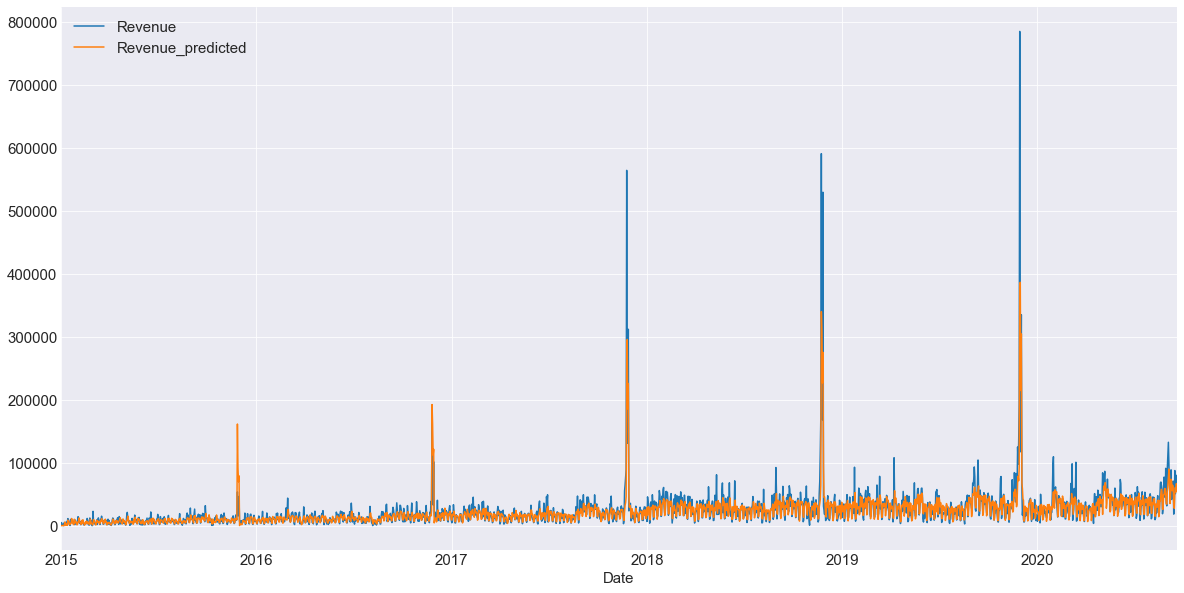

In [89]:
data_train_predict = pd.concat([pd.DataFrame(y_train).apply(lambda x: x ** 2), 
                                pd.DataFrame(mean_forecast).apply(lambda x: x ** 2)], axis= 1)
data_train_predict.plot()

<AxesSubplot:xlabel='Date'>

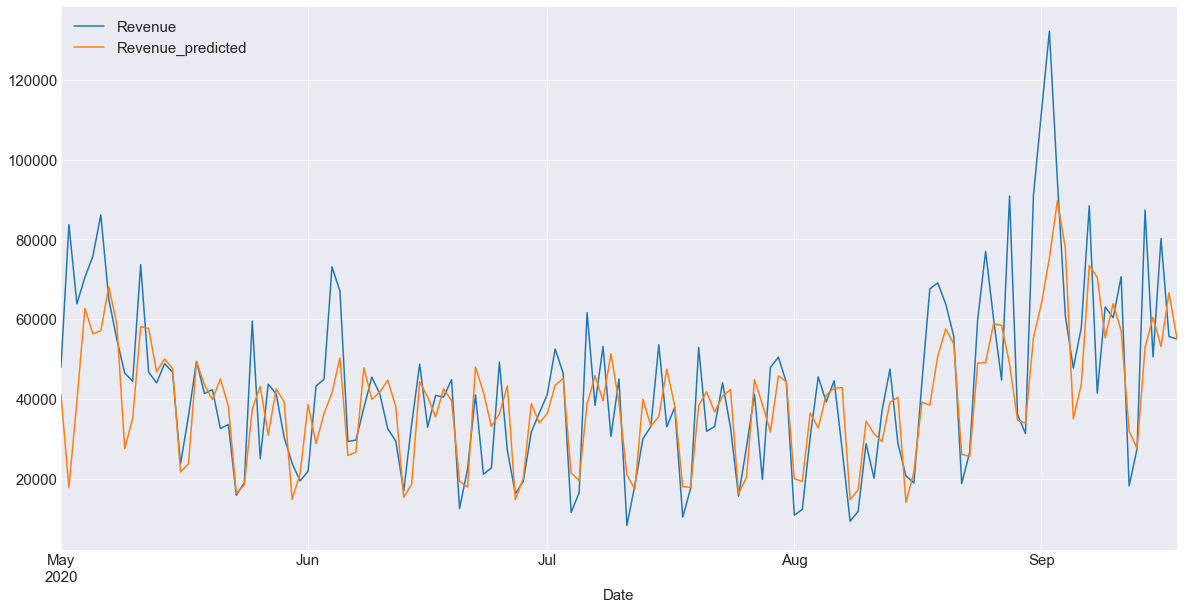

In [90]:
#Let's see a subset of the Time Series
data_train_predict.loc['2020-05-01':'2020-09-18'].plot()

In [91]:
metric_rmse(data_train_predict, 'Revenue')

19621.188643040987

Residuals
count    2088.000000
mean     1232.522989
std     19587.130315
min   -269009.237043
25%     -4103.613928
50%       -71.370170
75%      4893.141589
max    404720.121675

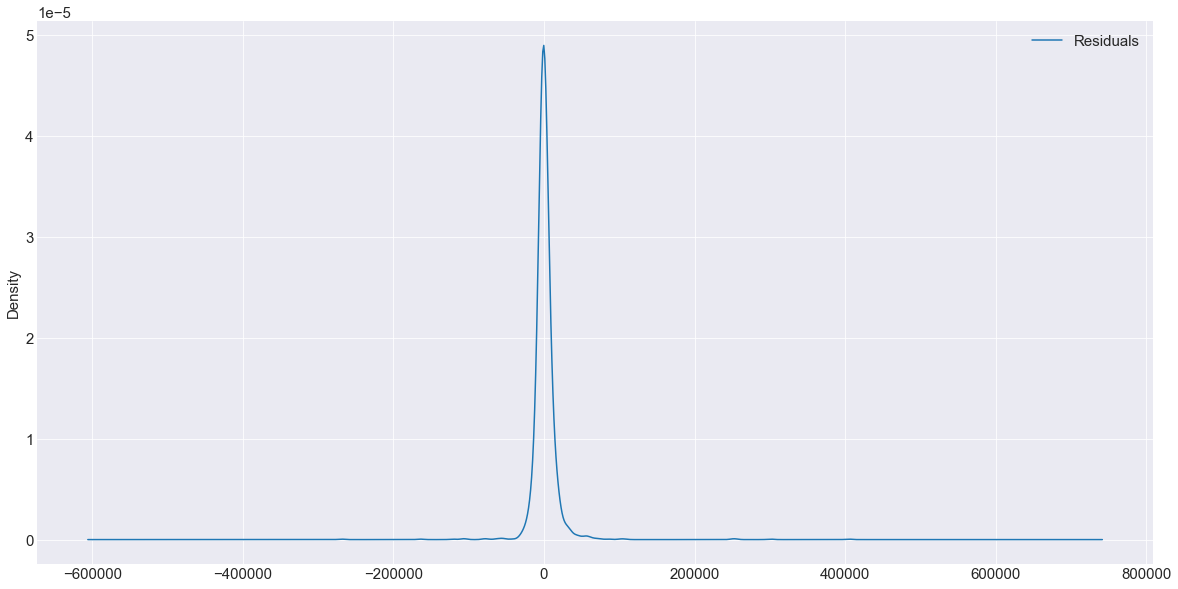

In [92]:
#Residual Analysis
data_residual = pd.DataFrame()
#Real - Predict
data_residual['Residuals'] = \
    data_train_predict[data_train_predict.columns[0]] - data_train_predict[data_train_predict.columns[1]]
data_residual.plot(kind='kde')

#Let's see the mean if it is in the center or show kind of skew
data_residual.describe()

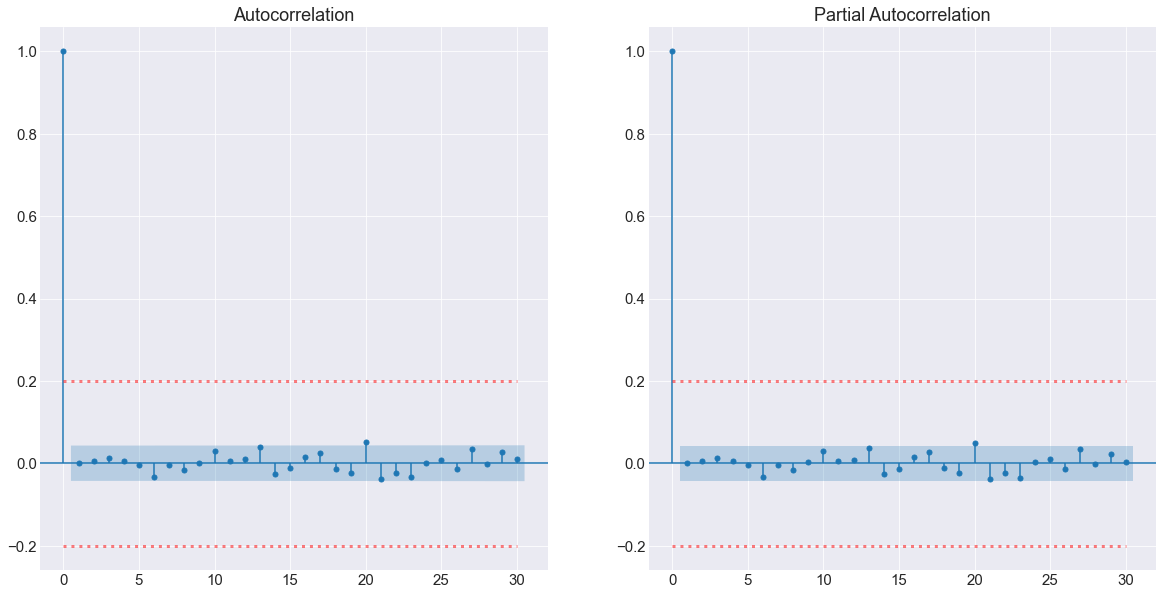

In [93]:
draw_autocorrelation(pd.DataFrame(result.resid), 30)

In [94]:
#Augmented Dickey-Fuller test
residual = pd.DataFrame(result.resid)
residual.dropna(inplace= True)
test_adf(residual, residual.columns[0])

** Augmented Dickey-Fuller Test **

T-test: -45.69568884529083 < Confidence Interval[1%]: -3.4334872119603324 - Result: Stationary
T-test: -45.69568884529083 < Confidence Interval[5%]: -2.862925883058088 - Result: Stationary
T-test: -45.69568884529083 < Confidence Interval[10%]: -2.567507779564507 - Result: Stationary

P-Value: 0.0 < 0.05 - Result: Stationary


In [95]:
#Forecast vs. Test

#Predict taking full Test
forecast = result.get_prediction(start= '2020-09-19', end= '2021-05-09', 
                                 exog= X_test.loc['2020-09-19':'2021-05-09'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

2020-09-19    164.428558
2020-09-20    174.045927
2020-09-21    234.360490
2020-09-22    223.314736
2020-09-23    228.726663
                 ...    
2021-05-05    230.972416
2021-05-06    235.562066
2021-05-07    231.545778
2021-05-08    160.948584
2021-05-09    172.645094
Freq: D, Name: Revenue_predicted, Length: 233, dtype: float64

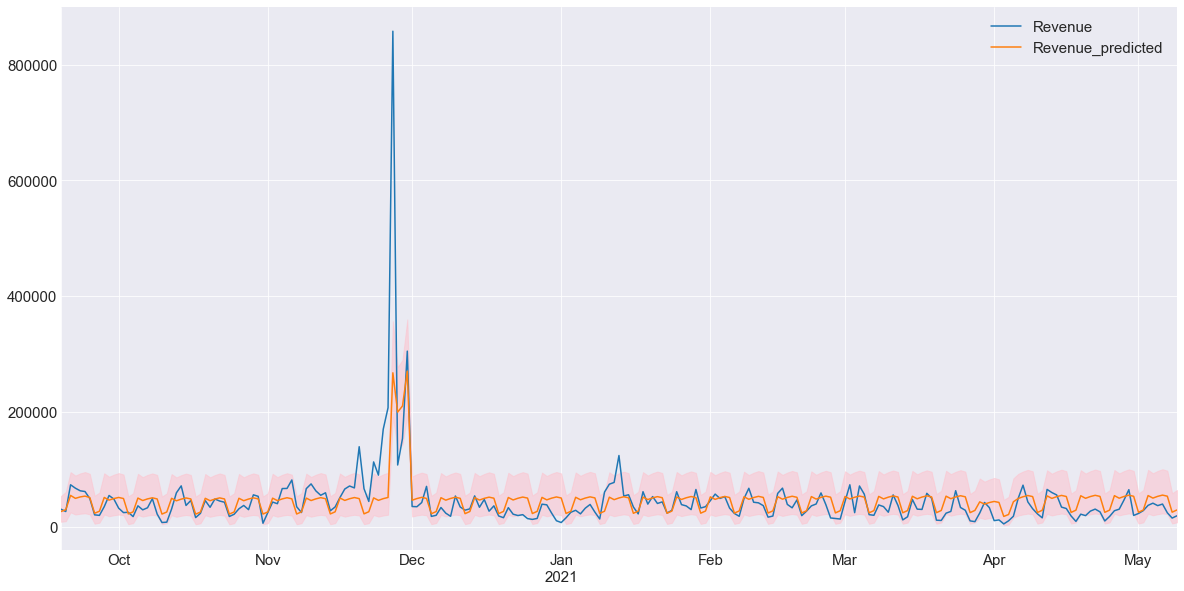

In [96]:
#Let's see how this model predict
data_test_predict = pd.concat([pd.DataFrame(y_test).apply(lambda x: x ** 2), 
                               pd.DataFrame(mean_forecast).apply(lambda x: x ** 2)], axis= 1)
data_test_predict.plot()

confidence_intervals = forecast.conf_int()
confidence_intervals = confidence_intervals.apply(lambda x: x ** 2)
plt.fill_between(confidence_intervals.index, confidence_intervals[confidence_intervals.columns[0]],
                 confidence_intervals[confidence_intervals.columns[1]], color='pink', alpha=0.5)

In [97]:
metric_rmse(data_test_predict, 'Revenue')

45356.557148849846

### Triple Exponential Smoothing

Now, we are going to apply another classical Time Series Forecast method called Triple Exponential Smoothing

In [162]:
#We have create a GridSearch in order to chose the better hyperparameters
#IMPORTANT, this task is quite intensive so we are saving a pickle for multiple iterations.

#Parameters for fit
trend_params = ['add','mul']
damped_params = [True, False]
seasonal_params = ['add','mul']
period_params = [49]
#Parameters for prediction
box_cox = [True, False]
bias_params = [True, False]

In [98]:
X_train, y_train, X_test, y_test = sarimax_preparation_split(data_small)

In [69]:
test_rmse = gridsearch_tes(y_train, trend_params, damped_params, seasonal_params, period_params, box_cox, bias_params)

In [153]:
sorted(test_rmse.items(), key=lambda x: x[1])

[(('mul', False, 'mul', 49, '-', True, True), 26318.88540473293),
 (('add', True, 'mul', 49, '-', True, True), 26319.98468729066),
 (('add', False, 'mul', 49, '-', True, True), 26324.22576135944),
 (('mul', True, 'mul', 49, '-', True, True), 26355.65336118144),
 (('add', False, 'mul', 49, '-', True, False), 26371.676168562444),
 (('add', True, 'mul', 49, '-', True, False), 26373.30689833187),
 (('mul', False, 'mul', 49, '-', True, False), 26382.213201091752),
 (('mul', True, 'mul', 49, '-', True, False), 26407.72175784717),
 (('mul', True, 'add', 49, '-', True, True), 26766.289881068253),
 (('mul', False, 'add', 49, '-', True, True), 26768.168970195256),
 (('add', False, 'add', 49, '-', True, True), 26771.566766244807),
 (('add', True, 'add', 49, '-', True, True), 26773.6037399587),
 (('mul', False, 'mul', 35, '-', True, True), 26784.826834092364),
 (('add', True, 'mul', 35, '-', True, True), 26808.374850540516),
 (('add', False, 'mul', 35, '-', True, True), 26809.621282793334),
 (('mu

In [99]:
#Fit considering best hyperparameters
model = ExponentialSmoothing(endog= y_train, trend= 'mul', damped= False, seasonal= 'mul', seasonal_periods= 49)
result = model.fit(optimized= True, use_boxcox= True, remove_bias= True)

In [100]:
#Predict taking full Train
forecast = result.predict(start= '2015-01-01', end= '2020-09-18')
forecast.rename(f'{y_train.name}_predicted', inplace= True)

Date
2015-01-01     5003.598206
2015-01-02     4676.751201
2015-01-03     3378.231495
2015-01-04     3094.066773
2015-01-05     4231.473709
                  ...     
2020-09-14    67871.585224
2020-09-15    65054.557271
2020-09-16    58179.091239
2020-09-17    74981.072375
2020-09-18    70012.312567
Freq: D, Name: Revenue_predicted, Length: 2088, dtype: float64

<AxesSubplot:xlabel='Date'>

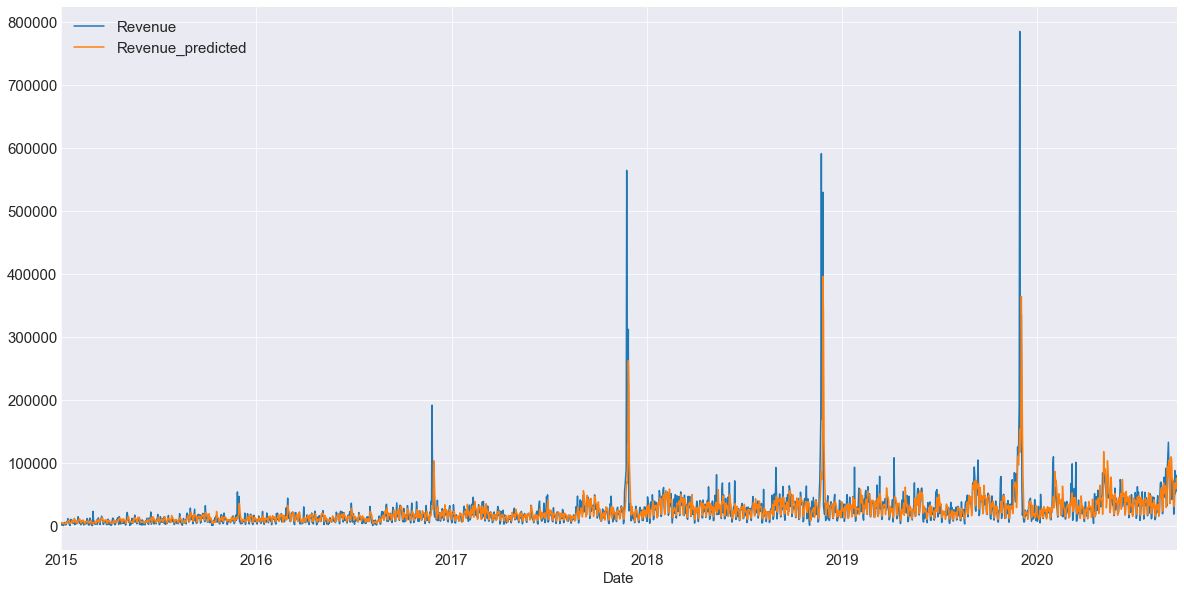

In [101]:
data_train_predict = pd.concat([y_train, forecast], axis= 1)
data_train_predict.plot()

<AxesSubplot:xlabel='Date'>

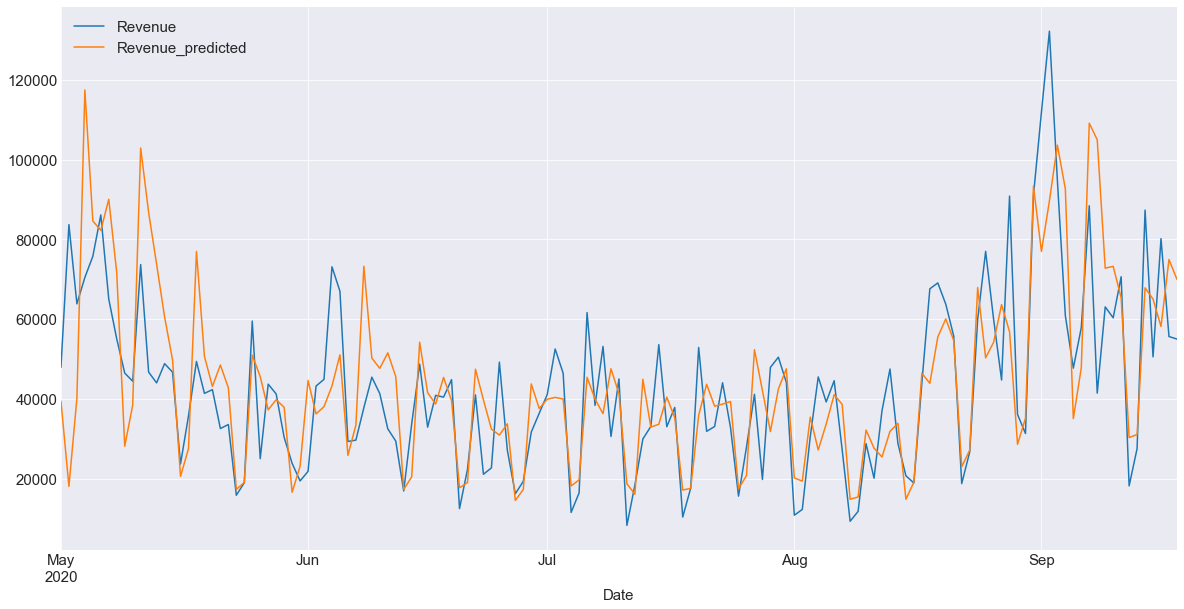

In [102]:
#Let's see a subset of the Time Series
data_train_predict.loc['2020-05-01':'2020-09-18'].plot()

In [103]:
metric_rmse(data_train_predict, 'Revenue')

26318.88540473293

Residuals
count  2.088000e+03
mean   1.299776e-12
std    2.632519e+04
min   -3.023694e+05
25%   -5.560762e+03
50%   -1.477460e+03
75%    3.426474e+03
max    6.311469e+05

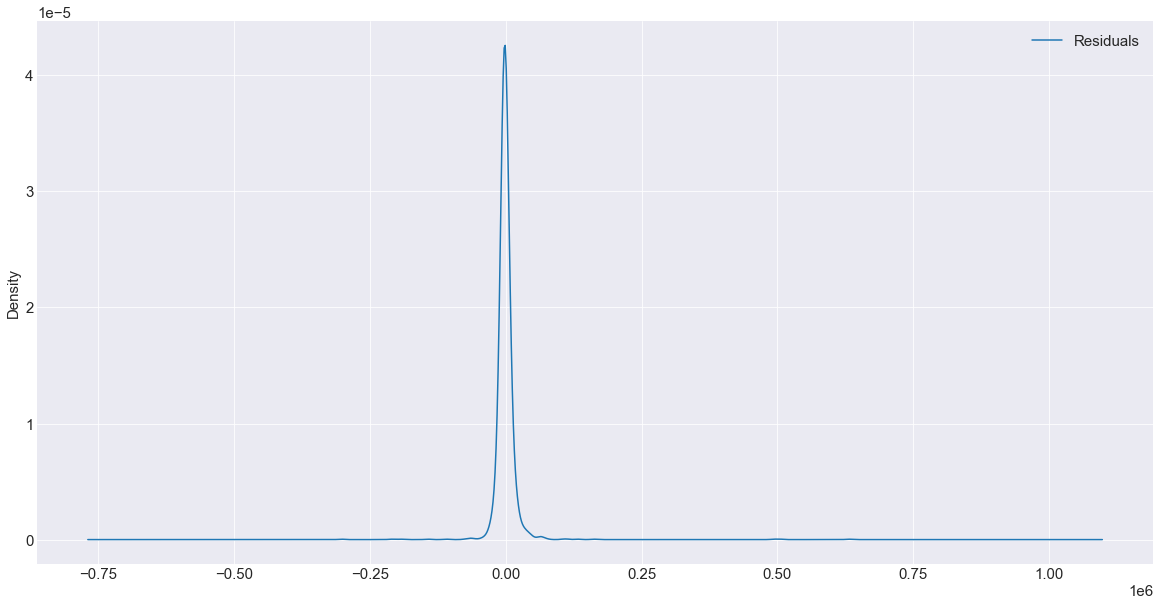

In [104]:
#Residual Analysis
data_residual = pd.DataFrame()
#Real - Predict
data_residual['Residuals'] = \
    data_train_predict[data_train_predict.columns[0]] - data_train_predict[data_train_predict.columns[1]]
data_residual.plot(kind='kde')

#Let's see the mean if it is in the center or show kind of skew
data_residual.describe()

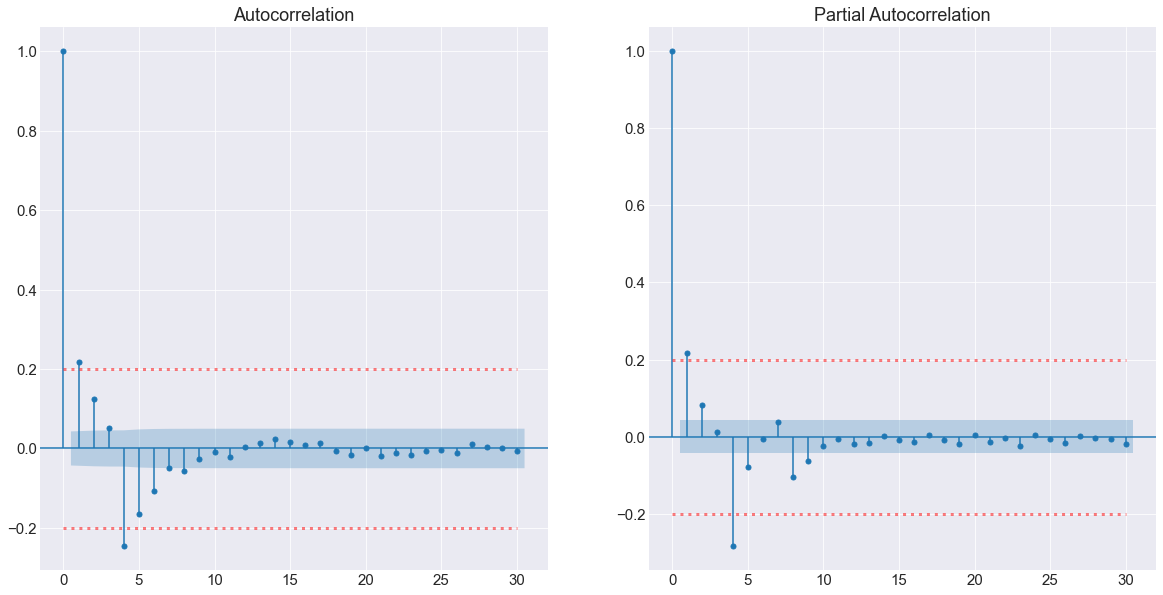

In [105]:
draw_autocorrelation(pd.DataFrame(result.resid), 30)

In [106]:
#Augmented Dickey-Fuller test
residual = pd.DataFrame(result.resid)
residual.dropna(inplace= True)
test_adf(residual, residual.columns[0])

** Augmented Dickey-Fuller Test **

T-test: -19.180829942143056 < Confidence Interval[1%]: -3.433499298918619 - Result: Stationary
T-test: -19.180829942143056 < Confidence Interval[5%]: -2.8629312197305192 - Result: Stationary
T-test: -19.180829942143056 < Confidence Interval[10%]: -2.56751062103432 - Result: Stationary

P-Value: 0.0 < 0.05 - Result: Stationary


In [107]:
#Forecast vs. Test

#Predict taking full Test
forecast = result.predict(start= '2020-09-19', end= '2021-05-09')
forecast.rename(f'{y_train.name}_predicted', inplace= True)

2020-09-19    27131.535950
2020-09-20    31408.909655
2020-09-21    68021.872054
2020-09-22    53342.780134
2020-09-23    53206.552635
                  ...     
2021-05-05    30474.248053
2021-05-06    30119.693288
2021-05-07    27864.347976
2021-05-08    13316.307160
2021-05-09    15502.747089
Freq: D, Name: Revenue_predicted, Length: 233, dtype: float64

<AxesSubplot:>

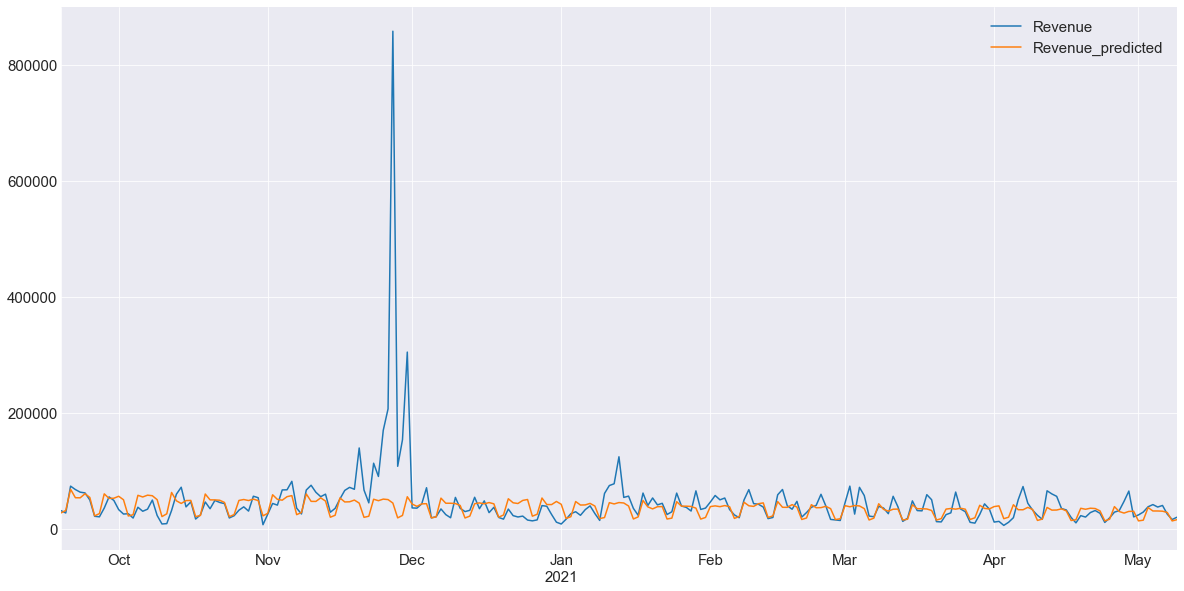

In [108]:
#Let's see how this model predict
data_test_predict = pd.concat([y_test, forecast], axis= 1)
data_test_predict.plot()

In [109]:
metric_rmse(data_test_predict, 'Revenue')

60830.33415477514

## Machine Learning Models for Time Series

Now it is moment for applying Machine Learning Models after checking how perfoms Classical Methods as SARIMAX and Triple Exponential Smoothing.

Our target variable will be lagged Revenue, we have choosen 8 lags and we are going to use the Date features as categorical and finally, we will continue using Easter, Black Friday and Covid.

In [57]:
#Create the lag features
lags = [1, 2, 3, 4, 5, 6, 7, 364]
data_lag = get_lag_features(data_small, 'Revenue', lags)

In [58]:
#Temporary DataFrame for checking correlation
data_temp = data_lag.copy()
data_temp['Revenue'] = data_small['Revenue']

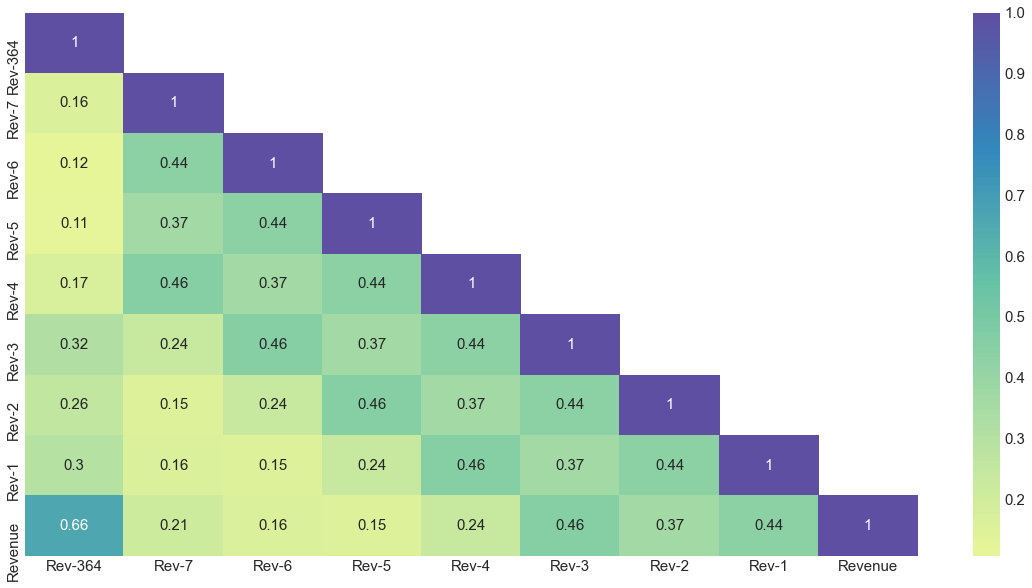

In [59]:
#Let's check the correlation
corr_matrix(data_temp)

In [60]:
#Create Seasonal Features - I am transforming as if they were non-numeric variables
data_seasonal = pd.get_dummies(data_small[['Year', 'Month', 'Day']].astype('str'))
#Create Exogenus Features
data_exogenous = get_exogenous_features(data_small)[['Black_Friday', 'Easter', 'Covid']]
#Create the model to Train and Test with the different Machine Learning models
data_model = pd.concat([data_seasonal, data_exogenous, data_lag, data_small['Revenue']], axis= 1)
data_model.dropna(inplace= True)

### Variance Analysis
It is important to see if we have features with variance close to 0 in that case, we should remove them. This only applies to quantitative variables.

In [115]:
non_zero_variance(data_model, data_model.iloc[:,0:-1])

Day_19 feature: has non-zero variance - Std:0.18
Month_3 feature: has non-zero variance - Std:0.29
Easter feature: has non-zero variance - Std:0.15
Month_2 feature: has non-zero variance - Std:0.28
Month_8 feature: has non-zero variance - Std:0.27
Month_11 feature: has non-zero variance - Std:0.27
Month_4 feature: has non-zero variance - Std:0.29
Day_18 feature: has non-zero variance - Std:0.18
Day_21 feature: has non-zero variance - Std:0.18
Rev-3 feature: has non-zero variance - Std:41015.14
Day_1 feature: has non-zero variance - Std:0.18
Day_30 feature: has non-zero variance - Std:0.17
Rev-6 feature: has non-zero variance - Std:41024.65
Month_12 feature: has non-zero variance - Std:0.27
Year_2015 feature: has non-zero variance - Std:0.02
Day_3 feature: has non-zero variance - Std:0.18
Year_2021 feature: has non-zero variance - Std:0.25
Month_9 feature: has non-zero variance - Std:0.27
Month_6 feature: has non-zero variance - Std:0.27
Day_24 feature: has non-zero variance - Std:0.18


### Train/Test Split
Let's prepare the X_train, X_test, y_train and y_test data and scale these features with Robust scaler

A prepare the full time series adding the validation data

In [116]:
#Train and Test Split
X_train, X_test, y_train, y_test = time_series_train_test_split(data_model, lags)

In [117]:
#Scale the features
X_train_scaled, X_test_scaled = data_normalization(X_train, X_test, 'robust')

### Data Validation and Data Forecasting
We are going to concatenate the current Time Series Data with a longer file with more reals values and use this bigger model for checking how good or bad is woking the model

Moreover, we are going to create the last Data Set for Forecasting purposes. The idea is forecasting up to 14 days in advance.
We are going to add to the Data Validation Data Set a new one with the lagged, seasonal and exogenous features in order to try to estimate what will be the sales.

Some important assumptions. We need to trained 14 models for each forecast:
* model_trained_1: This will forecast T+1
* model_trained_2: This will forecast T+2
* And so on...

In [118]:
data_full = pd.concat([data_small, data_validation])

In [119]:
#Create the lag features for data validation
lags = [1, 2, 3, 4, 5, 6, 7, 364]
data_lag_full = get_lag_features(data_full, 'Revenue', lags)

In [120]:
#Create Seasonal Features - I am transforming as if they were non-numeric variables
data_seasonal_full = pd.get_dummies(data_full[['Year', 'Month', 'Day']].astype('str'))
#Create Exogenus Features
data_exogenous_full = get_exogenous_features(data_full)[['Black_Friday', 'Easter', 'Covid']]
#Create the model to Train and Test with the different Machine Learning models
data_model_full = pd.concat([data_seasonal_full, data_exogenous_full, data_lag_full, 
                                   data_full['Revenue']], axis= 1)
data_model_full.dropna(inplace= True)

### Linear Regression Example

Let's check a simple Linear Regression for this data

In [121]:
#Train and Test Split
X_train, X_test, y_train, y_test = time_series_train_test_split(data_model, lags)

In [122]:
#Scale the features
X_train_scaled, X_test_scaled = data_normalization(X_train, X_test, 'robust')

In [123]:
#Linear Regression()
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [124]:
#Let's predict this model with Train Data
y_predict_train = model.predict(X_train_scaled)
y_predict_train = pd.Series(y_predict_train, index= y_train.index)
y_predict_train = y_predict_train.rename(f'{y_train.name}_predicted')
#Create the new DataFrame with the Train y values and Train predict values
forecast_train = pd.DataFrame([y_train, y_predict_train]).T

In [125]:
#Calculate the RMSE
metric_rmse(forecast_train, 'Revenue')

29778.78946811739

<AxesSubplot:xlabel='Date'>

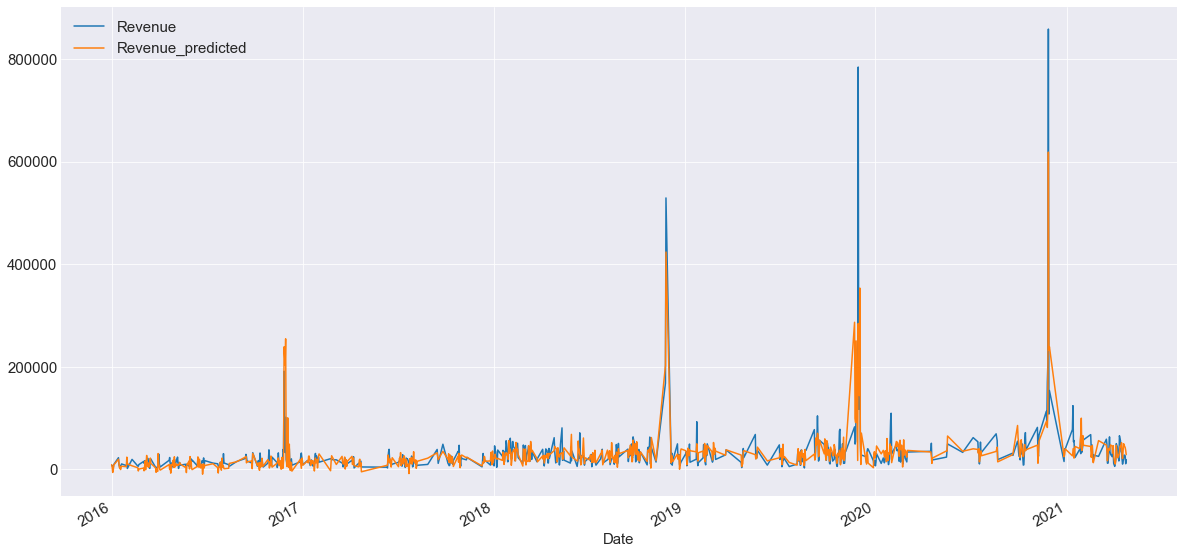

In [126]:
#Let's see the forecast
forecast_train.plot()

#### Residual Analysis 

In [127]:
forecast_train['Residuals'] = forecast_train['Revenue'] - forecast_train['Revenue_predicted']

<AxesSubplot:xlabel='Date'>

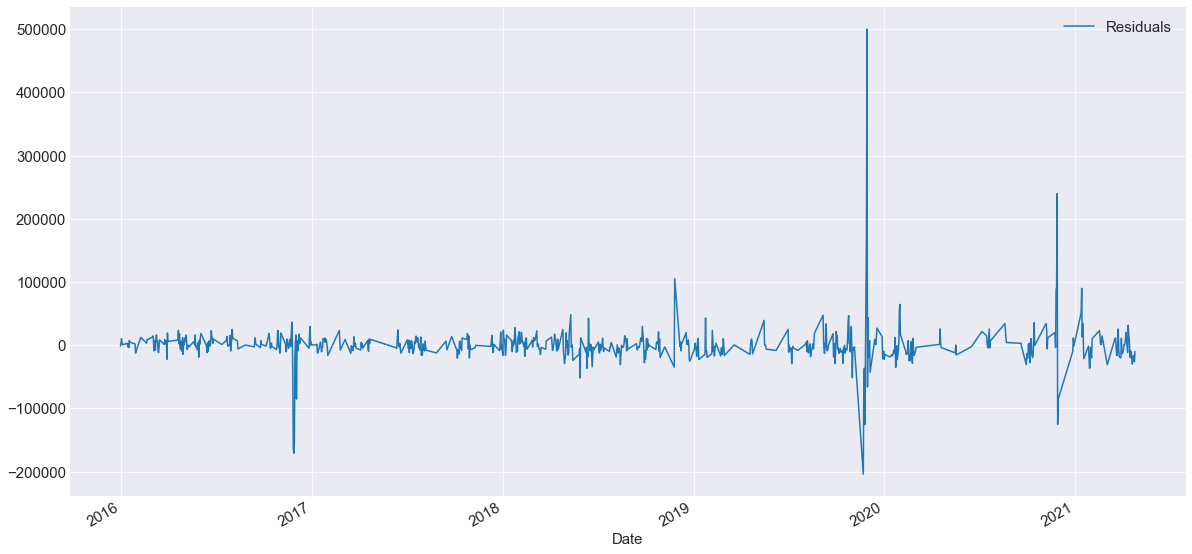

In [128]:
forecast_train[['Residuals']].plot()

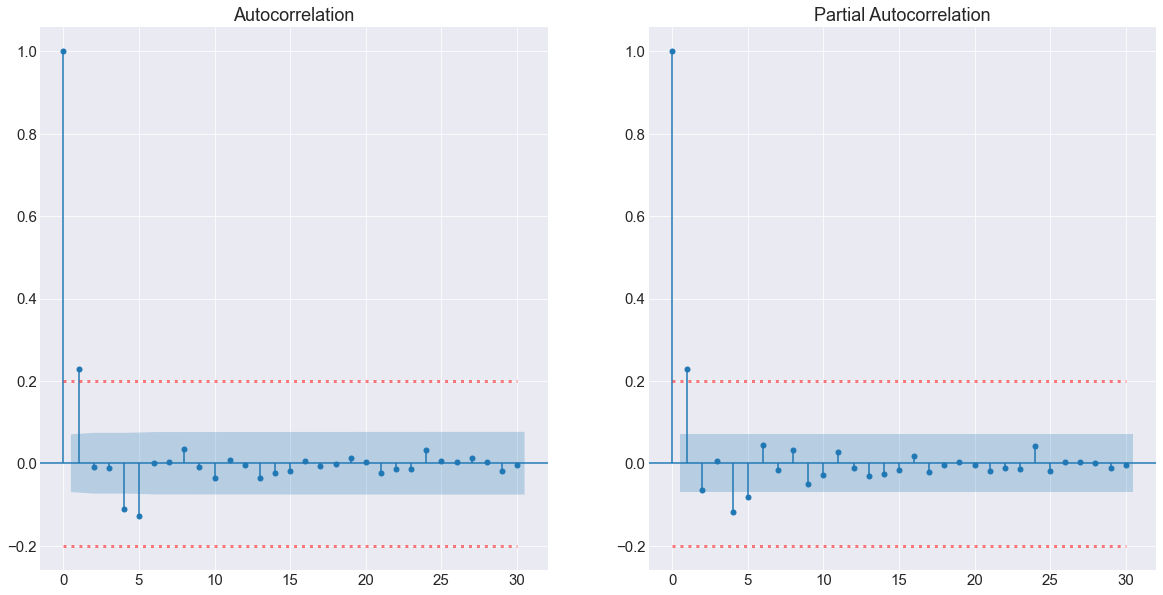

In [129]:
draw_autocorrelation(forecast_train[['Residuals']], 30)

In [130]:
test_adf(forecast_train, 'Residuals')

** Augmented Dickey-Fuller Test **

T-test: -14.331331091291469 < Confidence Interval[1%]: -3.438804978547988 - Result: Stationary
T-test: -14.331331091291469 < Confidence Interval[5%]: -2.8652717302548396 - Result: Stationary
T-test: -14.331331091291469 < Confidence Interval[10%]: -2.5687571389759802 - Result: Stationary

P-Value: 1.0985837115722965e-26 < 0.05 - Result: Stationary


In [131]:
#R²
r2_score(forecast_train['Revenue'], forecast_train['Revenue_predicted'])

0.6607787391723996

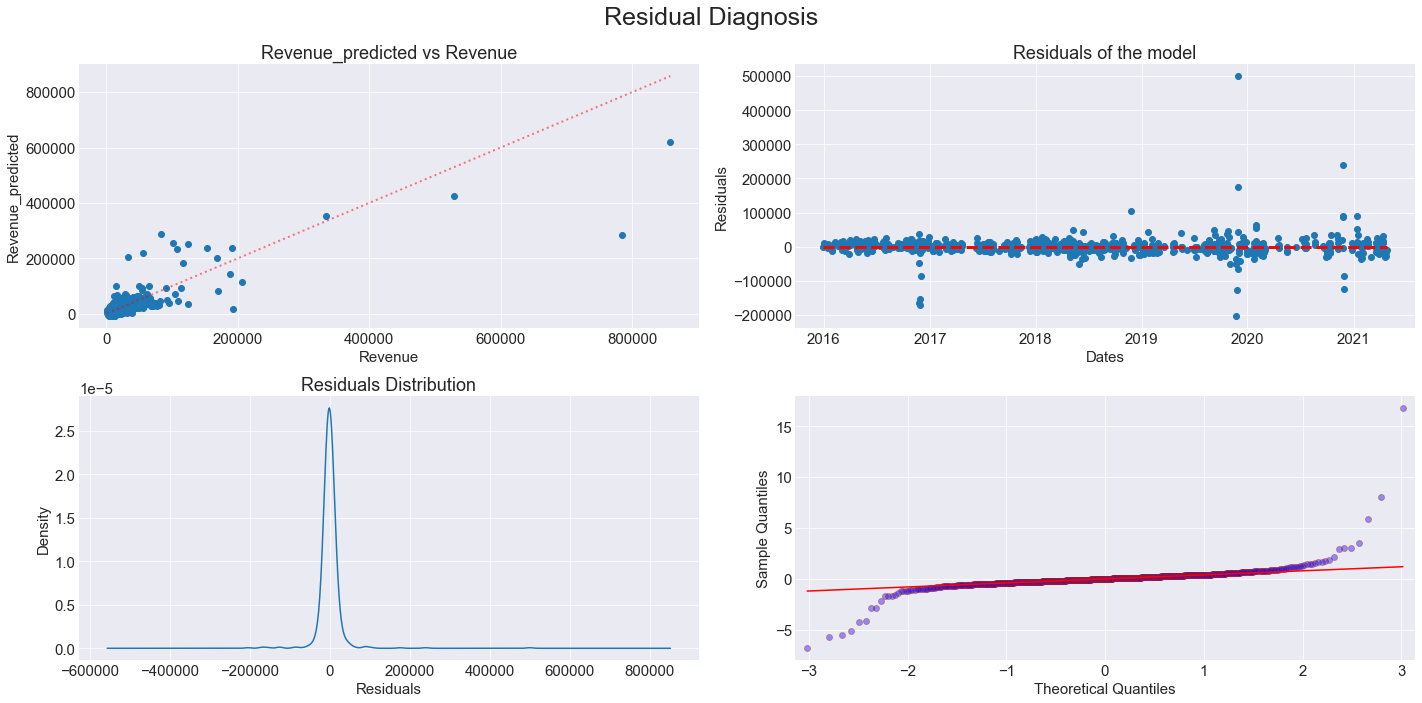

In [132]:
#Residual Analysis
draw_residuals_diagnosis(forecast_train, ['Revenue', 'Revenue_predicted', 'Residuals'])

#### Predict 

In [133]:
#Now how this perform with the Test Data
y_predict_test = model.predict(X_test_scaled)
y_predict_test = pd.Series(y_predict_test, index= y_test.index)
y_predict_test = y_predict_test.rename(f'{y_test.name}_predicted')
#Create the new DataFrame with the Test y values and Test predict values
forecast_test = pd.DataFrame([y_test, y_predict_test]).T

In [134]:
metric_rmse(forecast_test, 'Revenue')

45819.54172398026

<AxesSubplot:xlabel='Date'>

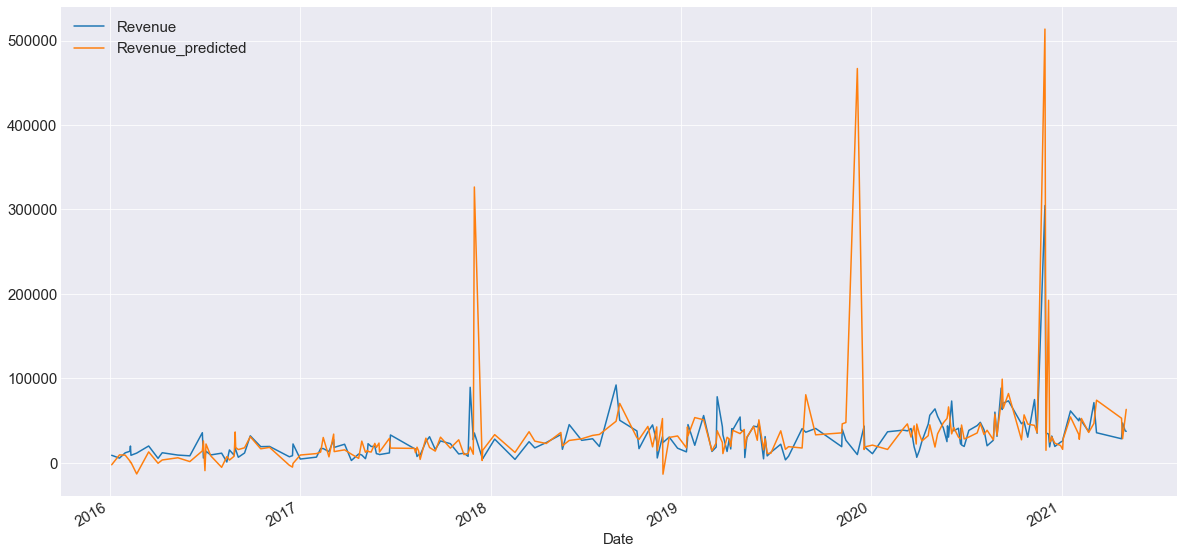

In [135]:
#Let's see the forecast
forecast_test.plot()

In [136]:
#R²
r2_score(forecast_test['Revenue'], forecast_test['Revenue_predicted'])

-1.8726306558932642

<AxesSubplot:>

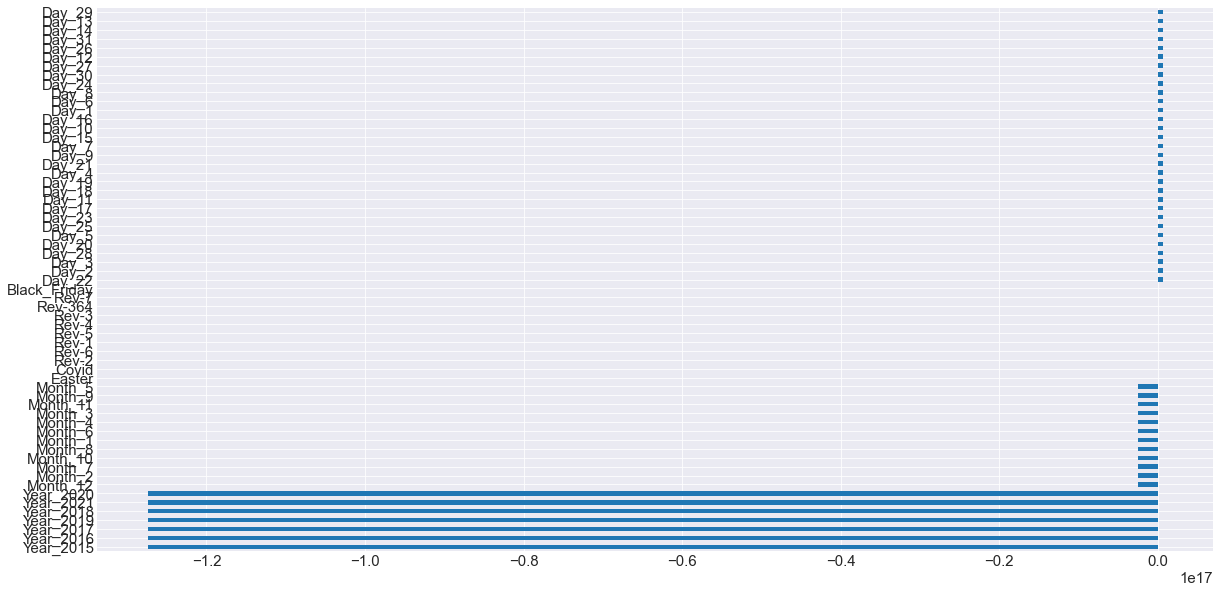

In [137]:
#Features Importance
pd.Series(model.coef_, data_model.columns[0:-1]).sort_values(ascending = True).plot(kind = 'barh')

### Test Machine Learning Models

Assumptions, we are going to fit and predict for forecasting just one day. Then we will chose the best model and create a new dataset for predicting the day after and so on. In total seven different Dataframes.

We are going to test different ML Regression models:
* Ridge
* Elastic Net
* KNeighborsRegressor
* RandomForestRegressor
* GradientBoostingRegressor
* XGBRegressor
* LGBMRegressor

First of all, get the right hyperparameters via GridSearch

##### Constants for GridSearch Time Series

In [138]:
ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'fit_intercept': [True, False],
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    }

elastic_net_params = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 0.9, 0.99, 0.999],
    'l1_ratios': np.linspace(0, 1, 20),
    'fit_intercept': [True, False]
    }

k_neighbors_params = {
    'n_neighbors': np.linspace(5, 100, 20, dtype= int),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
    }

random_forest_params = {  
    'n_estimators': np.linspace(100, 1000, 3, dtype= int),
    'max_depth': [30, 40, 50],
    'min_samples_split': np.linspace(2, 10, 3, dtype= int),
    'min_samples_leaf': np.linspace(1, 10, 10, dtype= int),
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    }

gradient_boosting_params = {
    'loss': ['ls', 'lad', 'huber', 'quantile'],
    'n_estimators': np.linspace(100, 1000, 3, dtype= int),
    'min_samples_split': np.linspace(2, 10, 3, dtype= int),
    'min_samples_leaf': np.linspace(1, 10, 10, dtype= int),
    'max_depth': [3, 4, 5],
    'max_features': ['auto', 'sqrt']
    }

xgb_params = {
    'n_estimators': np.linspace(100, 1000, 4, dtype= int),
    'max_depth': np.linspace(3, 20, 6, dtype= int),
    'booster': ['gbtree', 'gblinear', 'dart']
    }

lgbm_params = {
    'num_leaves': np.linspace(31, 2000, 6, dtype= int),
    'n_estimators': np.linspace(50, 1000, 6, dtype= int)
    }

#### Ridge 

In [80]:
#GridSearch Ridge
models_list_ridge, metrics_list_ridge, forecasts_list_ridge = \
    grid_search_times_series('ridge', ridge_params, data_model, 'Revenue', lags, 10, 'rmse')

In [106]:
best_model_metric(models_list_ridge, metrics_list_ridge)

(26847.66211027263, Ridge(alpha=0.001, fit_intercept=False, solver='sag'))

#### Elastic Net

In [81]:
#GridSearch Elastic Net
models_list_elastic, metrics_list_elastic, forecasts_list_elastic = \
    grid_search_times_series('elastic', elastic_net_params, data_model, 'Revenue', lags, 10, 'rmse')

In [108]:
best_model_metric(models_list_elastic, metrics_list_elastic)

(24270.631929236923, ElasticNet(alpha=0.9, l1_ratio=0.3684210526315789))

#### K-Neighbors 

In [91]:
#GridSearch K-neighbors
models_list_kn, metrics_list_kn, forecasts_list_kn = \
    grid_search_times_series('kneighbors', k_neighbors_params, data_model, 'Revenue', lags, 10, 'rmse')

In [109]:
best_model_metric(models_list_kn, metrics_list_kn)

(27118.266600226074,
 KNeighborsRegressor(algorithm='kd_tree', n_neighbors=10, weights='distance'))

#### Random Forest

In [26]:
#Random Forest
models_list_random, metrics_list_random, forecasts_list_random = \
    grid_search_times_series('random', random_forest_params, data_model, 'Revenue', lags, 10, 'rmse')

In [27]:
best_model_metric(models_list_random, metrics_list_random)

(25700.928861148837, RandomForestRegressor(max_depth=40))

#### Gradient Boost

In [102]:
#GridSearch Gradient Boost
models_list_gradient, metrics_list_gradient, forecasts_list_gradient = \
    grid_search_times_series('gradient', gradient_boosting_params, data_model, 'Revenue', lags, 10, 'rmse')

In [125]:
best_model_metric(models_list_gradient, metrics_list_gradient)

(22352.736923338736, GradientBoostingRegressor(max_features='auto'))

#### XGB

In [124]:
#XGB
models_list_xgb, metrics_list_xgb, forecasts_list_xgb = \
    grid_search_times_series('xgb', xgb_params, data_model, 'Revenue', lags, 10, 'rmse')

[10:46:56] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:46:56] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:46:56] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:47:06] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:47:06] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:47:06] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:47:26] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:47:26] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:47:38] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:48:13] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:48:13] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:48:13] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:49:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:49:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:49:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:51:57] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:51:57] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:51:57] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:54:00] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:54:00] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:54:01] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:57:31] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:59:52] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:59:52] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[11:08:07] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:08:08] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:08:08] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[11:12:03] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:12:04] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:12:04] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[11:21:20] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:21:20] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:21:21] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

In [126]:
best_model_metric(models_list_xgb, metrics_list_xgb)

(25635.222201310367,
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None))

#### LGBM

In [36]:
#LGBMRegressor
models_list_lgbm, metrics_list_lgbm, forecasts_list_lgbm = \
    grid_search_times_series('lgbm', lgbm_params, data_model, 'Revenue', lags, 10, 'rmse')

In [37]:
best_model_metric(models_list_lgbm, metrics_list_lgbm)

(28423.544286052154, LGBMRegressor(n_estimators=50))

### Training and Validation 

#### Train/Test Split
Let's prepare the X_train, X_test, y_train and y_test data and scale these features with Robust scaler

A prepare the full time series adding the validation data

In [139]:
#Train and Test Split
X_train, X_test, y_train, y_test = time_series_train_test_split(data_model, lags)

In [140]:
#Scale the features
X_train_scaled, X_test_scaled = data_normalization(X_train, X_test, 'robust')

#### Ridge Model

In [141]:
#Ridge Model
model_ridge = Ridge(alpha=0.001, fit_intercept=False, solver='sag')

In [142]:
#Model
model_ridge.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_ridge = predict_model(model_ridge, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_ridge = metric_rmse(forecast_ridge, "Revenue")
r2_ridge = r2_score(forecast_ridge["Revenue"], forecast_ridge["Revenue_predicted"])
print(f'Ridge RMSE_train: {rmse_ridge}')
print(f'R²: {r2_ridge}')

Ridge RMSE_train: 30047.716506301265
R²: 0.735722131125037


In [143]:
forecast_ridge

Revenue  Revenue_predicted     Residuals
Date                                                 
2016-01-08   7618.55        9812.462551  -2193.912551
2016-01-09   6086.97        6807.589112   -720.619112
2016-01-10   3528.49       16643.856368 -13115.366368
2016-01-11   6078.54       18264.124356 -12185.584356
2016-01-12  12154.41       20420.404467  -8265.994467
...              ...                ...           ...
2021-04-27  31161.77       48496.874053 -17335.104053
2021-04-28  47103.00       30453.846846  16649.153154
2021-04-29  64859.12       53934.819695  10924.300305
2021-04-30  20316.61       33058.864298 -12742.254298
2021-05-09  19703.32       40785.763214 -21082.443214

[837 rows x 3 columns]

In [144]:
#Test Values
forecast_ridge_test = predict_model(model_ridge, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_ridge_test = metric_rmse(forecast_ridge_test, "Revenue")
r2_ridge_test = r2_score(forecast_ridge_test["Revenue"], forecast_ridge_test["Revenue_predicted"])
print(f'Ridge RMSE_test: {rmse_ridge_test}')
print(f'R²: {r2_ridge_test}')

Ridge RMSE_test: 23970.10954056368
R²: -1.146267056785946


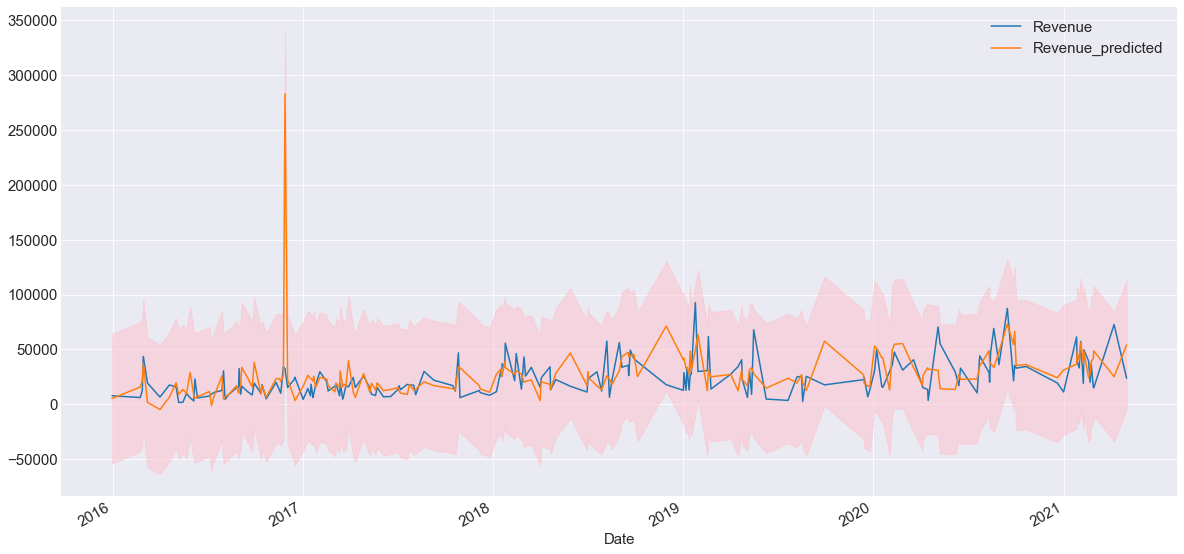

In [145]:
#Let's see the prediction
forecast_ridge_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_ridge, forecast_ridge_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

#### Elastic Net Model

In [146]:
#Elastic Net Model
model_elastic_net = ElasticNet(alpha=0.9, l1_ratio=0.3684210526315789)

In [147]:
#Model
model_elastic_net.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_elastic_net = predict_model(model_elastic_net, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_elastic_net = metric_rmse(forecast_elastic_net, "Revenue")
r2_elastic_net = r2_score(forecast_elastic_net["Revenue"], forecast_elastic_net["Revenue_predicted"])
print(f'Ridge Elastic Net_train: {rmse_elastic_net}')
print(f'R²: {r2_elastic_net}')

Ridge Elastic Net_train: 38774.28753038133
R²: 0.5599262108190584


In [148]:
#Test Values
forecast_elastic_net_test = predict_model(model_elastic_net, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_elastic_net_test = metric_rmse(forecast_elastic_net_test, "Revenue")
r2_elastic_net_test = r2_score(forecast_elastic_net_test["Revenue"], forecast_elastic_net_test["Revenue_predicted"])
print(f'Ridge Elastic Net_test: {rmse_elastic_net_test}')
print(f'R²: {r2_elastic_net_test}')

Ridge Elastic Net_test: 14000.117574446509
R²: 0.2678381630435439


#### K-Neighbors Model

In [149]:
#K-Neighbors Model
model_kn = KNeighborsRegressor(algorithm='kd_tree', n_neighbors=10, weights='distance')

In [190]:
#Model
model_kn.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_kn = predict_model(model_kn, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_kn = metric_rmse(forecast_kn, "Revenue")
r2_kn = r2_score(forecast_kn["Revenue"], forecast_kn["Revenue_predicted"])
print(f'K-Neighbors_train: {rmse_kn}')
print(f'R²: {r2_kn}')

K-Neighbors_train: 0.0
R²: 1.0


In [ ]:
#Overfitting?

In [151]:
forecasts_kn = cross_val_time_series(model_kn, data_small, lags, 10, scaler= 'robust')

bias_kn = time_series_score(forecasts_kn, 'Revenue', 'bias')
variance_kn = time_series_score(forecasts_kn, 'Revenue', 'variance')
rmse_kn = time_series_score(forecasts_kn, 'Revenue', 'rmse')

error_kn = pd.DataFrame([rmse_kn, bias_kn, variance_kn], index= ['RMSE', 'Bias', 'Variance']).T

In [152]:
#Total Error
error_kn['Total Error'] = pd.DataFrame(error_kn['Bias'] ** 2 + error_kn['Variance'])

In [153]:
error_kn

RMSE          Bias  Variance   Total Error
0  16923.023450  -2346.676842  0.560790  5.506893e+06
1  26242.436248   -209.872123  0.654902  4.404696e+04
2  16824.832772    940.692363  0.637569  8.849028e+05
3  17773.459667   1706.520069  0.716898  2.912211e+06
4  62883.598608  11217.776031  0.603076  1.258385e+08
5  15167.175542   1333.318173  0.698688  1.777738e+06
6  25000.813509  -1942.464059  0.447763  3.773167e+06
7  51468.337993   1699.589411  0.576392  2.888605e+06
8  23611.134969  -1396.325472  0.835492  1.949726e+06
9  29559.630295   -581.733065  0.725027  3.384141e+05

<AxesSubplot:>

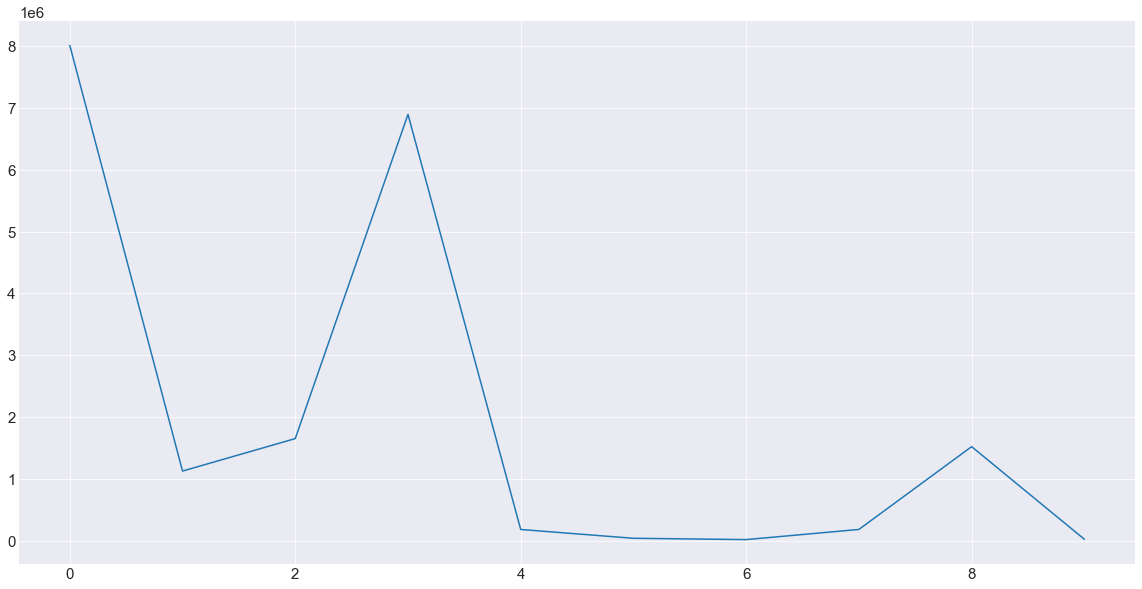

In [63]:
error_kn['Total Error'].plot()

In [198]:
#Calculate the RMSE and R²
rmse_kn = metric_rmse(forecast_kn, "Revenue")
r2_kn = r2_score(forecast_kn["Revenue"], forecast_kn["Revenue_predicted"])
print(f'K-Neighbors_train: {rmse_kn}')
print(f'R²: {r2_kn}')

K-Neighbors_train: 0.0
R²: 1.0


In [154]:
#Model
model_kn.fit(X_train_scaled, y_train)

#Test Values
forecast_kn_test = predict_model(model_kn, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_kn_test = metric_rmse(forecast_kn_test, "Revenue")
r2_kn_test = r2_score(forecast_kn_test["Revenue"], forecast_kn_test["Revenue_predicted"])
print(f'K-Neighbors_test: {rmse_kn_test}')
print(f'R²: {r2_kn_test}')

K-Neighbors_test: 14126.887585525626
R²: 0.2545187912057214


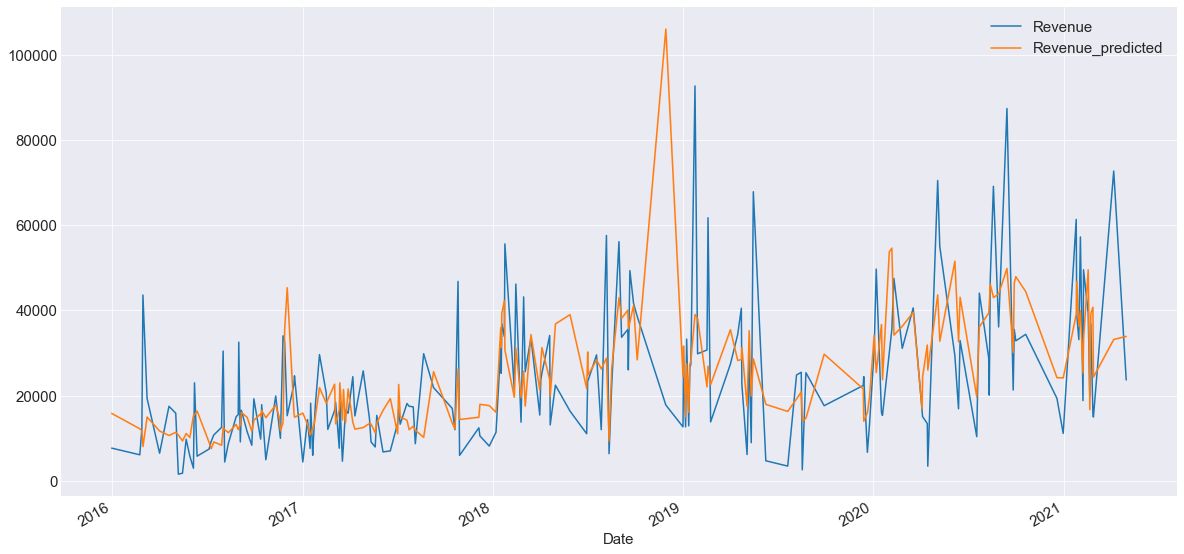

In [155]:
#Let's see the prediction
forecast_kn_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_kn, forecast_kn_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

#### Random Forest Model

In [156]:
#Random Fores Model
model_random = RandomForestRegressor(max_depth=40)

In [157]:
#Model
model_random.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_random = predict_model(model_random, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_random = metric_rmse(forecast_random, "Revenue")
r2_random = r2_score(forecast_random["Revenue"], forecast_random["Revenue_predicted"])
print(f'Random Forest_train: {rmse_random}')
print(f'R²: {r2_random}')

Random Forest_train: 12661.295150669494
R²: 0.9530760983925236


In [158]:
#Test Values
forecast_random_test = predict_model(model_random, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_random_test = metric_rmse(forecast_random_test, "Revenue")
r2_random_test = r2_score(forecast_random_test["Revenue"], forecast_random_test["Revenue_predicted"])
print(f'Random Forest_test: {rmse_random_test}')
print(f'R²: {r2_random_test}')

Random Forest_test: 30833.15218013608
R²: -2.551236330461056


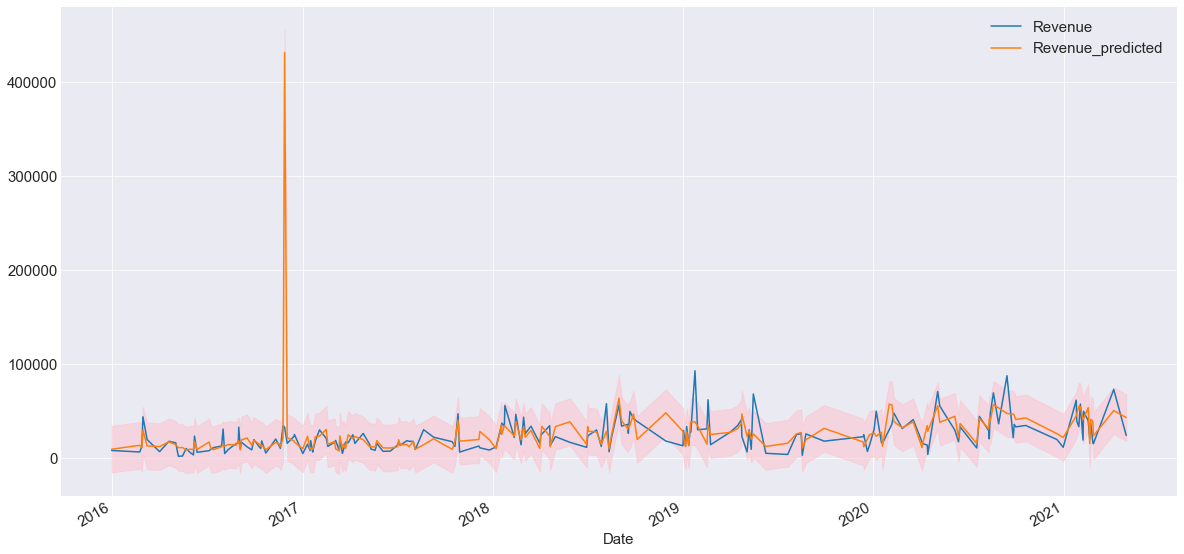

In [159]:
#Let's see the prediction
forecast_random_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_random, forecast_random_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

#### Gradient Boost

In [160]:
#Gradient Boost
model_boost = GradientBoostingRegressor(max_features='auto')

In [161]:
#Model
model_boost.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_boost = predict_model(model_boost, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_boost = metric_rmse(forecast_boost, "Revenue")
r2_boost = r2_score(forecast_boost["Revenue"], forecast_boost["Revenue_predicted"])
print(f'Gradient Boost_train: {rmse_boost}')
print(f'R²: {r2_boost}')

Gradient Boost_train: 10203.206647664872
R²: 0.9695272804348203


In [162]:
#Test Values
forecast_boost_test = predict_model(model_boost, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_boost_test = metric_rmse(forecast_boost_test, "Revenue")
r2_boost_test = r2_score(forecast_boost_test["Revenue"], forecast_boost_test["Revenue_predicted"])
print(f'Gradient Boost_test: {rmse_boost_test}')
print(f'R²: {r2_boost_test}')

Gradient Boost_test: 28600.49345812882
R²: -2.0555597091295748


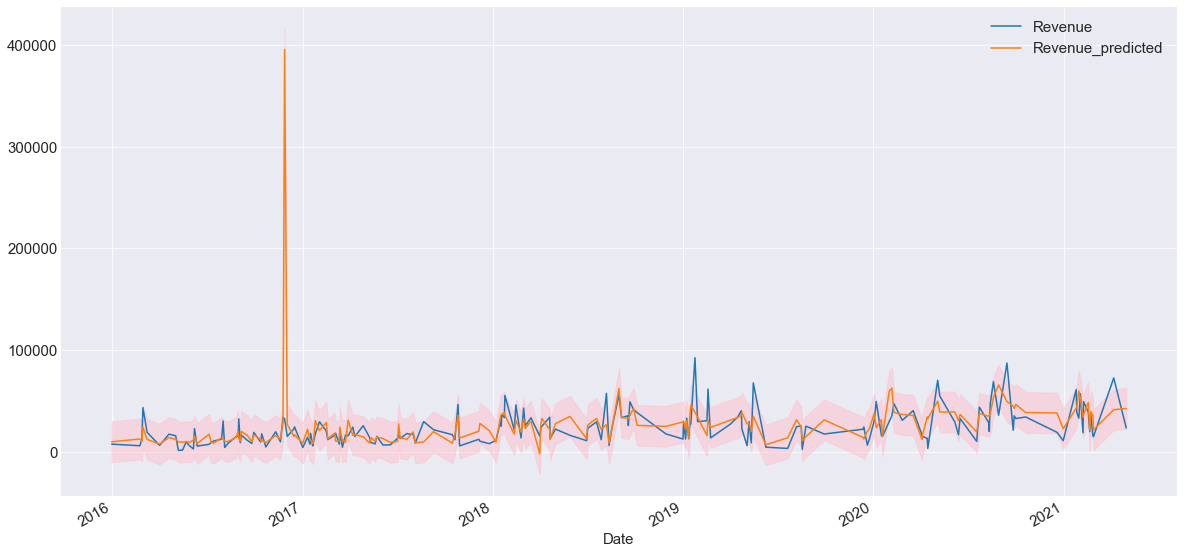

In [163]:
#Let's see the prediction
forecast_boost_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_boost, forecast_boost_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

#### XGB

In [167]:
#XGB
model_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [168]:
#Model
model_xgb.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_xgb = predict_model(model_xgb, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_xgb = metric_rmse(forecast_xgb, "Revenue")
r2_xgb = r2_score(forecast_xgb["Revenue"], forecast_xgb["Revenue_predicted"])
print(f'XGB_train: {rmse_xgb}')
print(f'R²: {r2_xgb}')

XGB_train: 0.008279834646104866
R²: 0.9999999999999799


In [ ]:
#Overfitting?

In [169]:
forecasts_xgb = cross_val_time_series(model_xgb, data_small, lags, 10, scaler= 'robust')

bias_xgb = time_series_score(forecasts_xgb, 'Revenue', 'bias')
variance_xgb = time_series_score(forecasts_xgb, 'Revenue', 'variance')
rmse_xgb = time_series_score(forecasts_xgb, 'Revenue', 'rmse')

error_xgb = pd.DataFrame([rmse_xgb, bias_xgb, variance_xgb], index= ['RMSE', 'Bias', 'Variance']).T

In [170]:
#Total Error
error_xgb['Total Error'] = pd.DataFrame(error_xgb['Bias'] ** 2 + error_xgb['Variance'])

In [171]:
error_xgb

RMSE         Bias  Variance   Total Error
0  15864.332283  2344.425687  0.659956  5.496332e+06
1  21306.191148 -1861.490044  0.876202  3.465146e+06
2  28425.105139  -984.606585  0.378431  9.694505e+05
3  46877.230934  3973.114546  0.618087  1.578564e+07
4  17586.619415 -1034.137290  0.676749  1.069441e+06
5  27175.493736  1101.284866  0.813318  1.212829e+06
6  43973.221844  1387.192086  0.715969  1.924303e+06
7  28890.508825  1798.864424  0.677192  3.235914e+06
8  26937.037266  3214.293792  0.808630  1.033169e+07
9  39250.395288 -3333.482279  0.809837  1.111210e+07

<AxesSubplot:>

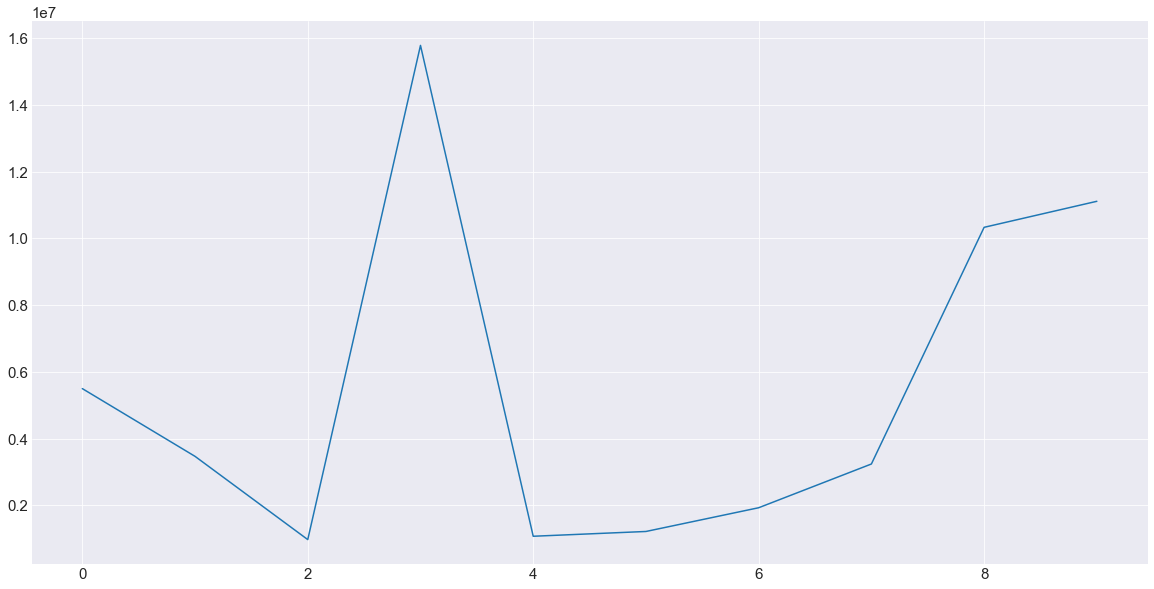

In [172]:
error_xgb['Total Error'].plot()

In [197]:
#Calculate the RMSE and R²
rmse_xgb = metric_rmse(forecast_xgb, "Revenue")
r2_xgb = r2_score(forecast_xgb["Revenue"], forecast_xgb["Revenue_predicted"])
print(f'XGB_train: {rmse_xgb}')
print(f'R²: {r2_xgb}')

XGB_train: 0.008279834646104866
R²: 0.9999999999999799


In [173]:
#Model
model_xgb.fit(X_train_scaled, y_train)

#Test Values
forecast_xgb_test = predict_model(model_xgb, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_xgb_test = metric_rmse(forecast_xgb_test, "Revenue")
r2_xgb_test = r2_score(forecast_xgb_test["Revenue"], forecast_xgb_test["Revenue_predicted"])
print(f'XGB_test: {rmse_xgb_test}')
print(f'R²: {r2_xgb_test}')

XGB_test: 17899.97718056275
R²: -0.19687467255733737


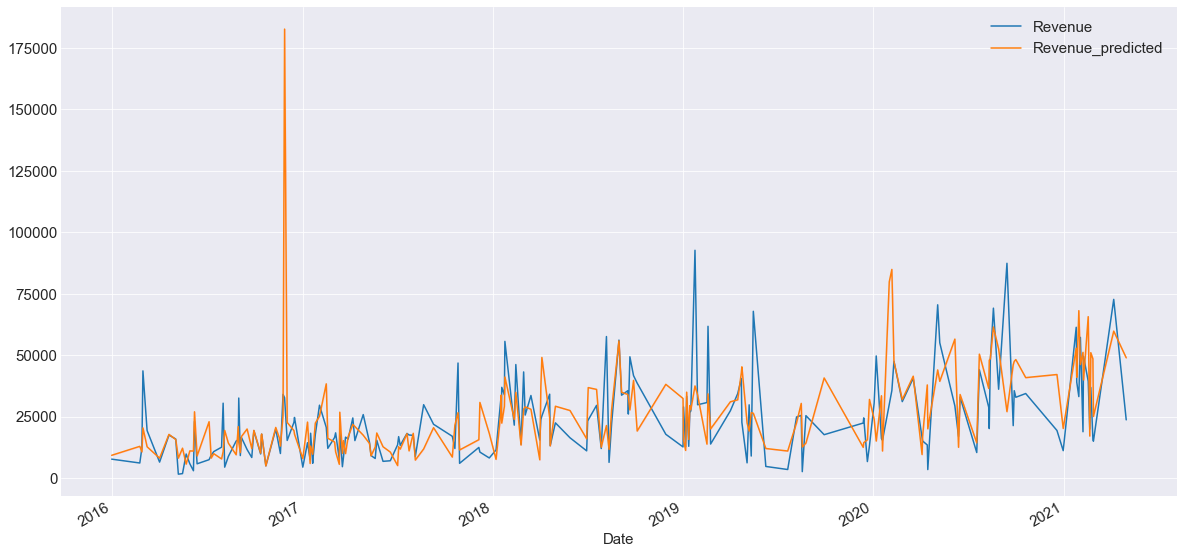

In [174]:
#Let's see the prediction
forecast_xgb_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_xgb, forecast_xgb_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

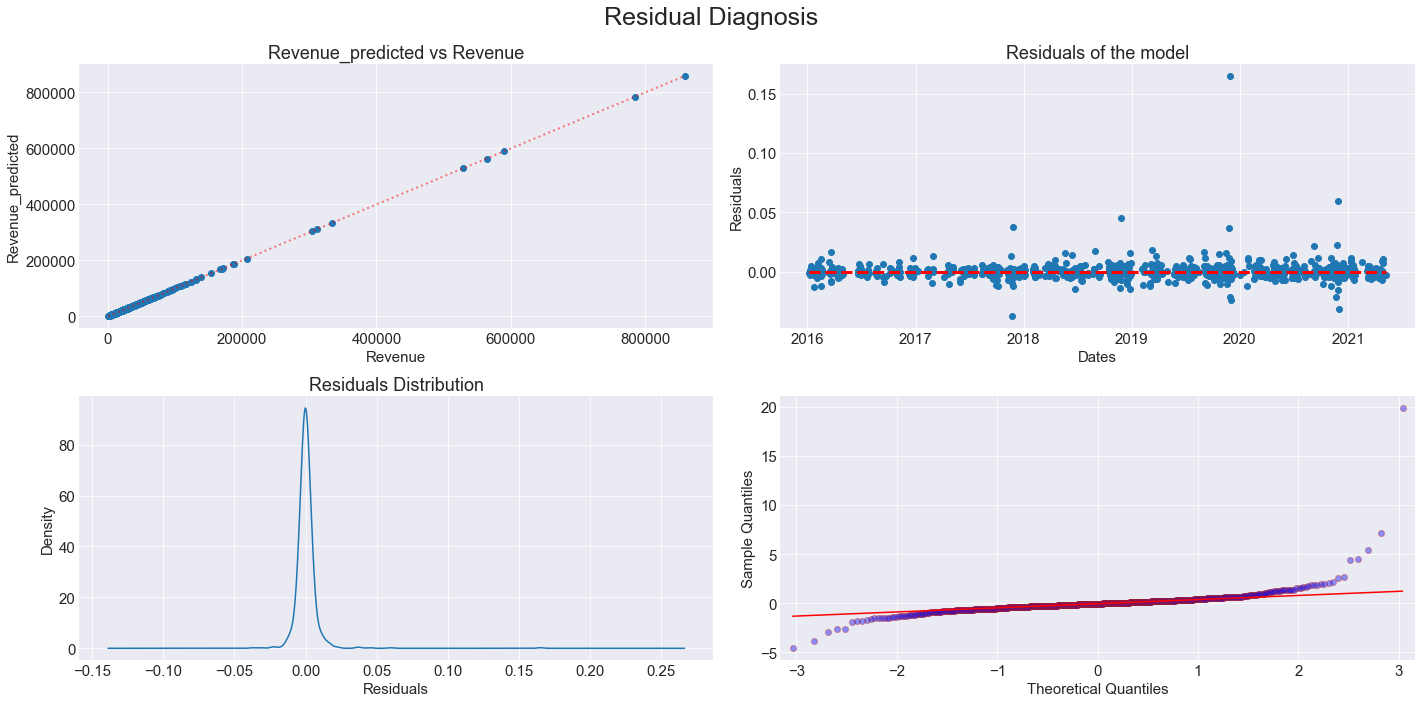

In [175]:
#Residual Analysis
draw_residuals_diagnosis(forecast_xgb, ['Revenue', 'Revenue_predicted', 'Residuals'])

#### LGBM

In [176]:
#LGBM
model_lgbm = LGBMRegressor(n_estimators=50)

In [177]:
#Model
model_lgbm.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_lgbm = predict_model(model_lgbm, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_lgbm = metric_rmse(forecast_lgbm, "Revenue")
r2_lgbm = r2_score(forecast_lgbm["Revenue"], forecast_lgbm["Revenue_predicted"])
print(f'LGBM_train: {rmse_lgbm}')
print(f'R²: {r2_lgbm}')

LGBM_train: 33559.37437326065
R²: 0.6703405257613697


In [178]:
#Test Values
forecast_lgbm_test = predict_model(model_lgbm, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_lgbm_test = metric_rmse(forecast_lgbm_test, "Revenue")
r2_lgbm_test = r2_score(forecast_lgbm_test["Revenue"], forecast_lgbm_test["Revenue_predicted"])
print(f'LGBM_test: {rmse_lgbm_test}')
print(f'R²: {r2_lgbm_test}')

LGBM_test: 13431.703788858273
R²: 0.32608374225379966


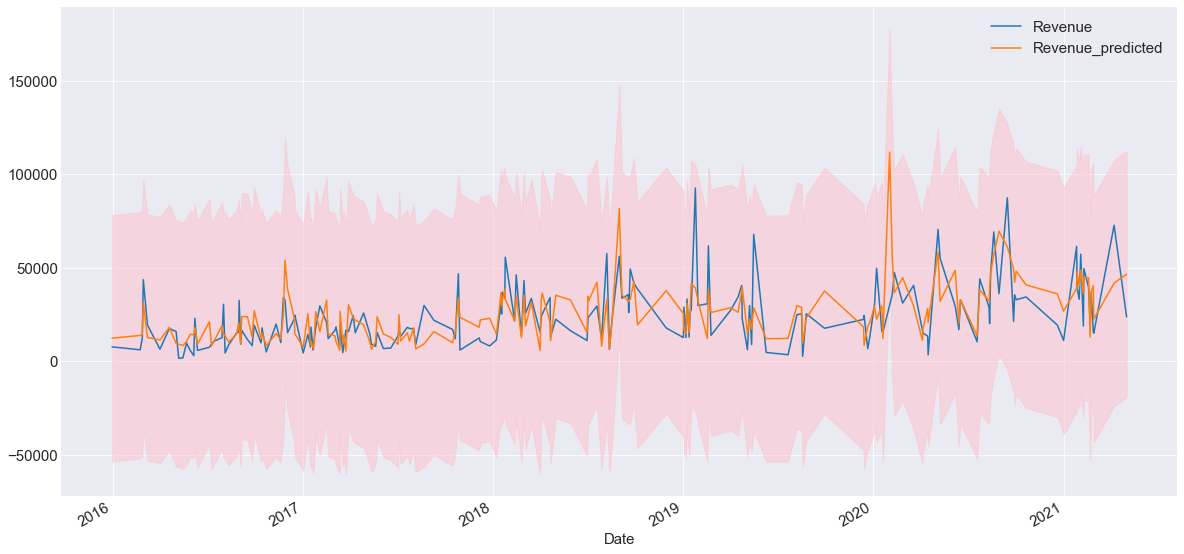

In [179]:
#Let's see the prediction
forecast_lgbm_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_lgbm, forecast_lgbm_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

### Models Comparison 

Let's see how the different Machine Learnig models perform

In [202]:
rmse_models = {
    'Ridge': [rmse_ridge, rmse_ridge_test, r2_ridge],
    'Elastic Net': [rmse_elastic_net, rmse_elastic_net_test, r2_elastic_net],
    'K-Neighbors': [rmse_kn, rmse_kn_test, r2_kn],
    'Random Forest': [rmse_random, rmse_random_test, r2_random],
    'Gradient Boost': [rmse_boost, rmse_boost_test, r2_boost],
    'XGB': [rmse_xgb, rmse_xgb_test, r2_xgb],
    'LGBM': [rmse_lgbm, rmse_lgbm_test, r2_lgbm]
}

In [203]:
model_comparison = pd.DataFrame(rmse_models, index= ['RMSE', 'RMSE_Test', 'R2']).T

In [204]:
model_comparison

RMSE     RMSE_Test        R2
Ridge           30047.716506  23970.109541  0.735722
Elastic Net     38774.287530  14000.117574  0.559926
K-Neighbors         0.000000  14126.887586  1.000000
Random Forest   12661.295151  30833.152180  0.953076
Gradient Boost  10203.206648  28600.493458  0.969527
XGB                 0.008280  17899.977181  1.000000
LGBM            33559.374373  13431.703789  0.670341

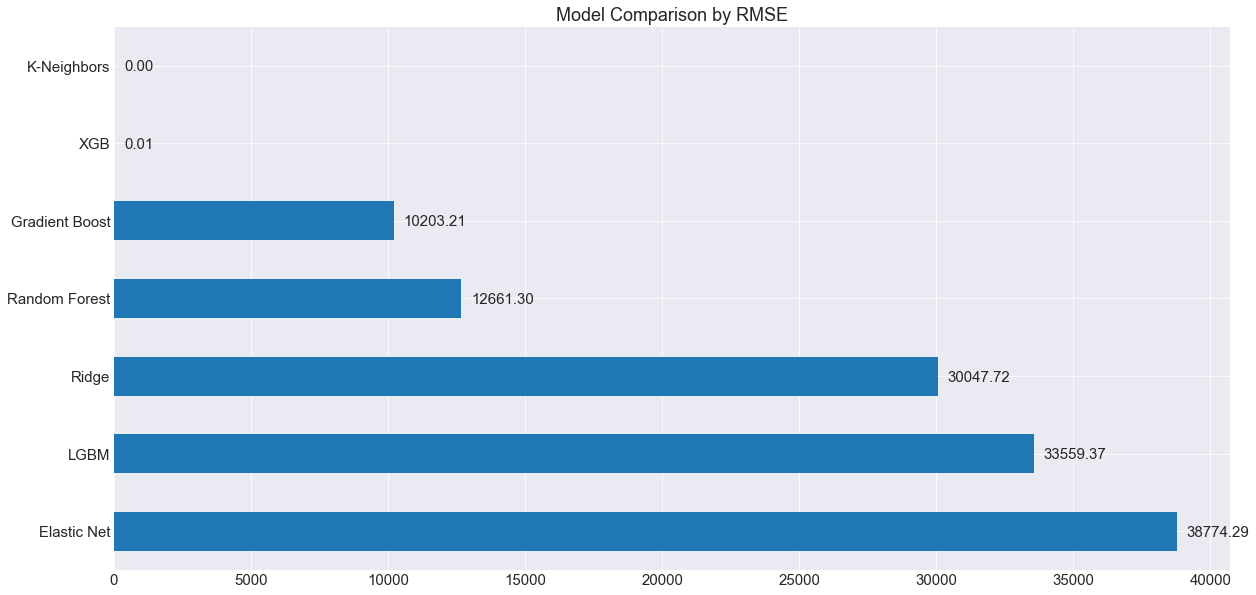

In [205]:
draw_barh(model_comparison, 'RMSE')

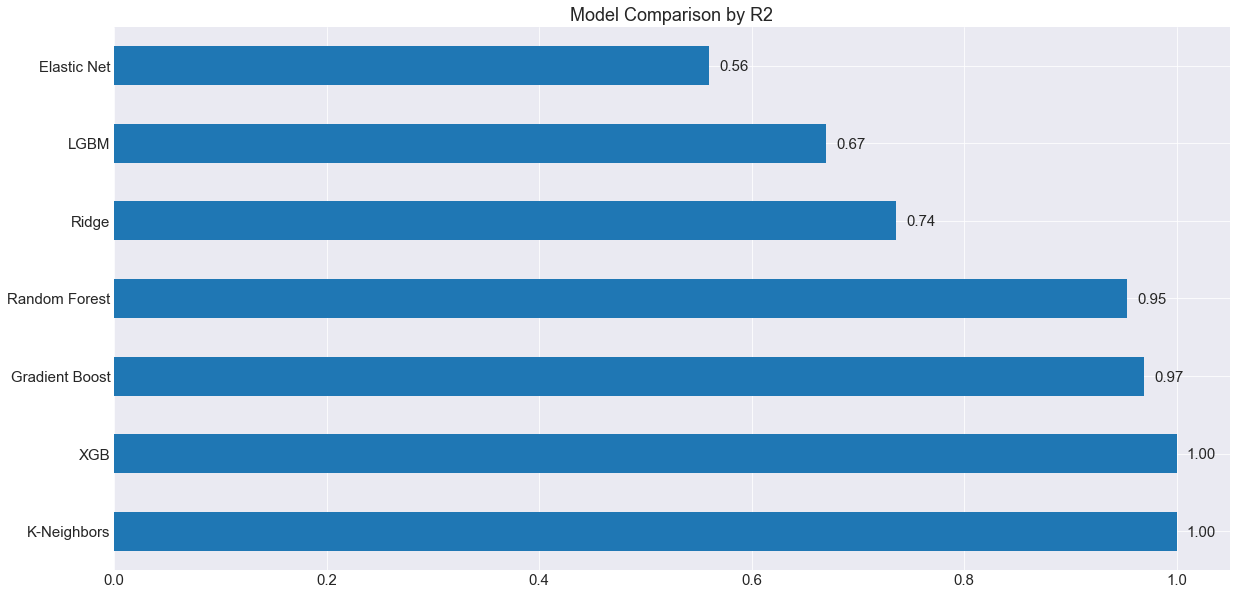

In [206]:
draw_barh(model_comparison, 'R2')

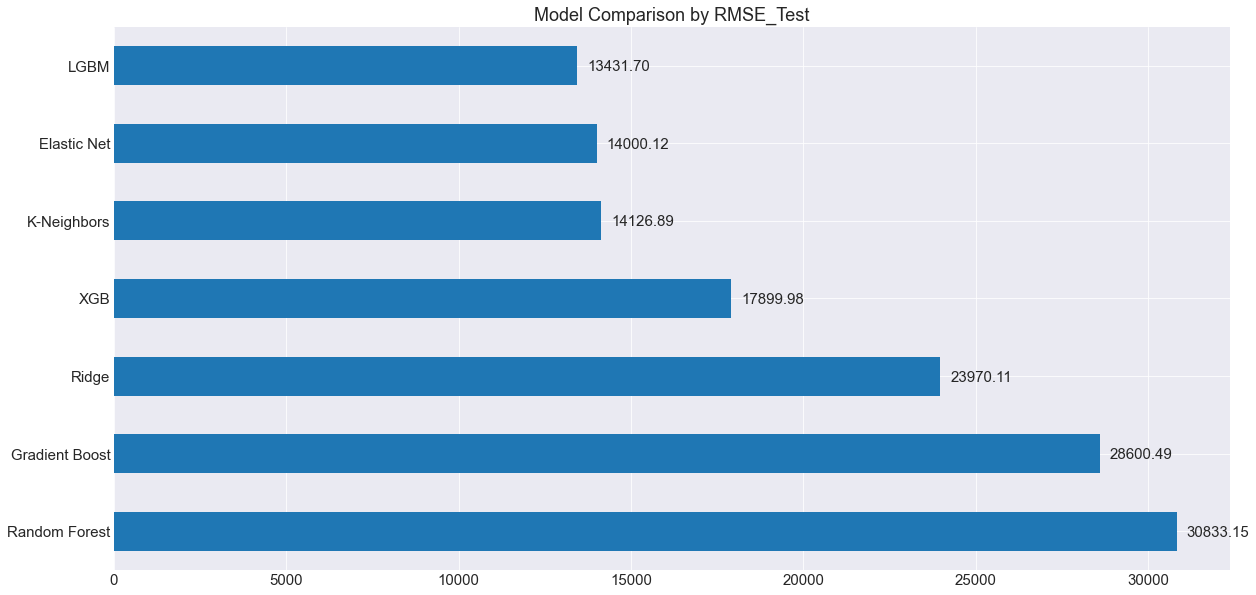

In [207]:
draw_barh(model_comparison, 'RMSE_Test')

In [208]:
#Finally, let's predict T+1 using using the full set

### Data Validation and Data Forecasting
We are going to concatenate the current Time Series Data with a longer file with more reals values and use this bigger model for checking how good or bad is woking the model

Moreover, we are going to create the last Data Set for Forecasting purposes. The idea is forecasting up to 7 days in advance.
We are going to add to the Data Validation Data Set a new one with the lagged, seasonal and exogenous features in order to try to estimate what will be the sales.

Some important assumptions. We need to trained 14 models for each forecast:
* model_trained_1: This will forecast T+1
* model_trained_2: This will forecast T+2
* And so on...

In [61]:
data_full = pd.concat([data_small, data_validation])

#All lagged features for forecasting - Period 7 days
lags = [1, 2, 3, 4, 5, 6, 7, 364]
data_full_forecast = prepare_data_forecast(data_full, 'Revenue', lags, 7)
data_full_forecast

Year_2021  Month_6  Day_14  Day_15  Day_16  Day_17  Day_18  \
2021-06-14          1        1       1       0       0       0       0   
2021-06-15          1        1       0       1       0       0       0   
2021-06-16          1        1       0       0       1       0       0   
2021-06-17          1        1       0       0       0       1       0   
2021-06-18          1        1       0       0       0       0       1   
2021-06-19          1        1       0       0       0       0       0   
2021-06-20          1        1       0       0       0       0       0   

            Day_19  Day_20  Black_Friday  Easter  Covid   Rev-364     Rev-7  \
2021-06-14       0       0             0       0      0  48735.52  44815.98   
2021-06-15       0       0             0       0      0  33745.33  21760.66   
2021-06-16       0       0             0       0      0  16913.21  74427.57   
2021-06-17       0       0             0       0      0  29435.16  47467.41   
2021-06-18       0       0             0       0      0  32517.81  38282.13   
2021-06-19       1       0             0       0      0  41321.59  44696.72   
2021-06-20       0       1             0       0      0  45465.30  55890.10   

               Rev-6     Rev-5     Rev-4     Rev-3     Rev-2     Rev-1  
2021-06-14  46716.35  47649.11  66938.46  53022.54  25079.69  27413.63  
2021-06-15  44815.98  46716.35  47649.11  66938.46  53022.54  25079.69  
2021-06-16  21760.66  44815.98  46716.35  47649.11  66938.46  53022.54  
2021-06-17  74427.57  21760.66  44815.98  46716.35  47649.11  66938.46  
2021-06-18  47467.41  74427.57  21760.66  44815.98  46716.35  47649.11  
2021-06-19  38282.13  47467.41  74427.57  21760.66  44815.98  46716.35  
2021-06-20  44696.72  38282.13  47467.41  74427.57  21760.66  44815.98

#### Gradient Boost Forecast

We will try to forecast 14 days

In [62]:
forecast_gradient = forecast_predict(data_full, 'Revenue', lags, 14, 'gradient', 'robust', '95%')
forecast_gradient

Revenue_forecast  Revenue_lower  Revenue_upper
2021-06-14      35662.817562   19997.548764   51328.086359
2021-06-15      40015.798276   21919.167244   58112.429308
2021-06-16      41229.670896   22196.003901   60263.337890
2021-06-17      36222.320591   14758.895269   57685.745912
2021-06-18      39878.206289   19224.753935   60531.658643
2021-06-19      36460.023944   17719.790379   55200.257509
2021-06-20      34644.293919   15972.865901   53315.721938
2021-06-21      50469.267239   28985.206480   71953.327997
2021-06-22      37847.462698   17144.933352   58549.992043
2021-06-23      42262.813731   21950.137481   62575.489981
2021-06-24      40551.000651   19992.885006   61109.116297
2021-06-25      33925.805164   12150.481538   55701.128790
2021-06-26      61744.459787   38699.597748   84789.321827
2021-06-27      49380.693465   28115.254418   70646.132512

In [63]:
data_full_forecast_gradient = data_full[['Revenue']]
data_full_forecast_gradient = pd.concat([data_full_forecast_gradient, forecast_gradient])

In [64]:
data_full_forecast_gradient['Revenue_forecast'].loc[data_full.index[-1]] = \
data_full_forecast_gradient.loc[data_full.index[-1]]['Revenue']

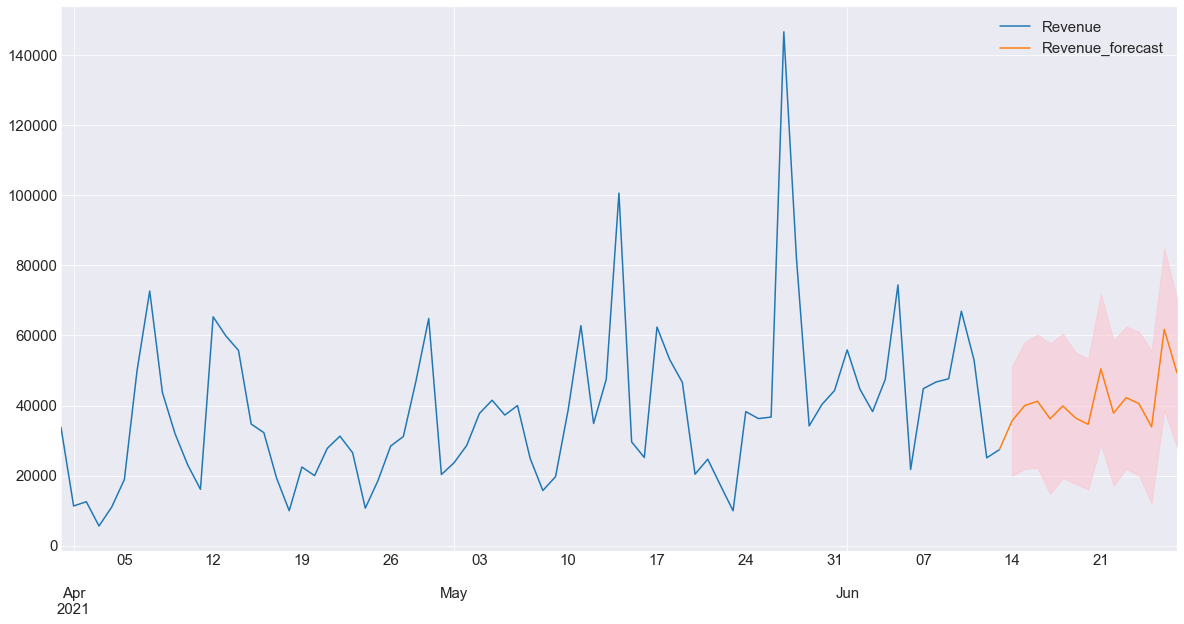

In [65]:
data_full_forecast_gradient.loc['2021-03-31':][['Revenue', 'Revenue_forecast']].plot()
plt.fill_between(data_full_forecast_gradient.index, data_full_forecast_gradient['Revenue_lower'],
                 data_full_forecast_gradient['Revenue_upper'], color='pink', alpha=0.5)

#### XGB Forecast

We will try to forecast 14 days

In [66]:
forecast_xgb = forecast_predict(data_full, 'Revenue', lags, 14, 'xgb', 'robust', '95%')
forecast_xgb

Revenue_forecast  Revenue_lower  Revenue_upper
2021-06-14      70136.367188   70136.359375   70136.375000
2021-06-15      47418.066406   47418.058594   47418.074219
2021-06-16      27906.945312   27906.931641   27906.958984
2021-06-17      40959.535156   40959.519531   40959.550781
2021-06-18      23310.105469   23310.089844   23310.121094
2021-06-19      42140.675781   42140.660156   42140.691406
2021-06-20      46309.046875   46309.035156   46309.058594
2021-06-21      35867.453125   35867.445312   35867.460938
2021-06-22      35544.347656   35544.332031   35544.363281
2021-06-23      37870.269531   37870.257812   37870.281250
2021-06-24      45580.082031   45580.070312   45580.093750
2021-06-25      29708.265625   29708.257812   29708.273438
2021-06-26      38355.503906   38355.492188   38355.515625
2021-06-27      65399.367188   65399.351562   65399.382812

In [67]:
data_full_forecast_xgb = data_full[['Revenue']]
data_full_forecast_xgb = pd.concat([data_full_forecast_xgb, forecast_xgb])

In [68]:
data_full_forecast_xgb['Revenue_forecast'].loc[data_full.index[-1]] = \
data_full_forecast_xgb.loc[data_full.index[-1]]['Revenue']

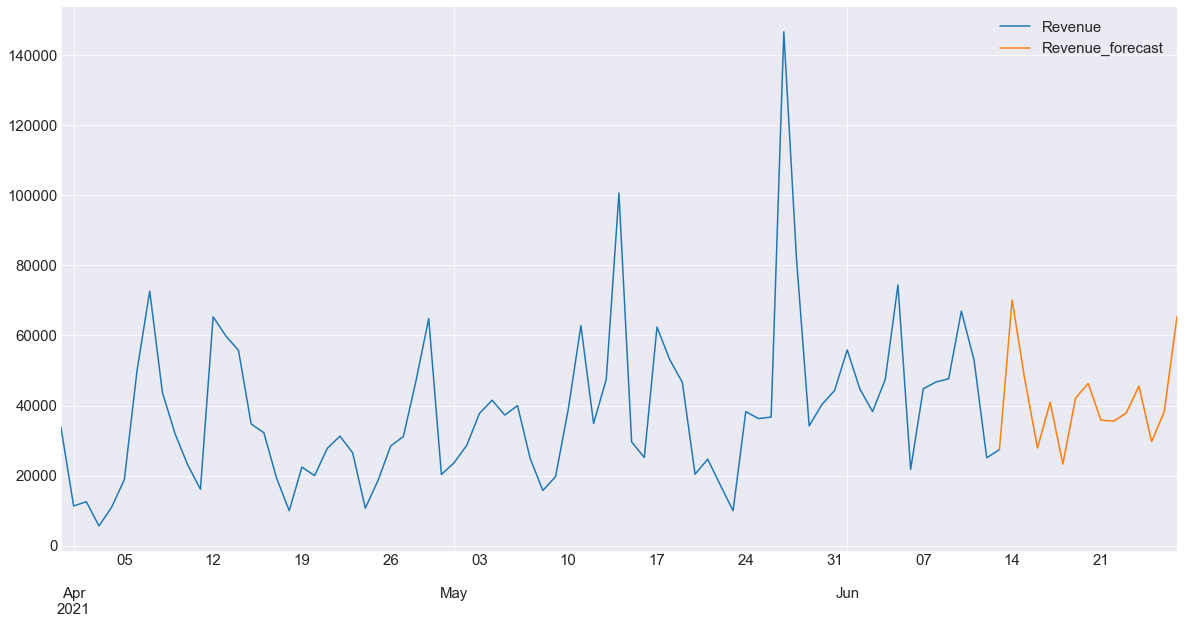

In [69]:
data_full_forecast_xgb.loc['2021-03-31':][['Revenue', 'Revenue_forecast']].plot()
plt.fill_between(data_full_forecast_xgb.index, data_full_forecast_xgb['Revenue_lower'],
                 data_full_forecast_xgb['Revenue_upper'], color='pink', alpha=0.5)

## Alternative Models 

### Prophet 

We are going to use this method and see the performance.

In [160]:
#Prophet requires a specific data format
data_prophet = pd.DataFrame()
#Prepare the data
data_temp = data.groupby(['Date'])[['Revenue']].sum()
data_temp = data_temp.resample('D', offset='00h00min00sec').sum()
data_temp.reset_index(inplace= True)
#Prophet requiered format
data_prophet['ds'] = data_temp['Date']
data_prophet['y'] = data_temp['Revenue']
data_prophet

ds         y
0    2015-01-01   3244.55
1    2015-01-02   4791.64
2    2015-01-03    534.93
3    2015-01-04    848.43
4    2015-01-05   2393.52
...         ...       ...
2316 2021-05-05  37283.53
2317 2021-05-06  39991.11
2318 2021-05-07  24901.84
2319 2021-05-08  15744.14
2320 2021-05-09  19703.32

[2321 rows x 2 columns]

In [161]:
#Model training
model = Prophet(seasonality_mode='multiplicative', interval_width= 0.95)
model_prophet = model.fit(data_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [163]:
#Forecast 30 days in advance
future_prophet = model_prophet.make_future_dataframe(freq= 'D', periods= 30)
#Get forecast
forecast_prophet = model_prophet.predict(future_prophet)

In [164]:
#Let's make a copy
forecast_prophet_model = forecast_prophet.copy()
#We are going to check how the model predict with the trained data
forecast_prophet['y'] = data_prophet['y']
forecast_prophet['residuals'] = forecast_prophet['y'] - forecast_prophet['yhat']
forecast_prophet.dropna(inplace= True)

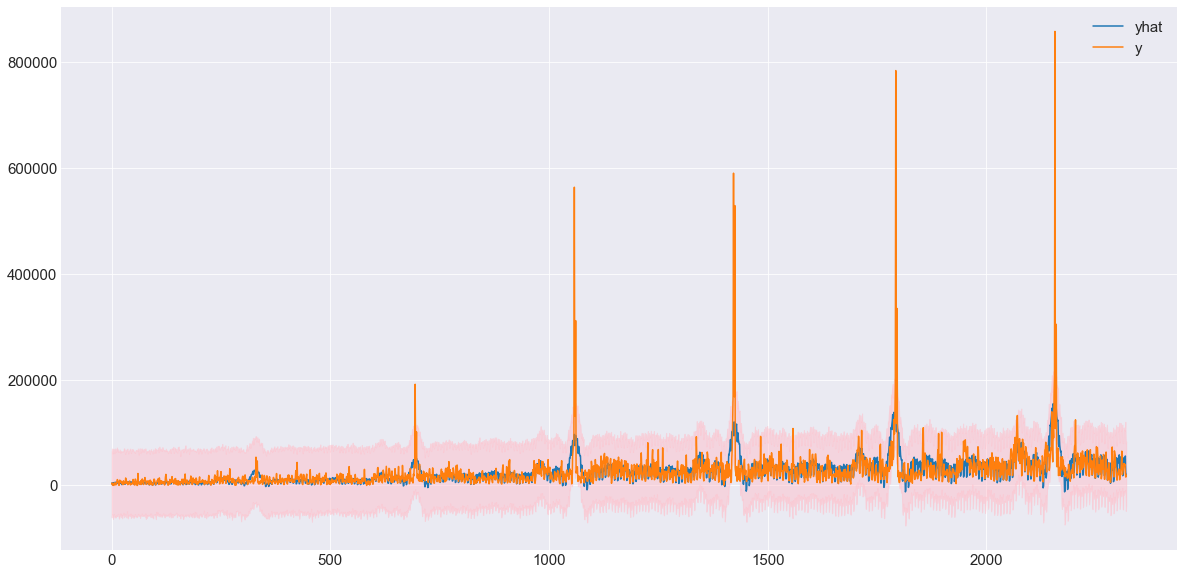

In [165]:
#Show the results and confidence intervals
forecast_prophet[['yhat', 'y']].plot()
plt.fill_between(forecast_prophet.index, forecast_prophet['yhat_lower'],
                 forecast_prophet['yhat_upper'], color='pink', alpha=0.5)

<AxesSubplot:>

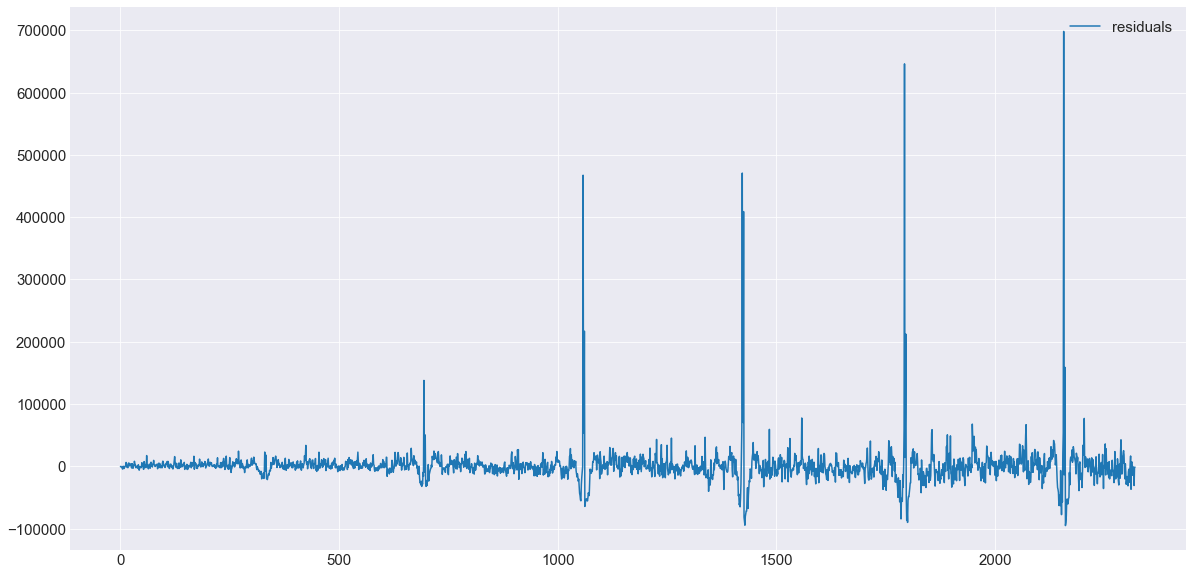

In [166]:
#Check residuals
forecast_prophet[['residuals']].plot()

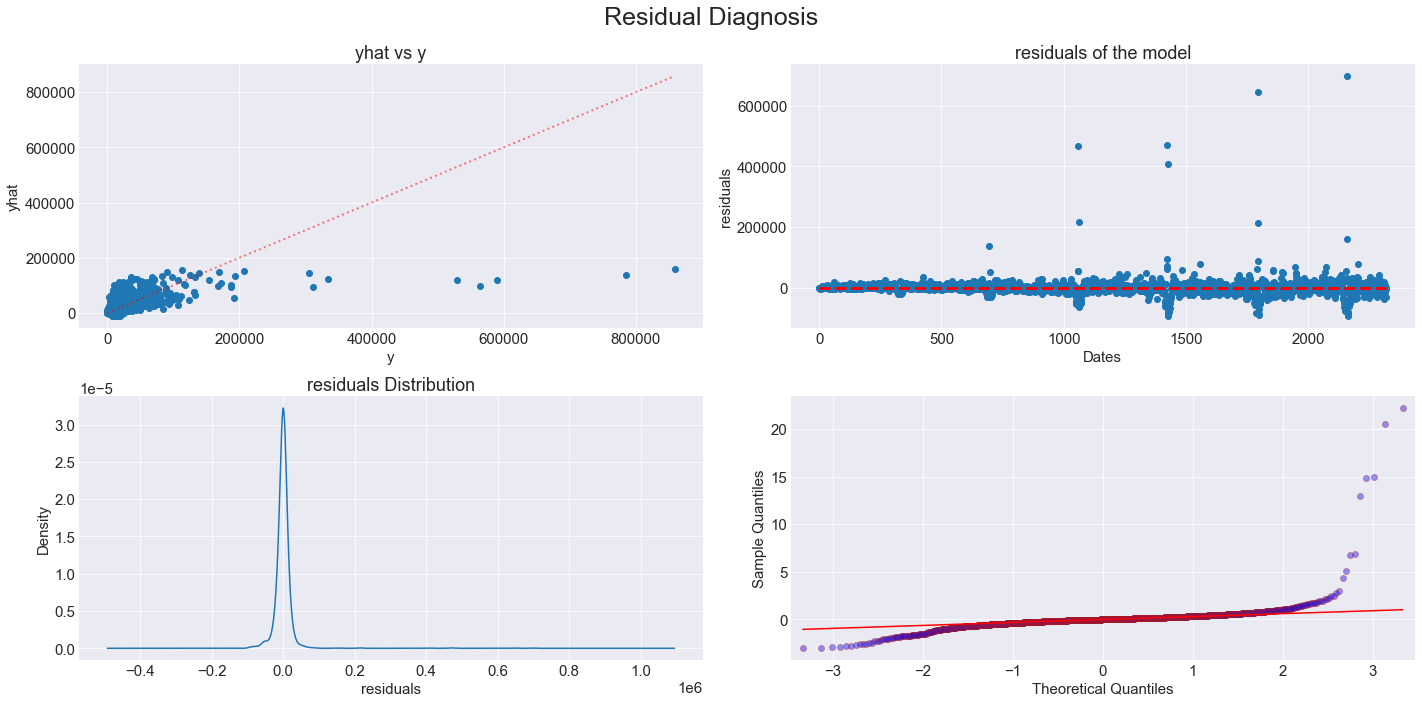

In [167]:
draw_residuals_diagnosis(forecast_prophet, ['y', 'yhat', 'residuals'])

In [168]:
#Check the RMSE
np.sqrt(mean_squared_error(forecast_prophet['y'], forecast_prophet['yhat']))

31429.799938130498

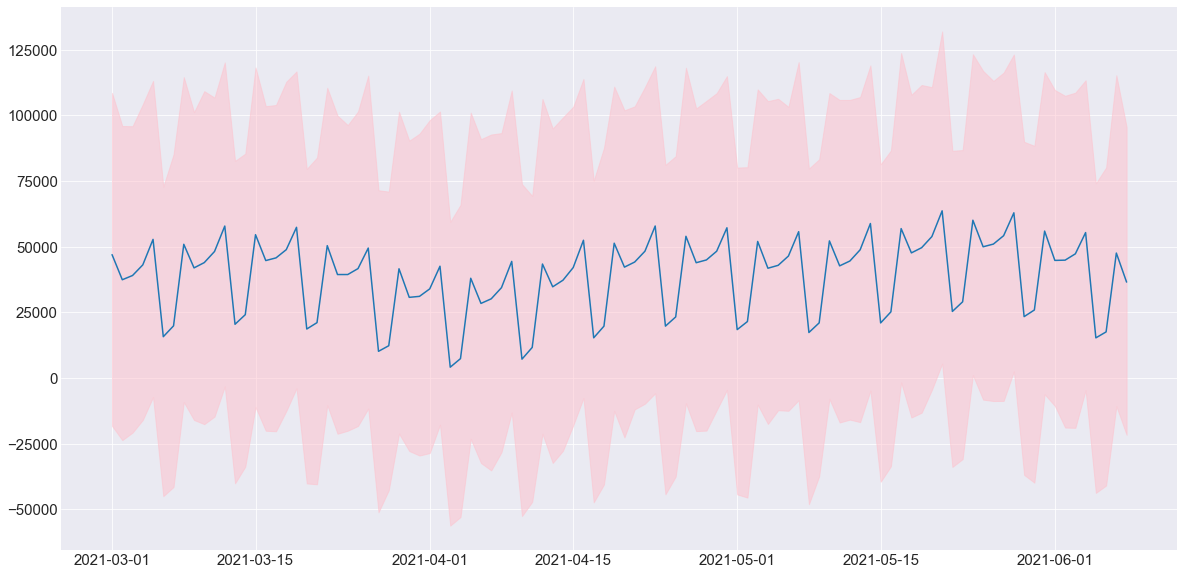

In [192]:
#Forecast
plt.plot(forecast_prophet_model.iloc[-100:]['ds'], forecast_prophet_model.iloc[-100:]['yhat'])
plt.fill_between(forecast_prophet_model.iloc[-100:]['ds'], forecast_prophet_model.iloc[-100:]['yhat_lower'],
                 forecast_prophet_model.iloc[-100:]['yhat_upper'], color='pink', alpha=0.5)

#### Adding Holidays or Seasonality features 

In [193]:
#Holidays
bf_date_list = ['2015-11-27', '2016-11-25', '2017-11-24', '2018-11-23', '2019-11-29', '2020-11-27']
easter_date_list = ['2015-03-30', '2016-03-21', '2017-04-10', '2018-03-26', '2019-04-15', '2020-04-06', '2021-03-29']
covid_date_list = ['2020-03-14']

bf_week_dates = create_date_range(bf_date_list, 'D', 4)
easter_week_dates = create_date_range(easter_date_list, 'D', 8)
covid_week_dates = create_date_range(covid_date_list, 'D', 100)

black_friday = pd.DataFrame({
  'holiday': 'black_friday',
  'ds': [j for i in bf_week_dates for j in i]
})


easter = pd.DataFrame({
  'holiday': 'easter',
  'ds': [j for i in easter_week_dates for j in i]
})

covid = pd.DataFrame({
  'holiday': 'covid',
  'ds': [j for i in covid_week_dates for j in i]
})

holidays = pd.concat((black_friday, easter, covid))
holidays

holiday         ds
0   black_friday 2015-11-27
1   black_friday 2015-11-28
2   black_friday 2015-11-29
3   black_friday 2015-11-30
4   black_friday 2016-11-25
..           ...        ...
95         covid 2020-06-17
96         covid 2020-06-18
97         covid 2020-06-19
98         covid 2020-06-20
99         covid 2020-06-21

[180 rows x 2 columns]

In [194]:
model = Prophet(seasonality_mode='multiplicative', holidays= holidays, interval_width= 0.95, mcmc_samples= 50)
model_prophet = model.fit(data_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [195]:
#Forecast 30 days in advance
future_prophet = model_prophet.make_future_dataframe(freq= 'D', periods= 30)
#Get forecast
forecast_prophet = model_prophet.predict(future_prophet)

In [196]:
#Let's make a copy
forecast_prophet_model = forecast_prophet.copy()
#We are going to check how the model predict with the trained data
forecast_prophet['y'] = data_prophet['y']
forecast_prophet['residuals'] = forecast_prophet['y'] - forecast_prophet['yhat']
forecast_prophet.dropna(inplace= True)

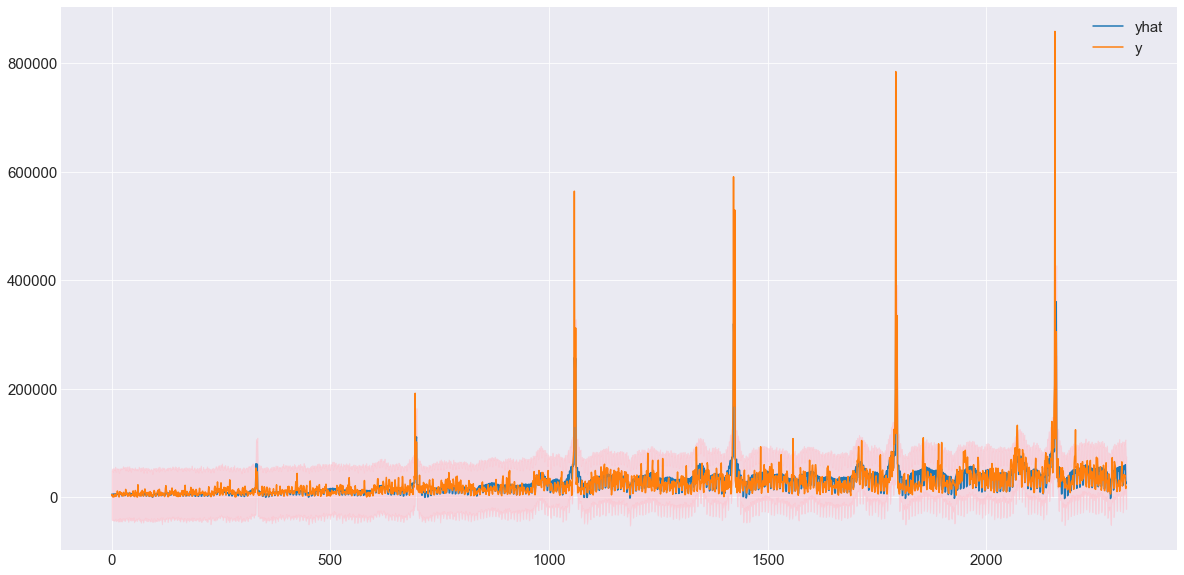

In [197]:
#Show the results and confidence intervals
forecast_prophet[['yhat', 'y']].plot()
plt.fill_between(forecast_prophet.index, forecast_prophet['yhat_lower'],
                 forecast_prophet['yhat_upper'], color='pink', alpha=0.5)

<AxesSubplot:>

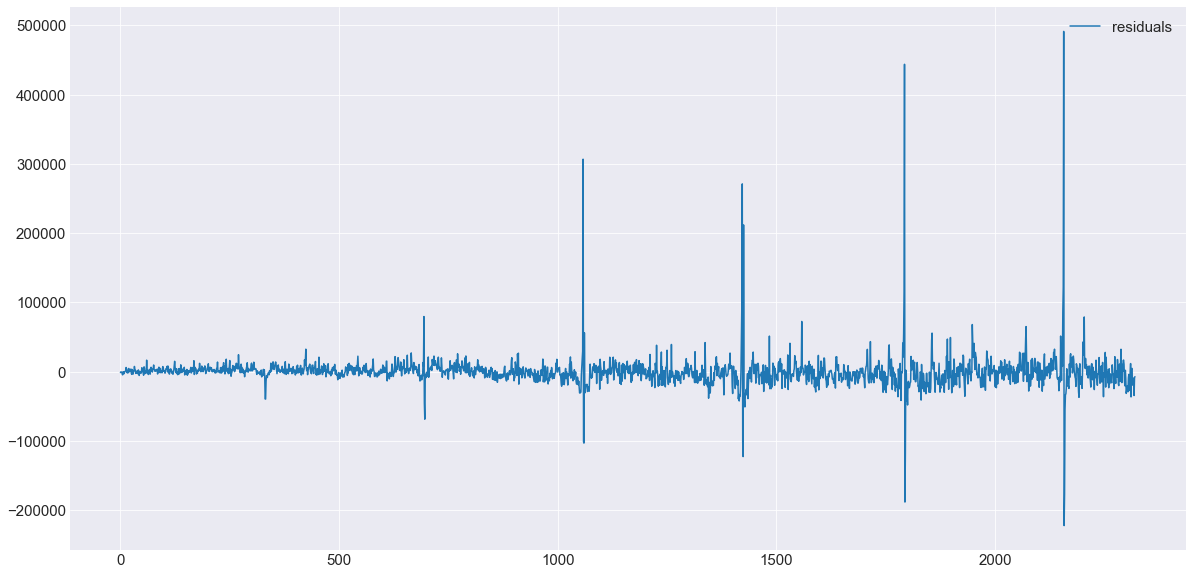

In [198]:
#Check residuals
forecast_prophet[['residuals']].plot()

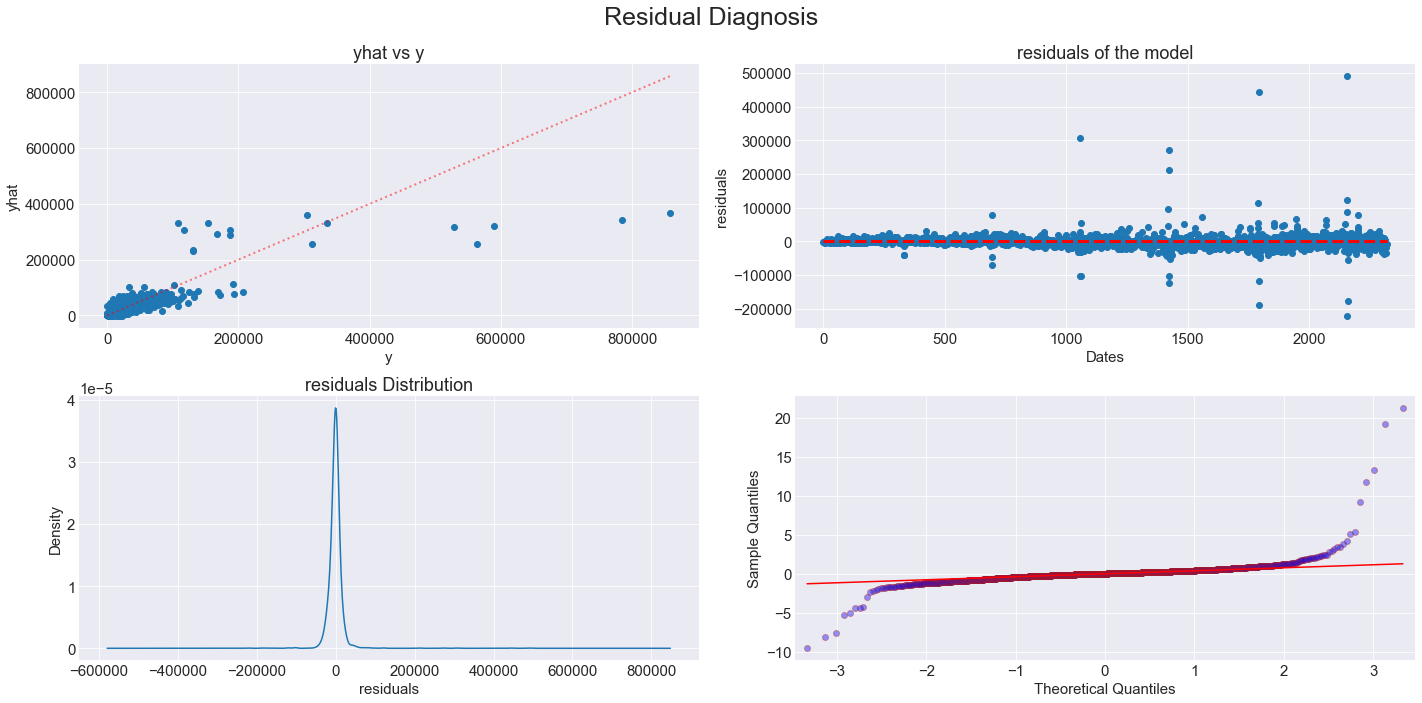

In [199]:
draw_residuals_diagnosis(forecast_prophet, ['y', 'yhat', 'residuals'])

In [200]:
#Check the RMSE
np.sqrt(mean_squared_error(forecast_prophet['y'], forecast_prophet['yhat']))

23171.855380031786

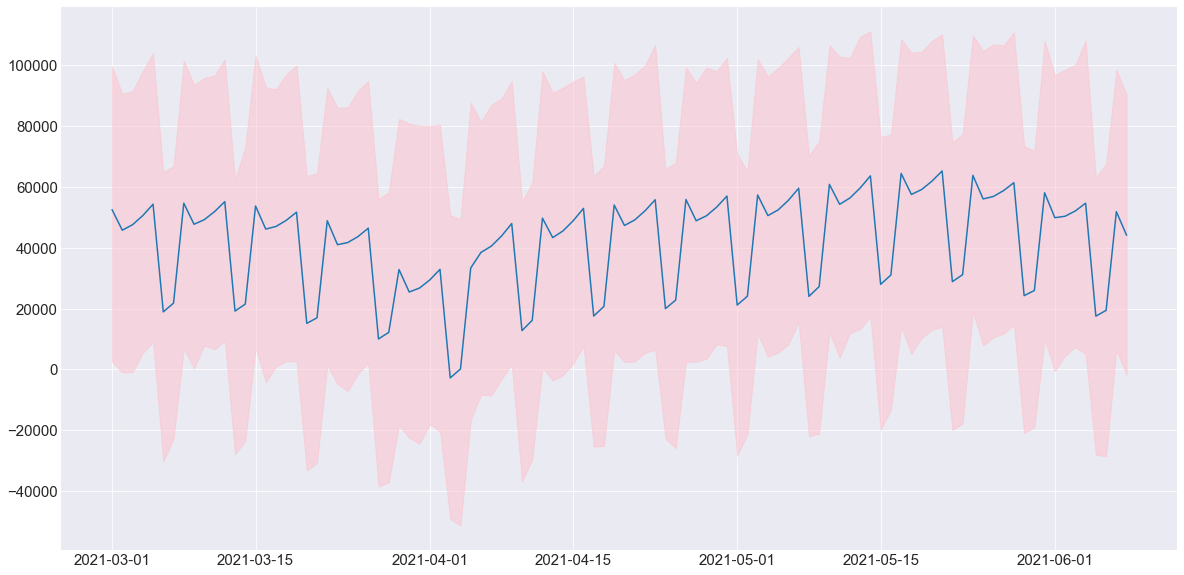

In [201]:
#Forecast
plt.plot(forecast_prophet_model.iloc[-100:]['ds'], forecast_prophet_model.iloc[-100:]['yhat'])
plt.fill_between(forecast_prophet_model.iloc[-100:]['ds'], forecast_prophet_model.iloc[-100:]['yhat_lower'],
                 forecast_prophet_model.iloc[-100:]['yhat_upper'], color='pink', alpha=0.5)

### Deep Learning

#### IMPORTANT
This model worked but I had several issues with Tensorflow and Keras. I tried five times at least. I was not able to replicate and this has affected my Frontend as well. It was included but I had to remove it.

In [33]:
data_full = pd.concat([data_small, data_validation])

#All lagged features for forecasting - Period 7 days
lags = [1, 2, 3, 4, 5, 6, 7, 364]
data_full_model = prepare_data(data_full, 'Revenue', lags)
data_full_model

Year_2015  Year_2016  Year_2017  Year_2018  Year_2019  Year_2020  \
Date                                                                           
2015-12-31          1          0          0          0          0          0   
2016-01-01          0          1          0          0          0          0   
2016-01-02          0          1          0          0          0          0   
2016-01-03          0          1          0          0          0          0   
2016-01-04          0          1          0          0          0          0   
...               ...        ...        ...        ...        ...        ...   
2021-06-09          0          0          0          0          0          0   
2021-06-10          0          0          0          0          0          0   
2021-06-11          0          0          0          0          0          0   
2021-06-12          0          0          0          0          0          0   
2021-06-13          0          0          0          0          0          0   

            Year_2021  Month_1  Month_10  Month_11  Month_12  Month_2  \
Date                                                                    
2015-12-31          0        0         0         0         1        0   
2016-01-01          0        1         0         0         0        0   
2016-01-02          0        1         0         0         0        0   
2016-01-03          0        1         0         0         0        0   
2016-01-04          0        1         0         0         0        0   
...               ...      ...       ...       ...       ...      ...   
2021-06-09          1        0         0         0         0        0   
2021-06-10          1        0         0         0         0        0   
2021-06-11          1        0         0         0         0        0   
2021-06-12          1        0         0         0         0        0   
2021-06-13          1        0         0         0         0        0   

            Month_3  Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  \
Date                                                                        
2015-12-31        0        0        0        0        0        0        0   
2016-01-01        0        0        0        0        0        0        0   
2016-01-02        0        0        0        0        0        0        0   
2016-01-03        0        0        0        0        0        0        0   
2016-01-04        0        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2021-06-09        0        0        0        1        0        0        0   
2021-06-10        0        0        0        1        0        0        0   
2021-06-11        0        0        0        1        0        0        0   
2021-06-12        0        0        0        1        0        0        0   
2021-06-13        0        0        0        1        0        0        0   

            Day_1  Day_10  Day_11  Day_12  Day_13  Day_14  Day_15  Day_16  \
Date                                                                        
2015-12-31      0       0       0       0       0       0       0       0   
2016-01-01      1       0       0       0       0       0       0       0   
2016-01-02      0       0       0       0       0       0       0       0   
2016-01-03      0       0       0       0       0       0       0       0   
2016-01-04      0       0       0       0       0       0       0       0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
2021-06-09      0       0       0       0       0       0       0       0   
2021-06-10      0       1       0       0       0       0       0       0   
2021-06-11      0       0       1       0       0       0       0       0   
2021-06-12      0       0       0       1       0       0       0       0   
2021-06-13      0       0       0       0       1       0       0       0   

            Day_1

In [106]:
#Train and Test Split
X_train, X_test, y_train, y_test = time_series_train_test_split(data_model, lags)

In [107]:
#Scale the features
X_train_scaled, X_test_scaled = data_normalization(X_train, X_test, 'robust')

In [108]:
#RNN
rnn = tf.keras.models.Sequential()
#Three layers - Let's pick shape= 61 x 2, then 61 x1 and 30 and 7 nodes
rnn.add(tf.keras.layers.Dense(122, input_shape=(61,), activation='relu')) 
rnn.add(tf.keras.layers.Dense(61, activation='relu'))
rnn.add(tf.keras.layers.Dense(30, activation='relu'))
rnn.add(tf.keras.layers.Dense(7, activation='relu'))
rnn.add(tf.keras.layers.Dense(1))
#Compile the RNN
rnn.compile(optimizer= tf.keras.optimizers.RMSprop(), loss= tf.keras.losses.mean_squared_error, metrics= [metrics.mean_squared_error]) 

In [112]:
#Train the RNN
rnn.fit(X_train, y_train, epochs= 10)

Epoch 1/10


NotImplementedError: in user code:

    /home/dsc/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:278 inner_f  *
        return f(*args, **kwargs)
    /home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:334 mean_squared_error  *
        y_type, y_true, y_pred, multioutput = _check_reg_targets(
    /home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:88 _check_reg_targets  *
        check_consistent_length(y_true, y_pred)
    /home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:260 check_consistent_length  *
        uniques = np.unique(lengths)
    <__array_function__ internals>:5 unique  **
        
    /home/dsc/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:260 unique
        if axis is None:
    /home/dsc/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171 asanyarray
        True
    /home/dsc/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:867 __array__
        raise NotImplementedError(

    NotImplementedError: Cannot convert a symbolic Tensor (strided_slice_1:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported


In [39]:
#Let's predict this model with Train Data
y_predict_train = rnn.predict(X_train_scaled)
y_predict_train = pd.DataFrame(y_predict_train, index= y_train.index, columns= [f'{y_train.name}_predicted'])
#Create the new DataFrame with the Train y values and Train predict values
forecast_train = pd.concat([y_train.to_frame(), y_predict_train], axis= 1)

In [40]:
#Calculate the RMSE
metric_rmse(forecast_train, 'Revenue')

52114.35718352519

<AxesSubplot:xlabel='Date'>

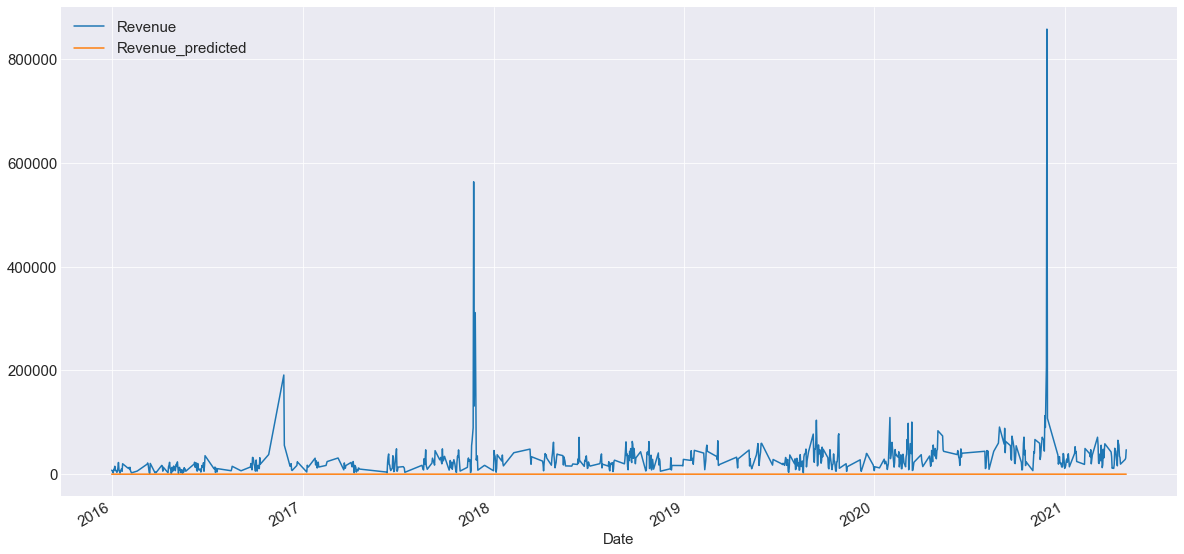

In [41]:
#Let's see the forecast
forecast_train.plot()

#### Residual Analysis 

In [42]:
forecast_train['Residuals'] = forecast_train['Revenue'] - forecast_train['Revenue_predicted']

<AxesSubplot:xlabel='Date'>

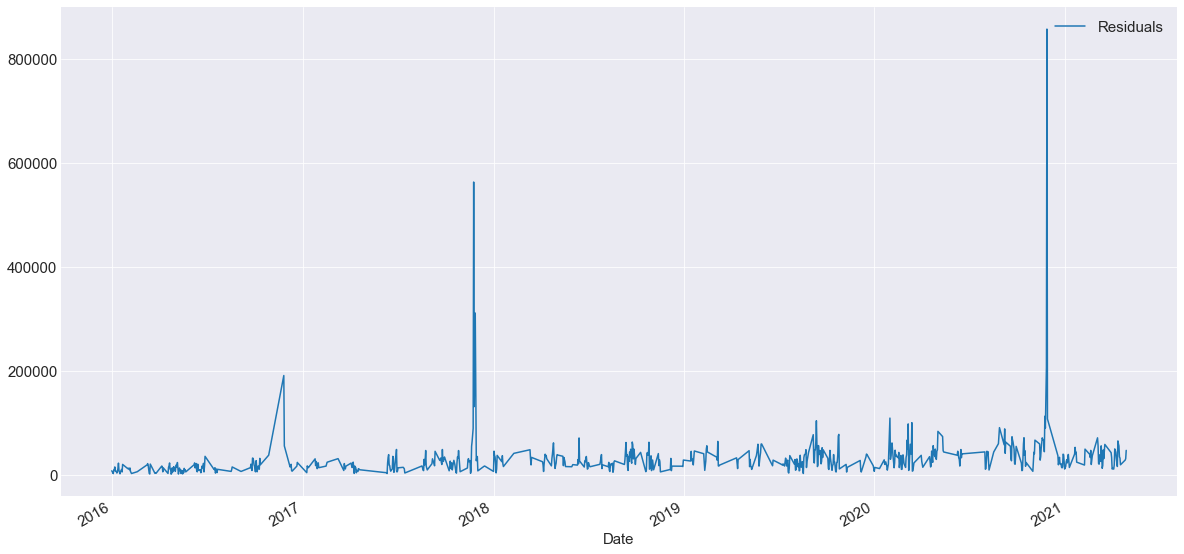

In [43]:
forecast_train[['Residuals']].plot()

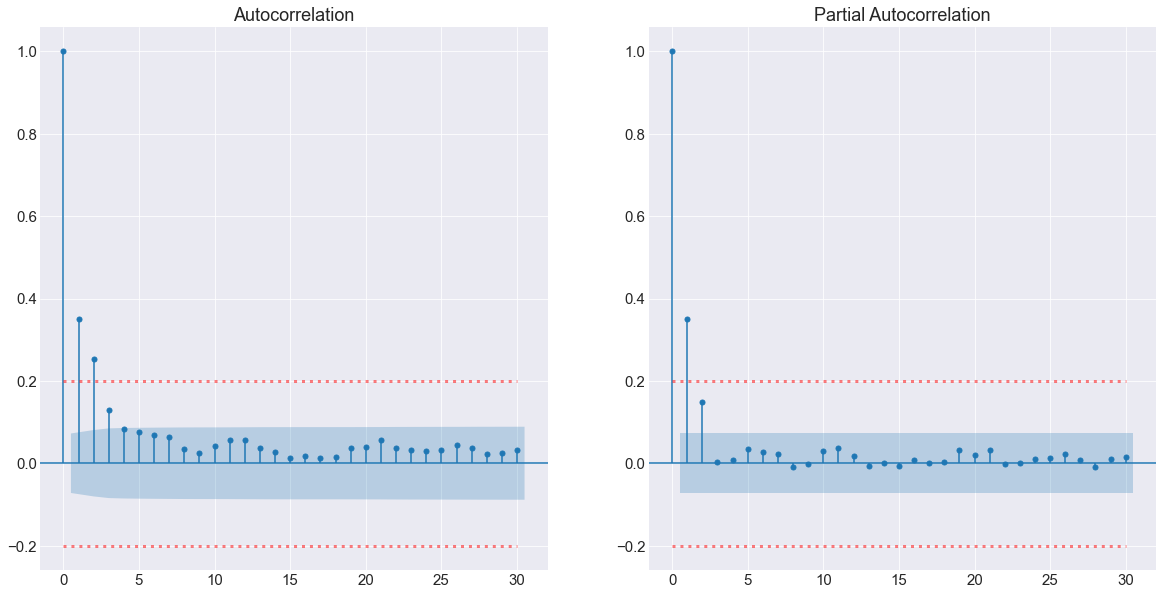

In [44]:
draw_autocorrelation(forecast_train[['Residuals']], 30)

In [160]:
test_adf(forecast_train, 'Residuals')

** Augmented Dickey-Fuller Test **

T-test: -18.450066207880916 < Confidence Interval[1%]: -3.438581476199162 - Result: Stationary
T-test: -18.450066207880916 < Confidence Interval[5%]: -2.865173218890781 - Result: Stationary
T-test: -18.450066207880916 < Confidence Interval[10%]: -2.56870466056054 - Result: Stationary

P-Value: 2.1544929440532933e-30 < 0.05 - Result: Stationary


In [161]:
#R²
r2_score(forecast_train['Revenue'], forecast_train['Revenue_predicted'])

0.9989374424084823

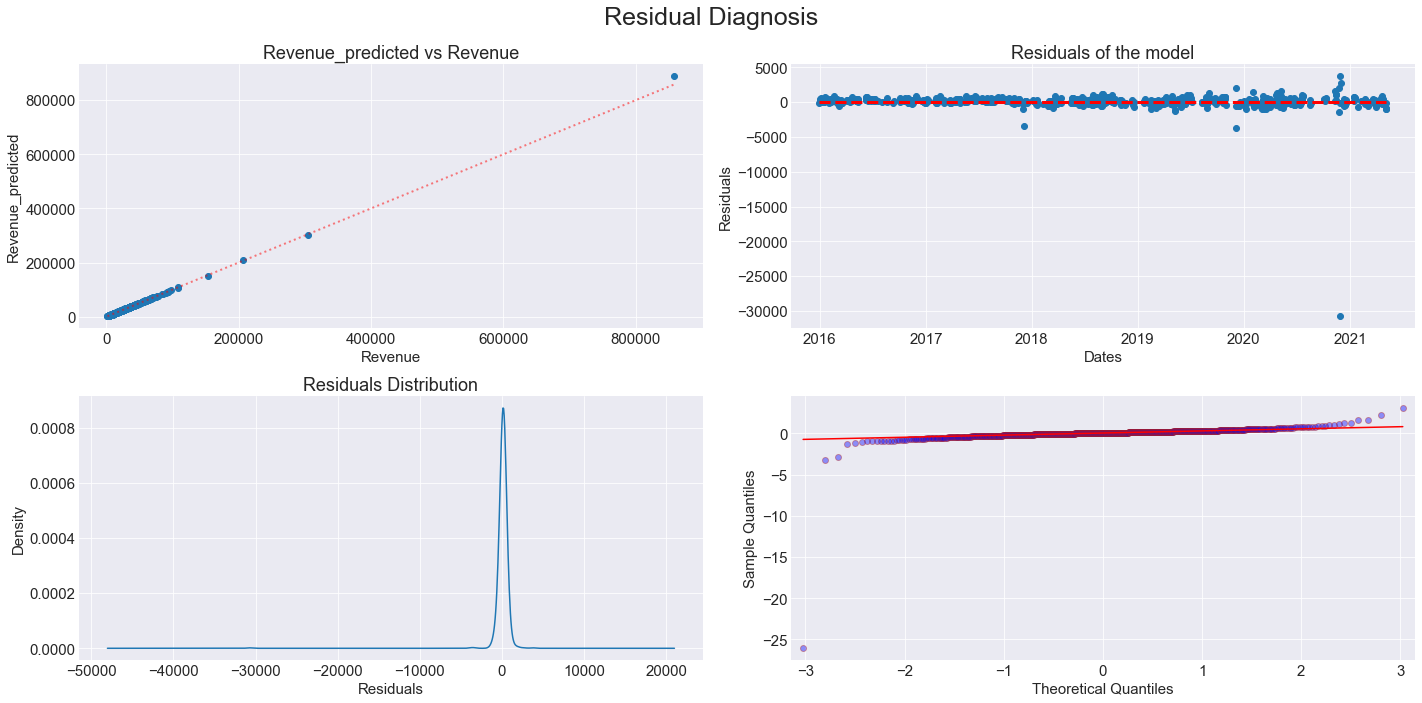

In [162]:
#Residual Analysis
draw_residuals_diagnosis(forecast_train, ['Revenue', 'Revenue_predicted', 'Residuals'])

#### Predict 

In [45]:
#Let's predict this model with Test Data
y_predict_test = rnn.predict(X_test_scaled)
y_predict_test = pd.DataFrame(y_predict_test, index= y_test.index, columns= [f'{y_test.name}_predicted'])
#Create the new DataFrame with the Test y values and Test predict values
forecast_test = pd.concat([y_test.to_frame(), y_predict_test], axis= 1)

In [46]:
metric_rmse(forecast_test, 'Revenue')

32797.0422444476

<AxesSubplot:xlabel='Date'>

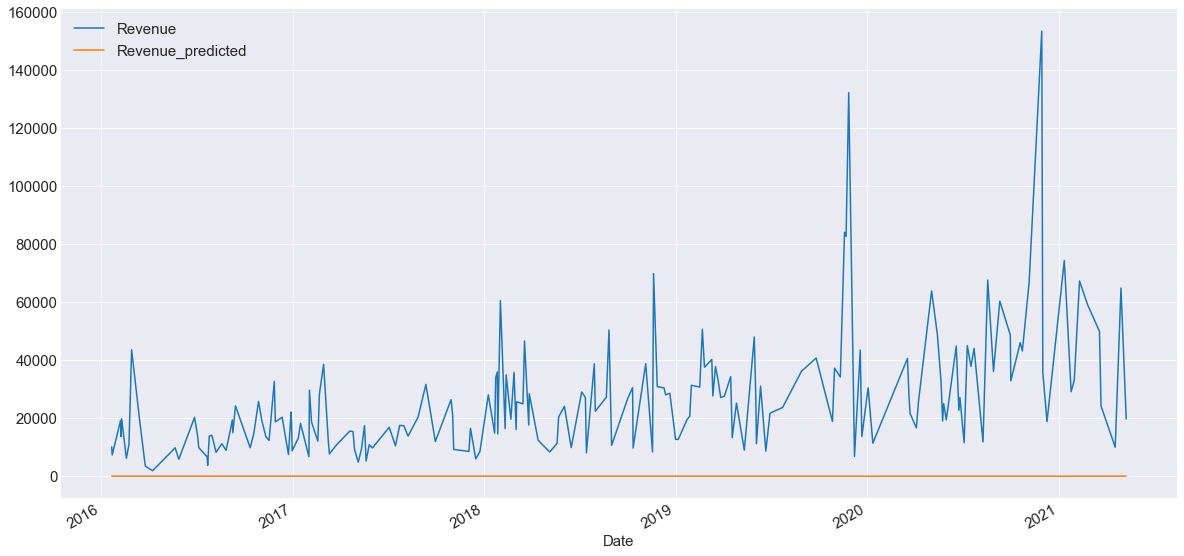

In [47]:
#Let's see the forecast
forecast_test.plot()

In [166]:
#R²
r2_score(forecast_test['Revenue'], forecast_test['Revenue_predicted'])

0.5068700160526799

### Data Forecasting 

In [48]:
data_full = pd.concat([data_small, data_validation])

#All lagged features for forecasting - Period 7 days
lags = [1, 2, 3, 4, 5, 6, 7, 364]
data_full_forecast = prepare_data_forecast(data_full, 'Revenue', lags, 7)
data_full_forecast

Year_2021  Month_6  Day_14  Day_15  Day_16  Day_17  Day_18  \
2021-06-14          1        1       1       0       0       0       0   
2021-06-15          1        1       0       1       0       0       0   
2021-06-16          1        1       0       0       1       0       0   
2021-06-17          1        1       0       0       0       1       0   
2021-06-18          1        1       0       0       0       0       1   
2021-06-19          1        1       0       0       0       0       0   
2021-06-20          1        1       0       0       0       0       0   

            Day_19  Day_20  Black_Friday  Easter  Covid   Rev-364     Rev-7  \
2021-06-14       0       0             0       0      0  48735.52  44815.98   
2021-06-15       0       0             0       0      0  33745.33  21760.66   
2021-06-16       0       0             0       0      0  16913.21  74427.57   
2021-06-17       0       0             0       0      0  29435.16  47467.41   
2021-06-18       0       0             0       0      0  32517.81  38282.13   
2021-06-19       1       0             0       0      0  41321.59  44696.72   
2021-06-20       0       1             0       0      0  45465.30  55890.10   

               Rev-6     Rev-5     Rev-4     Rev-3     Rev-2     Rev-1  
2021-06-14  46716.35  47649.11  66938.46  53022.54  25079.69  27413.63  
2021-06-15  44815.98  46716.35  47649.11  66938.46  53022.54  25079.69  
2021-06-16  21760.66  44815.98  46716.35  47649.11  66938.46  53022.54  
2021-06-17  74427.57  21760.66  44815.98  46716.35  47649.11  66938.46  
2021-06-18  47467.41  74427.57  21760.66  44815.98  46716.35  47649.11  
2021-06-19  38282.13  47467.41  74427.57  21760.66  44815.98  46716.35  
2021-06-20  44696.72  38282.13  47467.41  74427.57  21760.66  44815.98

In [49]:
#Get one RNN per period because it is not the same the RNN of T+1 than RNN of T+2
period = 14
model = get_rnn_list(period)

In [50]:
#Training
epochs = 100

In [51]:
forecast_rnn = forecast_predict_rnn(data_full, 'Revenue', lags, period, model, epochs, 'robust', '95%')
forecast_rnn

Epoch 1/100


OperatorNotAllowedInGraphError: in user code:

    /home/dsc/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /home/dsc/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /home/dsc/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:775 train_step  *
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /home/dsc/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py:457 update_state  *
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    /home/dsc/anaconda3/lib/python3.8/site-packages/keras/metrics.py:169 decorated  *
        update_op = update_state_fn(*args, **kwargs)
    /home/dsc/anaconda3/lib/python3.8/site-packages/keras/metrics.py:155 update_state_fn  *
        return ag_update_state(*args, **kwargs)
    /home/dsc/anaconda3/lib/python3.8/site-packages/keras/metrics.py:641 update_state  *
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:278 inner_f  *
        return f(*args, **kwargs)
    /home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:334 mean_squared_error  *
        y_type, y_true, y_pred, multioutput = _check_reg_targets(
    /home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:88 _check_reg_targets  *
        check_consistent_length(y_true, y_pred)
    /home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:260 check_consistent_length  *
        uniques = np.unique(lengths)
    <__array_function__ internals>:5 unique  **
        
    /home/dsc/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:261 unique
        ret = _unique1d(ar, return_index, return_inverse, return_counts)
    /home/dsc/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:322 _unique1d
        ar.sort()
    /home/dsc/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:900 __bool__
        self._disallow_bool_casting()
    /home/dsc/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:503 _disallow_bool_casting
        self._disallow_when_autograph_enabled(
    /home/dsc/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:489 _disallow_when_autograph_enabled
        raise errors.OperatorNotAllowedInGraphError(

    OperatorNotAllowedInGraphError: using a `tf.Tensor` as a Python `bool` is not allowed: AutoGraph did convert this function. This might indicate you are trying to use an unsupported feature.


In [194]:
forecast_rnn

Revenue_forecast  Revenue_lower  Revenue_upper
2021-06-14      39389.605469   38578.746094   40200.464844
2021-06-15      40910.199219   38277.113281   43543.285156
2021-06-16      47964.390625   46217.738281   49711.042969
2021-06-17      31671.046875   30956.490234   32385.603516
2021-06-18      38916.507812   38337.875000   39495.140625
2021-06-19      14839.833008   13927.930664   15751.735352
2021-06-20      28596.693359   27393.601562   29799.785156
2021-06-21      29447.199219   28293.162109   30601.236328
2021-06-22      26998.195312   26212.632812   27783.757812
2021-06-23      32062.773438   31429.234375   32696.312500
2021-06-24      49354.371094   48405.234375   50303.507812
2021-06-25      27575.832031   26411.550781   28740.113281
2021-06-26      17890.623047   17077.359375   18703.886719
2021-06-27      69828.914062   69457.570312   70200.257812

In [195]:
data_full_forecast_rnn = data_full[['Revenue']]
data_full_forecast_rnn = pd.concat([data_full_forecast_rnn, forecast_rnn])

In [196]:
data_full_forecast_rnn['Revenue_forecast'].loc[data_full.index[-1]] = \
data_full_forecast_rnn.loc[data_full.index[-1]]['Revenue']

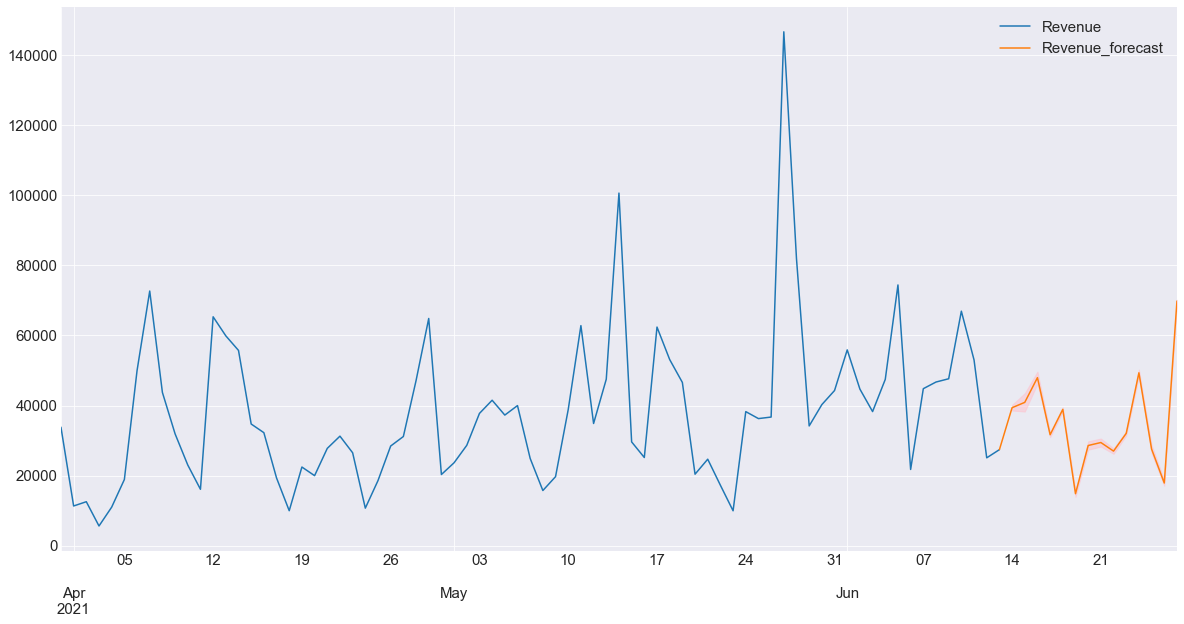

In [197]:
data_full_forecast_rnn.loc['2021-03-31':][['Revenue', 'Revenue_forecast']].plot()
plt.fill_between(data_full_forecast_rnn.index, data_full_forecast_rnn['Revenue_lower'],
                 data_full_forecast_rnn['Revenue_upper'], color='pink', alpha=0.5)

## Conclusion and Next Steps

We have seen different models to resolve one important topic... forecast sales. This is more related with crystal ball skills than Data Scientist but we could see good results in some models.

An important learning that we need to consider for enhancing this analysis, could be taking the outliners off from the general model and create a specific model for outliners. In this case, Black Friday has affected and it will affect the predictions because it is a super abnormal value.

Next Steps:
* Use Finance Data(100% confirmed) rather than Web Tracking Data(Less than 100% trusted)
* Create a separated model for outliners
* Add more exogenous features like weekdays, weekends, Christmas and bank holidays
* Add another lagged feature as Traffic and see how this perfoms
* Does it make sense to add stock level and lag this feature as well?
* Extending this analysis with more Deep Learning methods